# Lending Club Loan Data Case Study

## Data Loading & Understanding

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
import warnings
# ignore warnings
warnings.filterwarnings('ignore')

In [2]:
# to convert scientific notation values
pd.options.display.float_format = '{:,.2f}'.format
# increasing max rows settings to display all the summary data
pd.set_option('display.max_rows', None, 'display.max_columns', None)
# to make Empty Strings or numpy.inf as NaN Values
pd.options.mode.use_inf_as_na = True

In [3]:
#reading the data
data_loan = pd.read_csv('loan.csv')
#glimpse of the data for validation
data_loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000         4,975.00   36 months   
1  1077430    1314167       2500         2500         2,500.00   60 months   
2  1077175    1313524       2400         2400         2,400.00   36 months   
3  1076863    1277178      10000        10000        10,000.00   36 months   
4  1075358    1311748       3000         3000         3,000.00   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT   24,000.00            Verified  Dec-11   Fully Paid   
1           RENT   30,000.00     Source Verified  Dec-11  Charged Off   
2           RENT   12,252.00        Not Verified  Dec-11   Fully Paid   
3           RENT   49,200.00     Source Verified  Dec-11   Fully Paid   
4           RENT   80,000.00     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state   dti  delinq_2yrs  \
0              Computer    860xx         AZ 27.65            0   
1                  bike    309xx         GA  1.00            0   
2  real estate business    606xx         IL  8.72            0   
3              personel    917xx         CA 20.00            0   
4              Personal    972xx         OR 17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                   35.00   
4           Jan-96               0                   38.00   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  \
0                   f       0.00           0.00     5,863.16         5,833.84   
1                   f       0.00           0.00     1,008.71         1,008.71   
2                   f       0.00           0.00     3,005.67         3,005.67   
3                   f       0.00           0.00    12,231.89        12,231.89   
4                   f     524.06         524.06     3,513.33         3,513.33   

   total_rec_prncp  total_rec_int  tota

In [4]:
# checking the Number of rows and columns, basically the shape of the data
data_loan.shape

(39717, 111)

In [5]:
# getting the information from the data
data_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
# checking the datatypes in various columns of the data
data_loan.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

# Data Cleaning

In [7]:
# checking the number of duplicates
# finding any duplicate rows in the dataset
print('Number of duplicates:',data_loan.duplicated().sum())

Number of duplicates: 0


As the Number of duplicates is Zero, We don't have to remove the duplicated data.

In [8]:
# checking the number of columns having null values 
data_loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [9]:
# there are many columns where all the values are Null or missing. So dropping those columns 
data_loan.dropna(axis = 1, how = 'all', inplace = True)
data_loan.shape

(39717, 57)

The majority of the columns have 100% Null values, thus they can safely be deleted. 

In various columns, the percentage of NULL values is 2%,3%, 33%, 65%, 93%, and 97%. Additionally, 93% and 97% columns may be removed. It is now necessary to set a rate threshold. It is acceptable to take into account the criticality of the columns and the prevalence of NULL values.

Therefore, it is acceptable to remove any columns with NaN or NULL values larger than or equal to 30%.

In [10]:
# After dropping columns with all the Null values, Now checking the column which have partial null or missing values
# getting the percentage of null or missing values
(data_loan.isnull().sum()/data_loan.shape[0]*100).round(2).sort_values(ascending=False)

next_pymnt_d                 97.13
mths_since_last_record       92.99
mths_since_last_delinq       64.66
desc                         32.58
emp_title                     6.19
emp_length                    2.71
pub_rec_bankruptcies          1.75
last_pymnt_d                  0.18
chargeoff_within_12_mths      0.14
collections_12_mths_ex_med    0.14
revol_util                    0.13
tax_liens                     0.10
title                         0.03
last_credit_pull_d            0.01
home_ownership                0.00
int_rate                      0.00
out_prncp_inv                 0.00
total_pymnt                   0.00
total_pymnt_inv               0.00
total_rec_prncp               0.00
total_rec_int                 0.00
total_rec_late_fee            0.00
recoveries                    0.00
collection_recovery_fee       0.00
term                          0.00
last_pymnt_amnt               0.00
initial_list_status           0.00
funded_amnt_inv               0.00
policy_code         

In [11]:
# dropping the columns having more than 30% missing or null values
data_loan = data_loan.loc[:,data_loan.isnull().sum()/data_loan.shape[0]*100<30]

In [12]:
# number of rows and columns left
print('Number of Columns:',data_loan.shape[1])
print('Number of Rows:',data_loan.shape[0])

Number of Columns: 53
Number of Rows: 39717


In [13]:
# finding number of unique values in each column
data_loan.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

There are a number of single-valued columns.
They cannot in any way add any good to our analysis. Hence, removing them.

In [14]:
# removing the columns where there is only 1 unique value. 
data_loan = data_loan.drop(['tax_liens', "delinq_amnt",'chargeoff_within_12_mths','acc_now_delinq','application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan'], axis = 1)

In [15]:
data_loan.shape

(39717, 44)

We currently have 44 columns left, some of which comes into picture post loan's approval.

1. We analyse the user's information and the causes of default, before the approval of loan.
2. The columns and variables that correspond to that case can therefore be safely removed.
3. The columns "id," "member id," "url," "title," "emp title," "zip code," "last credit pull d" etc. none of the features or columns are involved in the loan defaulting. Hence, dropping them.
4. "out prncp inv" and "total pymnt inv" are useful for investors but have no bearing on loan defaulting analysis. As a result, they are being removed.

In [16]:
# removing irrelevant columns which are calculated after loan is approved thus have no relevance to the analysis
# the columns removed are customer behaviour variables and are calculated after thus they cannot be used as input for the analysis
data_loan = data_loan.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','revol_util','revol_bal','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d'],axis=1)
# removing title,emp_title,desc as they have no significance to the analysis as they are random varaibles and hold infomration which might not have significance to the conclusions
data_loan = data_loan.drop(['title','emp_title','url'],axis=1)
# removing zip_code as it is a masked data and cannot be used as input for the analysis
data_loan = data_loan.drop(['zip_code'],axis=1)
# removing id, member_id as it is a duplicate index column and is not required for the analysis
data_loan = data_loan.drop(['id', 'member_id'],axis=1)
# shape of the dataframe after removing columns
print(data_loan.shape)

(39717, 19)


In [17]:
# getting the column names from the dataset
data_loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'pub_rec', 'pub_rec_bankruptcies'],
      dtype='object')

The analysis's objective is to determine who is most likely to default, which can only be determined in the situation of completely paid or charged-off debts.

In [18]:
# excluding the records with current as loan status
data_loan = data_loan[data_loan.loan_status != "Current"]
# validating the unique values in loan status column
data_loan.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

### Missing Value Treatment/Imputation

In [19]:
# again checking the percentage of missing values in remaining columns
(data_loan.isna().sum()/len(data_loan.index))*100

loan_amnt              0.00
funded_amnt            0.00
funded_amnt_inv        0.00
term                   0.00
int_rate               0.00
installment            0.00
grade                  0.00
sub_grade              0.00
emp_length             2.68
home_ownership         0.00
annual_inc             0.00
verification_status    0.00
issue_d                0.00
loan_status            0.00
purpose                0.00
addr_state             0.00
dti                    0.00
pub_rec                0.00
pub_rec_bankruptcies   1.81
dtype: float64

In [20]:
# checking the count of distinct values in below mentioned columns
print(data_loan['emp_length'].value_counts())
print(data_loan['pub_rec_bankruptcies'].value_counts())

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64
0.00    36238
1.00     1637
2.00        5
Name: pub_rec_bankruptcies, dtype: int64


According to the value counts, the mode value occurs much more frequently than the next most frequent value.
As a result, we may safely set the null values in the column to the value of mode.
Additionally, the percentage of missing values is relatively low. Therefore, imputing with a mode value has no impact on the analysis.

In [21]:
# customized function to fill mode values for null values in specific columns
def imputation(df, column_name):
    # calculating mode
    mode = df[column_name].mode()[0]
    # filling null values with calculated mode
    df[column_name].fillna(mode, inplace = True)
    # printing/validating that there is no null values present after imputation
    print(df[column_name].isna().sum())

In [22]:
# applying function to emp_length column
imputation(data_loan, 'emp_length')

0


In [23]:
# applying function to pub_rec_bankruptcies column
imputation(data_loan, 'pub_rec_bankruptcies')

0


In [24]:
# checking unique value counts for home ownership column 
data_loan['home_ownership'].value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

The Data Dictionary shows four possible values for the variable home ownership: RENT, OWN, MORTGAGE, and OTHER. There are, however, 3 records in the data whose value is 'NONE'. Rows from those three entries should be repalce with 'OTHER' because the records is quite minimal and adds little value.

In [25]:
# replacing 'NONE' values with 'OTHERS' in the home ownership column
data_loan['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

## Data Standardization

In [26]:
# checking the datatypes of columns
data_loan.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
pub_rec                   int64
pub_rec_bankruptcies    float64
dtype: object

In [27]:
# stripping '%' value from interest rate and converting it into float datatype 
data_loan['int_rate'] = data_loan['int_rate'].apply(lambda x:str(x).replace('%','')).astype('float').round(2)

In [28]:
# converting emp_length to integer values
# converting emp_length as numerical data to create more effective statistical analysis as compared to nominal values
data_loan['emp_length'] = pd.to_numeric(data_loan['emp_length'].apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [29]:
data_loan['term'] = data_loan['term'].astype('category')
data_loan['grade'] = data_loan['grade'].astype('category')
data_loan['sub_grade'] = data_loan['sub_grade'].astype('category')
data_loan['home_ownership'] = data_loan['home_ownership'].astype('category')
data_loan['verification_status'] = data_loan['verification_status'].astype('category')
data_loan['purpose'] = data_loan['purpose'].astype('category')
data_loan['addr_state'] = data_loan['addr_state'].astype('category')

### Outliers Removal

In [30]:
# customized function to calculate inter quartile range
def iqr(df, column_name):
    #calculating quartile1
    quantile25 = df[column_name].quantile(0.25)
    #calculating quartile3
    quantile75 = df[column_name].quantile(0.75)
    #calculating inter quartile range
    iqr = quantile75 - quantile25
    #calculating lower bound
    lower = quantile25 - 1.5 * iqr
    #calculating upper bound
    upper = quantile75 + 1.5 * iqr
    #returns a dictionary which includes the qunatile 25, quantile 75, inter quartile range, lower and upper bound for a particular column.
    return {'quartile1': quantile25, 'quartile3': quantile75, 'iqr': iqr, 'lower_bound': lower, 'upper_bound': upper}

In [31]:
# customized function for visualizing the box plot before and after removing the outliers. So that we can treat/remove the outliers
def box_plot_analysis(df, column_name):
    # box plot before dropping outliers
    # subplotting
    fig, p = plt.subplots(1,2,figsize=(16, 4))
    # plot 1
    splot1 = sns.boxplot(df[column_name], ax=p[0], orient="h", color = '#FF0000')
    # setting title
    splot1.set_title('Initial plot ['+ column_name + ']')
    # dropping the outliers from the dataset
    new_df = df[df[column_name] < iqr(df, column_name)['upper_bound']]
    # box plot after dropping outliers   
    # plot 2
    splot2 = sns.boxplot(new_df[column_name], ax=p[1], orient='h', color = '#4F7942')
    # setting title
    splot2.set_title('Final plot post outlier treatment [' + column_name + ']')
    plt.tight_layout()
    # showing the plot
    plt.show()

In [32]:
# function for droping the Outliers
def drop_outlier(df, column_name):
    #filtering the dataframe by dropping the values greater than the upper bound
    new_df = df[df[column_name] < iqr(df, column_name)['upper_bound']]
    return new_df

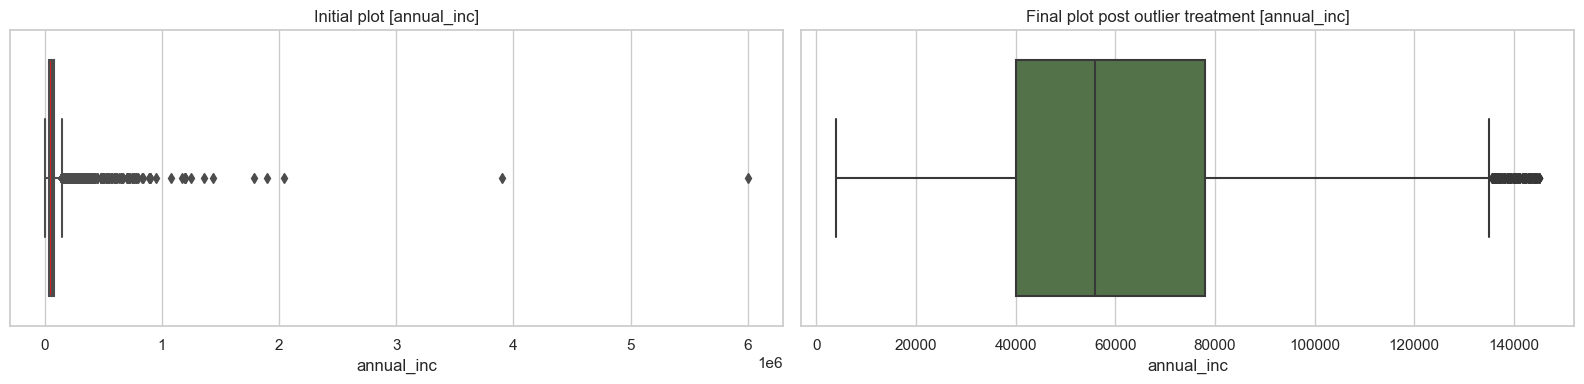

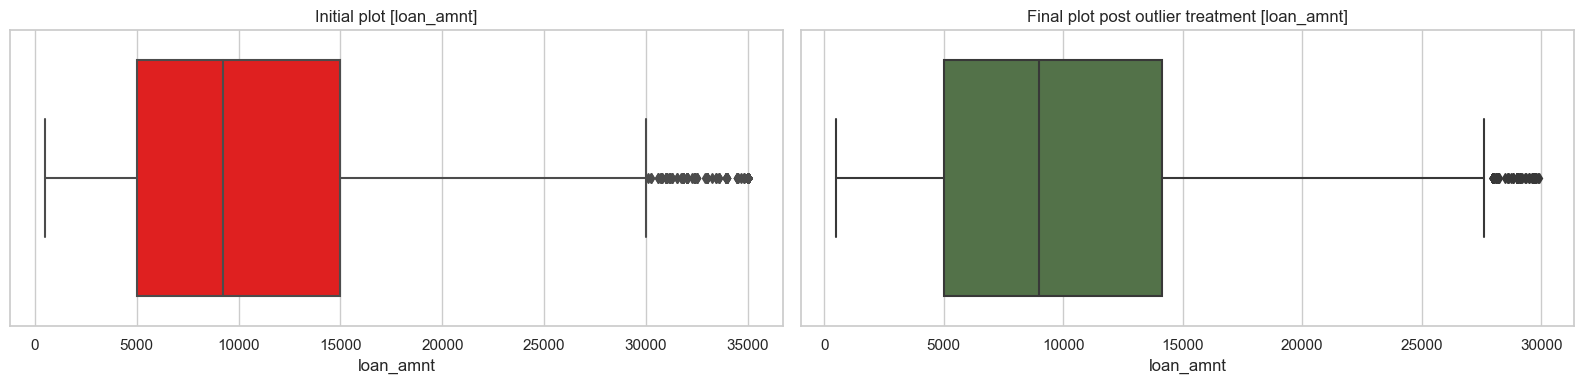

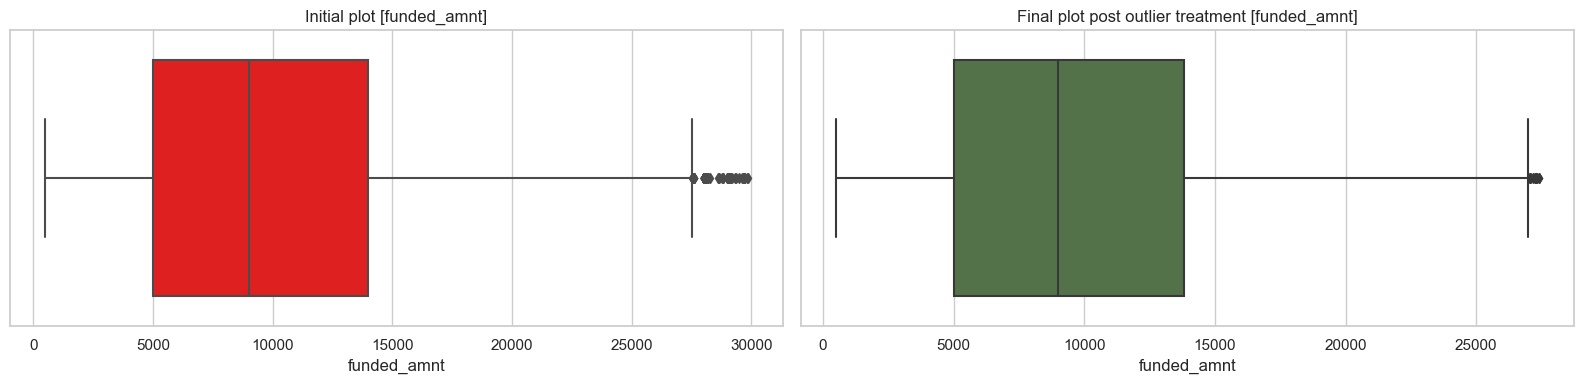

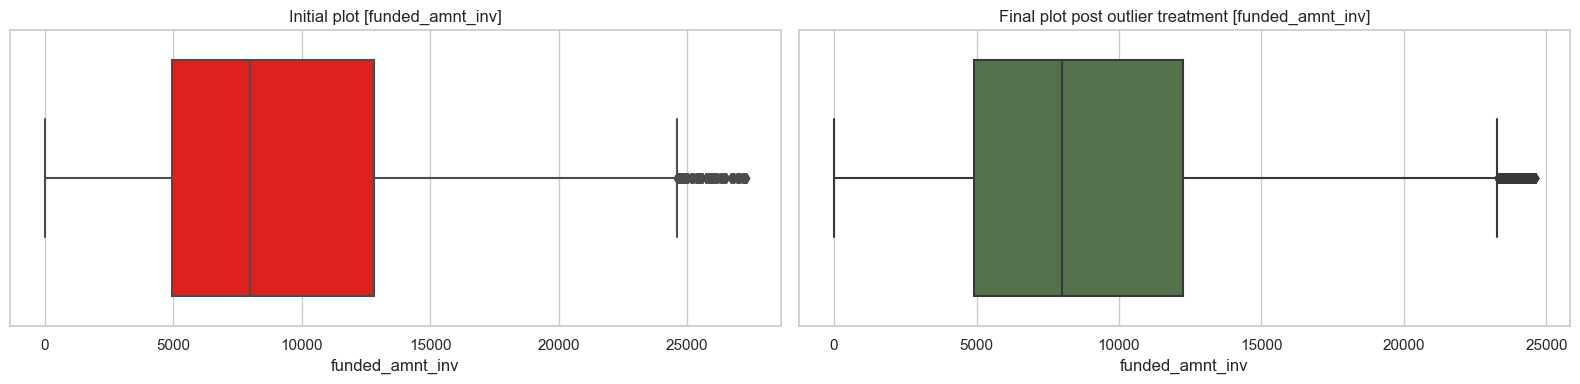

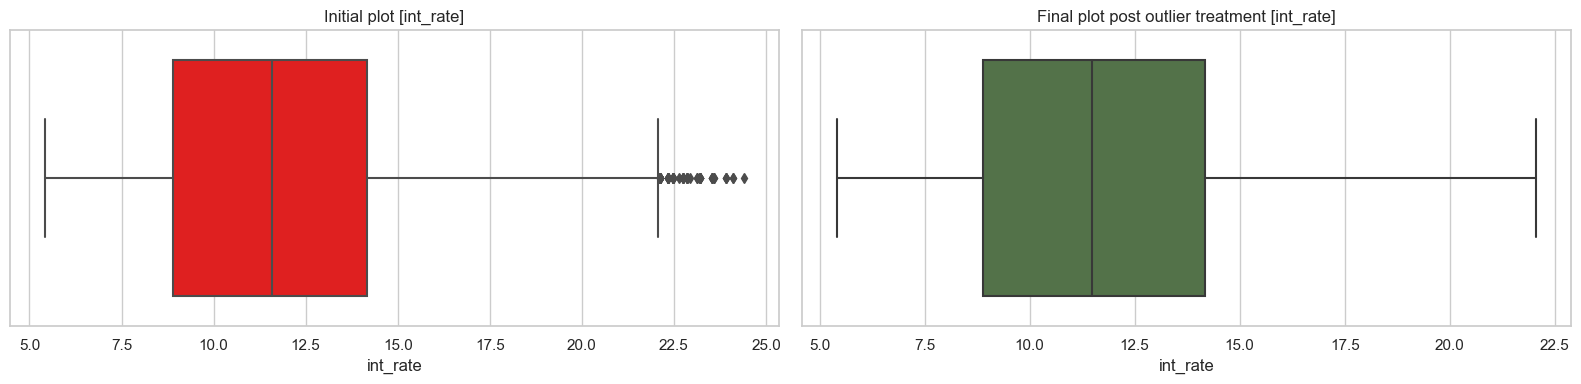

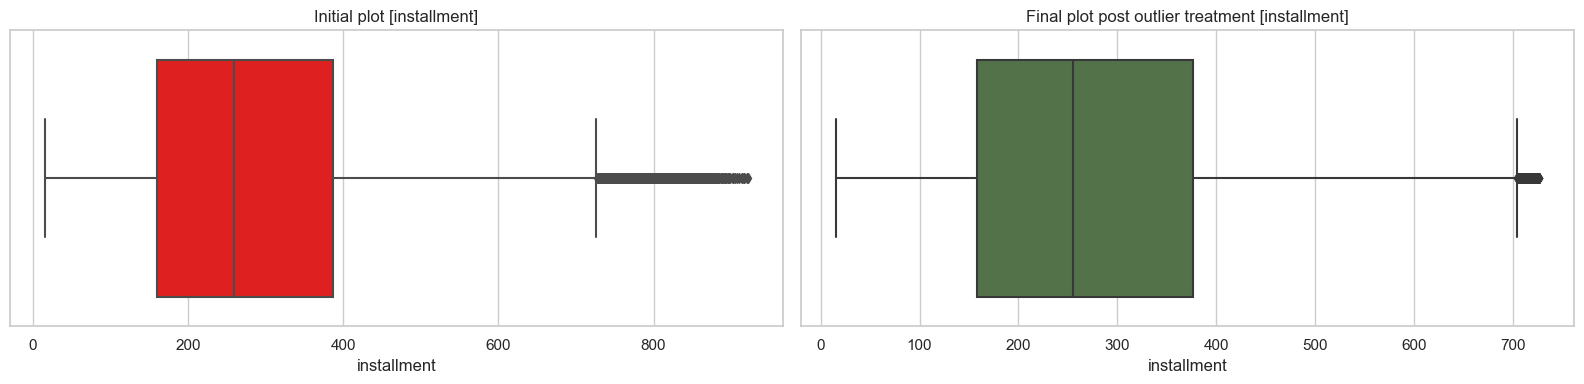

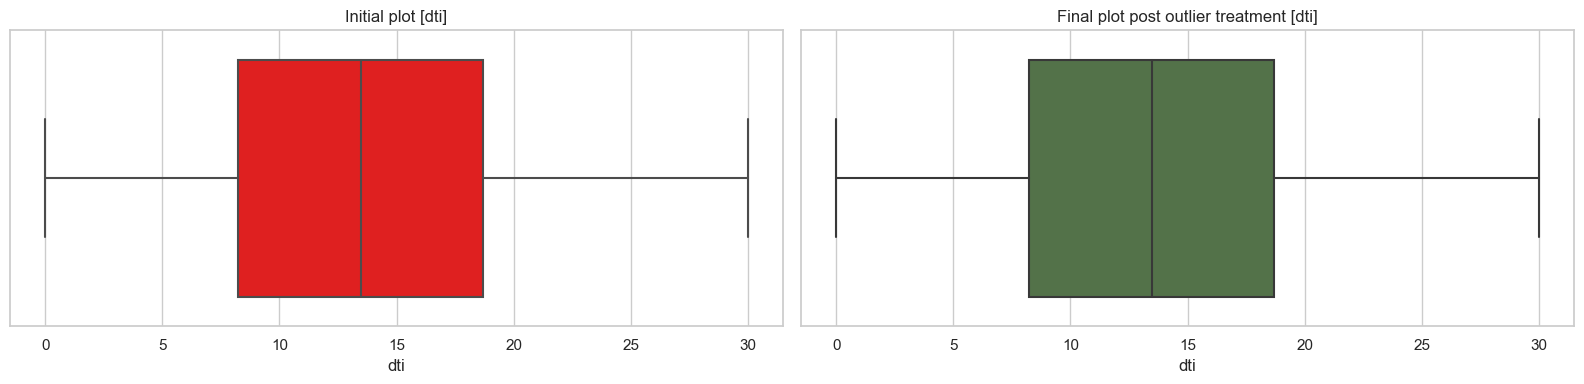

In [33]:
# Looping the above functions for all the numerical value columns in the dataset
# list of numerical columns in the dataset
numerical_columns = ['annual_inc','loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'dti']
for column in numerical_columns:
    # applying the functions to the columns
    box_plot_analysis(data_loan, column)
    data_loan = drop_outlier(data_loan, column)

As you can see from the box plot analysis it's clearly indicating the presence of outliers in few columns. Hence, we dropped those rows from the data.

In [34]:
# checking the shape of the data post outlier treatment
data_loan.shape

(34387, 19)

### Deriving Variables

In [35]:
# converting issue date into datetime format
data_loan['issue_d'] = pd.to_datetime(data_loan['issue_d'],format='%b-%y')
# generating issue year from issue date
data_loan['issue_year']=data_loan['issue_d'].dt.year
# generating issue month from issue date
data_loan['issue_month']=data_loan['issue_d'].dt.month

In [36]:
# Binning of variaous numerical variables to get more insights and statistical from their categorical version
data_loan['annual_inc_groups'] = pd.cut(data_loan['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])
data_loan['loan_amnt_groups'] = pd.cut(data_loan['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
data_loan['dti_groups'] = pd.cut(data_loan['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])
data_loan['int_rate_groups'] = pd.cut(data_loan['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
data_loan['installment_groups'] = pd.cut(data_loan['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])

In [37]:
# vaidating the generated variables
data_loan.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0       5000         5000         4,975.00   36 months     10.65       162.87   
1       2500         2500         2,500.00   60 months     15.27        59.83   
2       2400         2400         2,400.00   36 months     15.96        84.33   
3      10000        10000        10,000.00   36 months     13.49       339.31   
5       5000         5000         5,000.00   36 months      7.90       156.46   

  grade sub_grade  emp_length home_ownership  annual_inc verification_status  \
0     B        B2          10           RENT   24,000.00            Verified   
1     C        C4           0           RENT   30,000.00     Source Verified   
2     C        C5          10           RENT   12,252.00        Not Verified   
3     C        C1          10           RENT   49,200.00     Source Verified   
5     A        A4           3           RENT   36,000.00     Source Verified   

     issue_d  loan_status         purpose addr_state   dti  pub_rec  \
0 2011-12-01   Fully Paid     credit_card         AZ 27.65        0   
1 2011-12-01  Charged Off             car         GA  1.00        0   
2 2011-12-01   Fully Paid  small_business         IL  8.72        0   
3 2011-12-01   Fully Paid           other         CA 20.00        0   
5 2011-12-01   Fully Paid         wedding         AZ 11.20        0   

   pub_rec_bankruptcies  issue_year  issue_month annual_inc_groups  \
0                  0.00        2011           12            3k-31k   
1                  0.00        2011           12            3k-31k   
2                  0.00        2011           12            3k-31k   
3                  0.00        2011           12           31k-58k   
5                  0.00        2011           12           31k-58k   

  loan_amnt_groups dti_groups int_rate_groups installment_groups  
0           5k-10k      24-30          9%-13%            274-403  
1             0-5k        0-6         13%-17%             14-145  
2             0-5k       6-12         17%-21%             14-145  
3          10k-15k      18-24         13%-17%            531-660  
5           5k-10k       6-12           5%-9%            145-274

# Univariate Analysis

Numerical Variables

In [38]:
# Column dictionary used by functions below
column_titles = {
    'loan_amnt': 'Loan Amount',
    'funded_amnt': 'Funded Amount',
    'funded_amnt_inv': 'Funded Amount Investors',
    'term': 'Loan Term',
    'int_rate': 'Interest Rate',
    'installment': 'Installment',
    'grade': 'Grade',
    'sub_grade':'Sub Grade',
    'emp_length': 'Employment Length',
    'home_ownership': 'Home Owner Status',
    'annual_inc': 'Annual Income', 
    'verification_status': 'Verification Status',
    'issue_d': 'Issue Date',
    'loan_status': 'Loan Status',
    'purpose': 'Purpose of Loan',
    'addr_state': 'State',
    'dti': 'Debt To Income Ratio',
    'pub_rec_bankruptcies': 'Bankruptcies Record',
    'pub_rec': 'Derogatory Public Records',
    'issue_year': 'Issue Year',
    'issue_month': 'Issue Month',
    'loan_amnt_groups': 'Loan Amount Bins',
    'annual_inc_groups': 'Annual Income Bins',
    'int_rate_groups': 'Interest Rate Bins',
    'dti_groups': 'DTI Bins',
    'installment_groups': 'Installment Bins'
}

In [39]:
# customized function to create plots for single numerical variables
def numerical_univariate(df, column_name):
    # initializing the size, number of subplots and their position
    fig, p = plt.subplots(1,2, figsize=(16, 4))
    # creating Distribution plot
    sns.distplot(df[column_name], kde=True, hist=True, ax=p[0], color='blue')
    # creating violin plot 
    sns.violinplot(x=column_name, data=df, ax=p[1], orient='v', color='orange')
    # setting title and lables for plots
    p[0].set_title('Distribution Plot for ' + column_titles[column_name] + '')
    p[0].set_xlabel(column_titles[column_name])
    p[1].set_title('Violin Plot for ' + column_titles[column_name] + '')
    p[1].set_xlabel(column_titles[column_name])
    plt.tight_layout()
    plt.show()

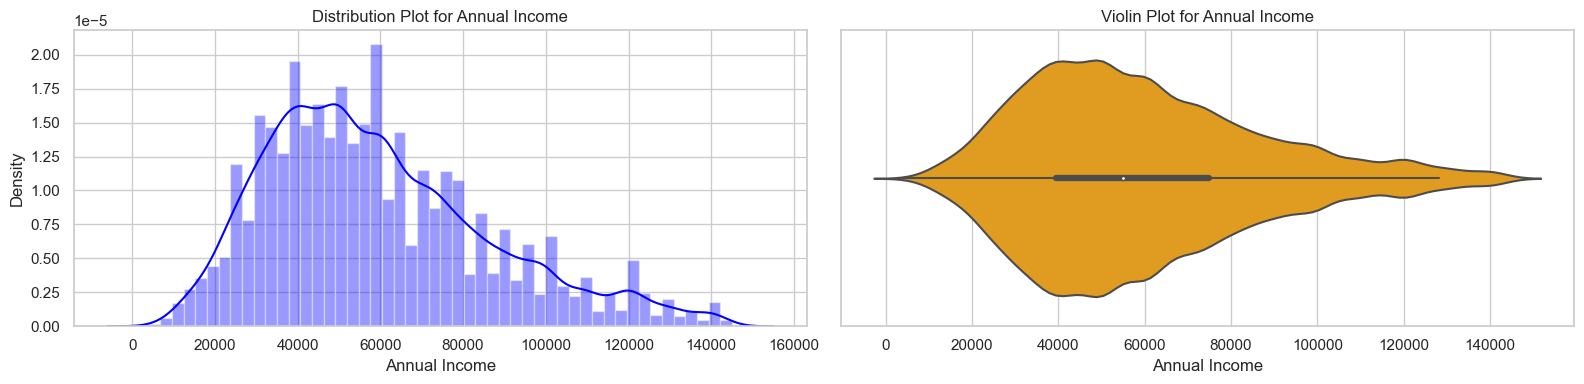

In [40]:
numerical_univariate(data_loan, 'annual_inc')

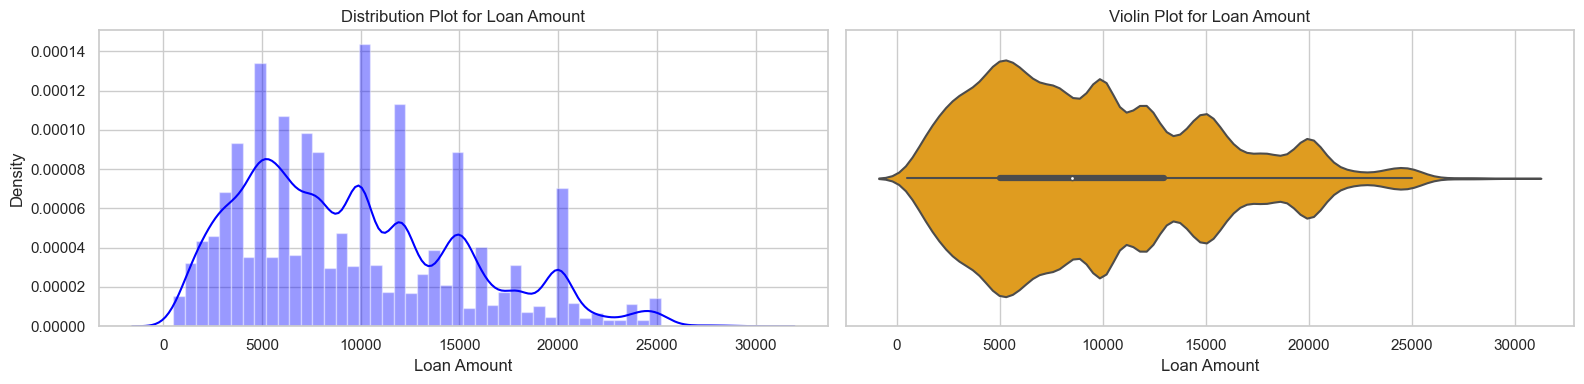

In [41]:
numerical_univariate(data_loan, 'loan_amnt')

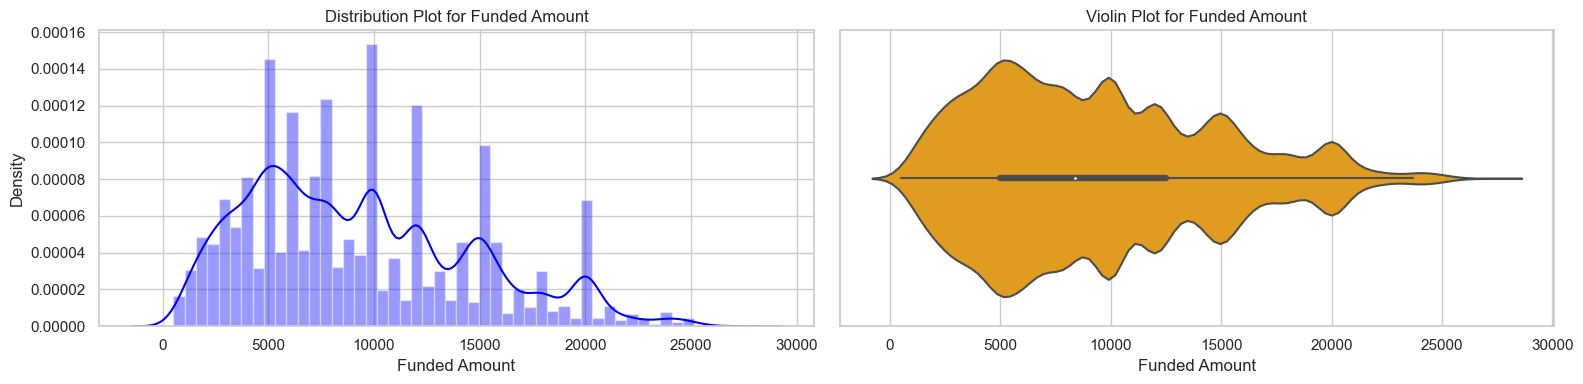

In [42]:
numerical_univariate(data_loan, 'funded_amnt')

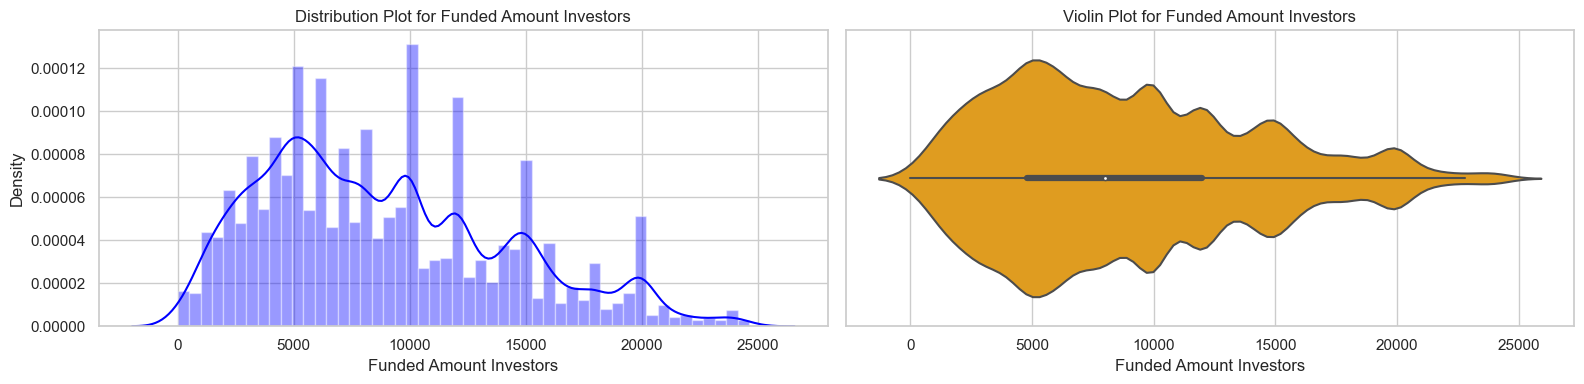

In [43]:
numerical_univariate(data_loan, 'funded_amnt_inv')

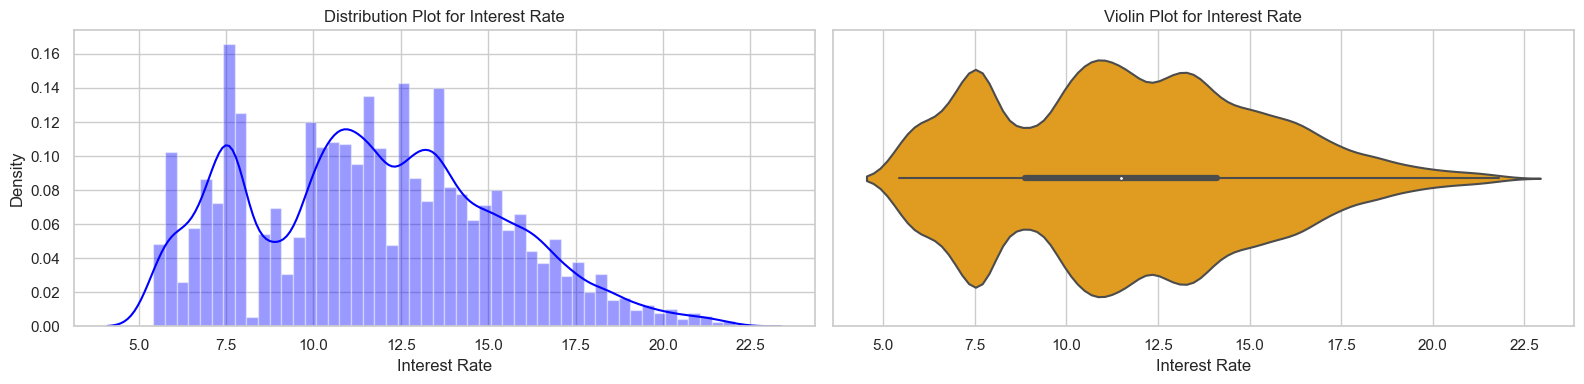

In [44]:
numerical_univariate(data_loan, 'int_rate')

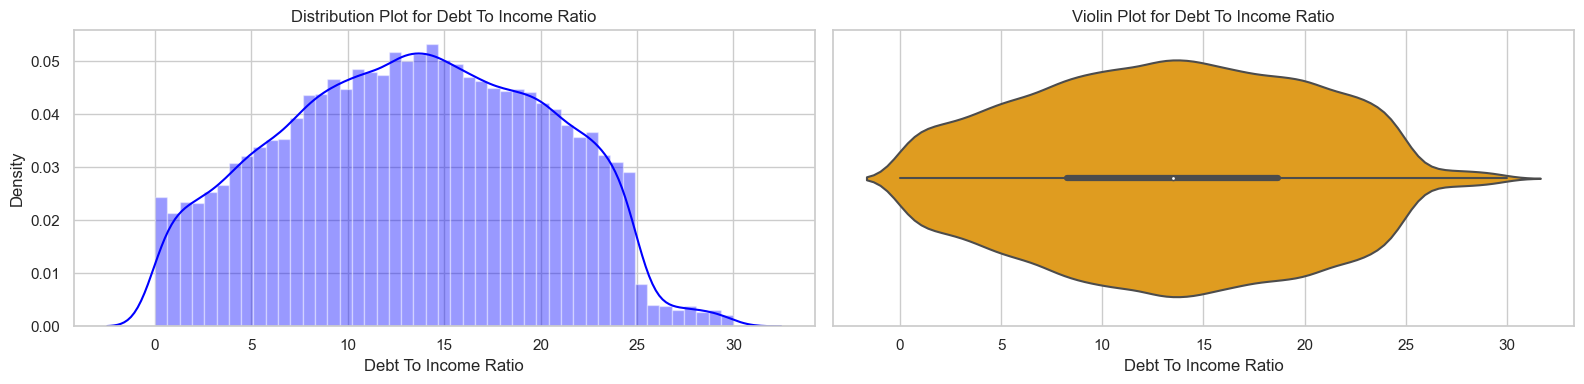

In [45]:
numerical_univariate(data_loan, 'dti')

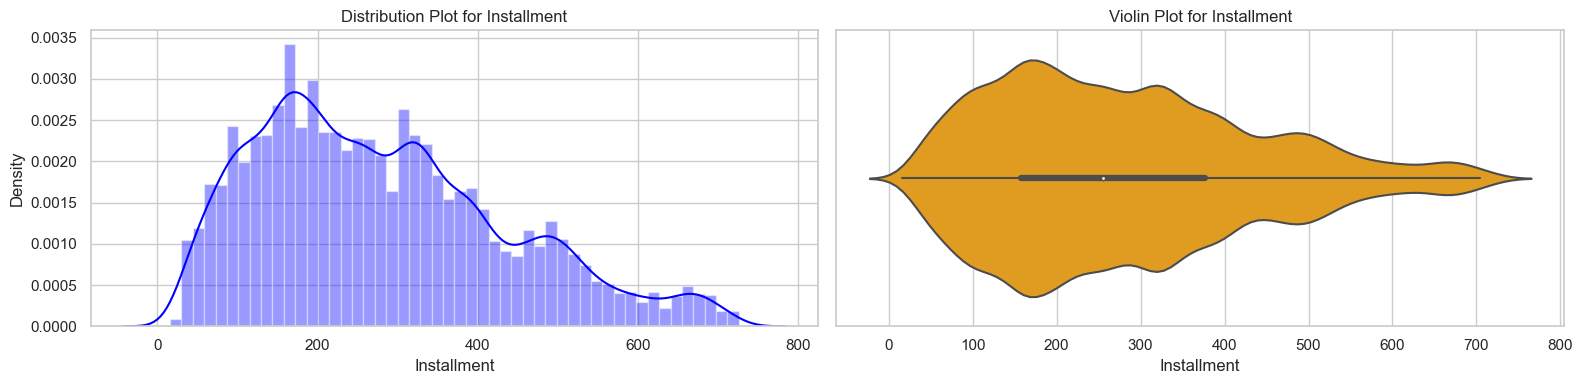

In [46]:
numerical_univariate(data_loan, 'installment')

In [47]:
# customized function to create plots for single numerical variables
def categorical_univariate(df, column_name):
    fig, p = plt.subplots(1,2, figsize=(18, 8))
    # creating frequency plot
    sns.countplot(y = df[column_name], ax=p[0])
    # assigning colors for pie chart
    palette_color = sns.color_palette('bright')
    # creating pie chart
    plt.pie(df[column_name].value_counts(), labels = df[column_name].unique(), autopct='%.0f%%', colors=palette_color)
    # setting title and lables for plots
    p[0].set_title('Frequency Plot for ' + column_titles[column_name] + '')
    p[0].set_xlabel(column_titles[column_name])
    p[1].set_title('Pie chart for ' + column_titles[column_name] + '')
    p[1].set_xlabel(column_titles[column_name])
    plt.tight_layout()
    plt.show()

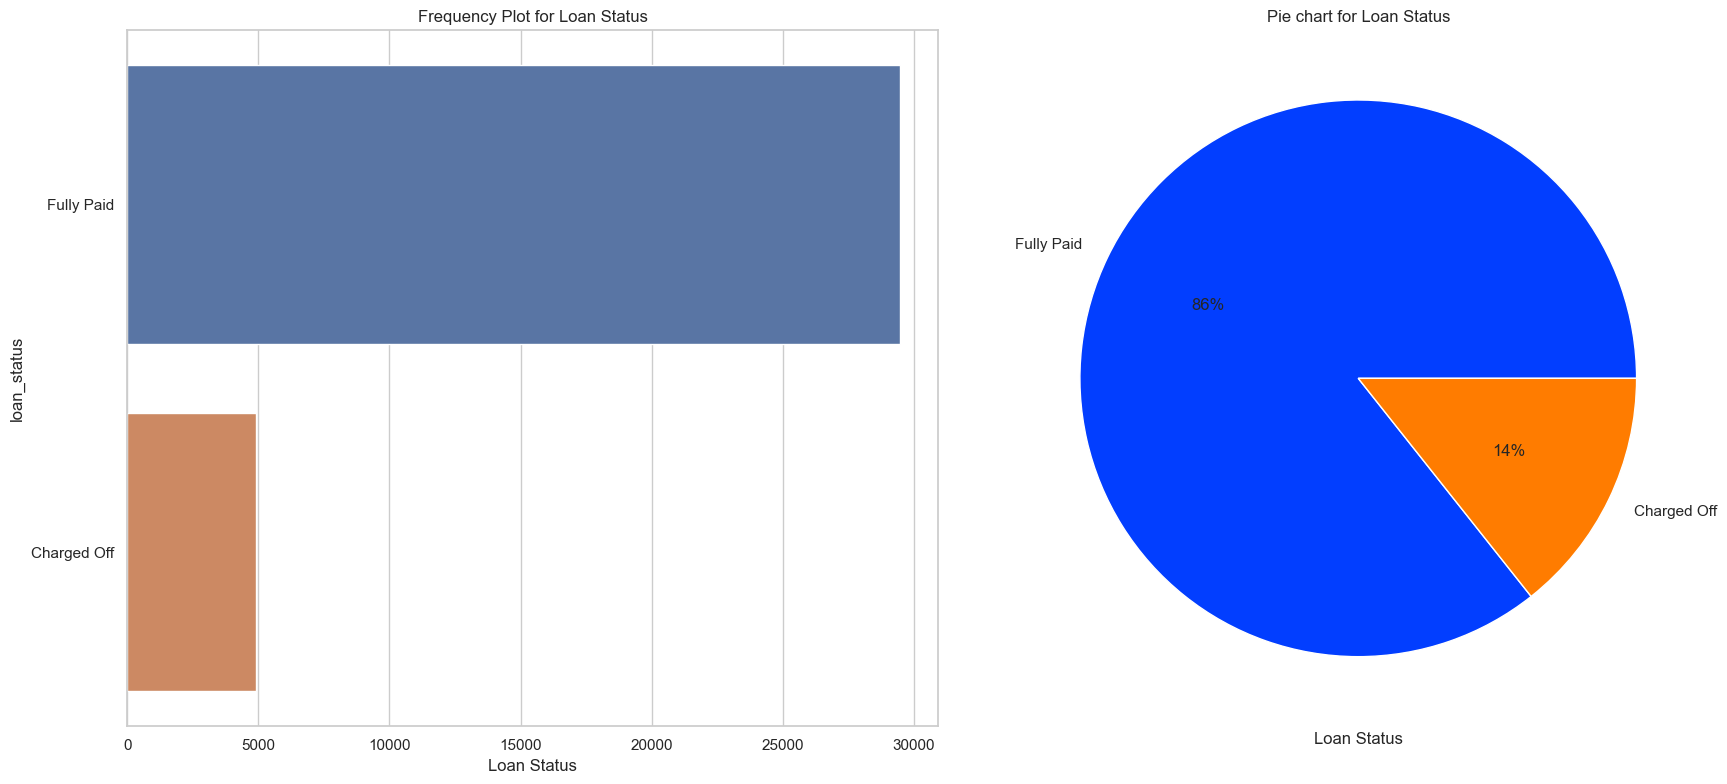

In [48]:
categorical_univariate(data_loan, 'loan_status')

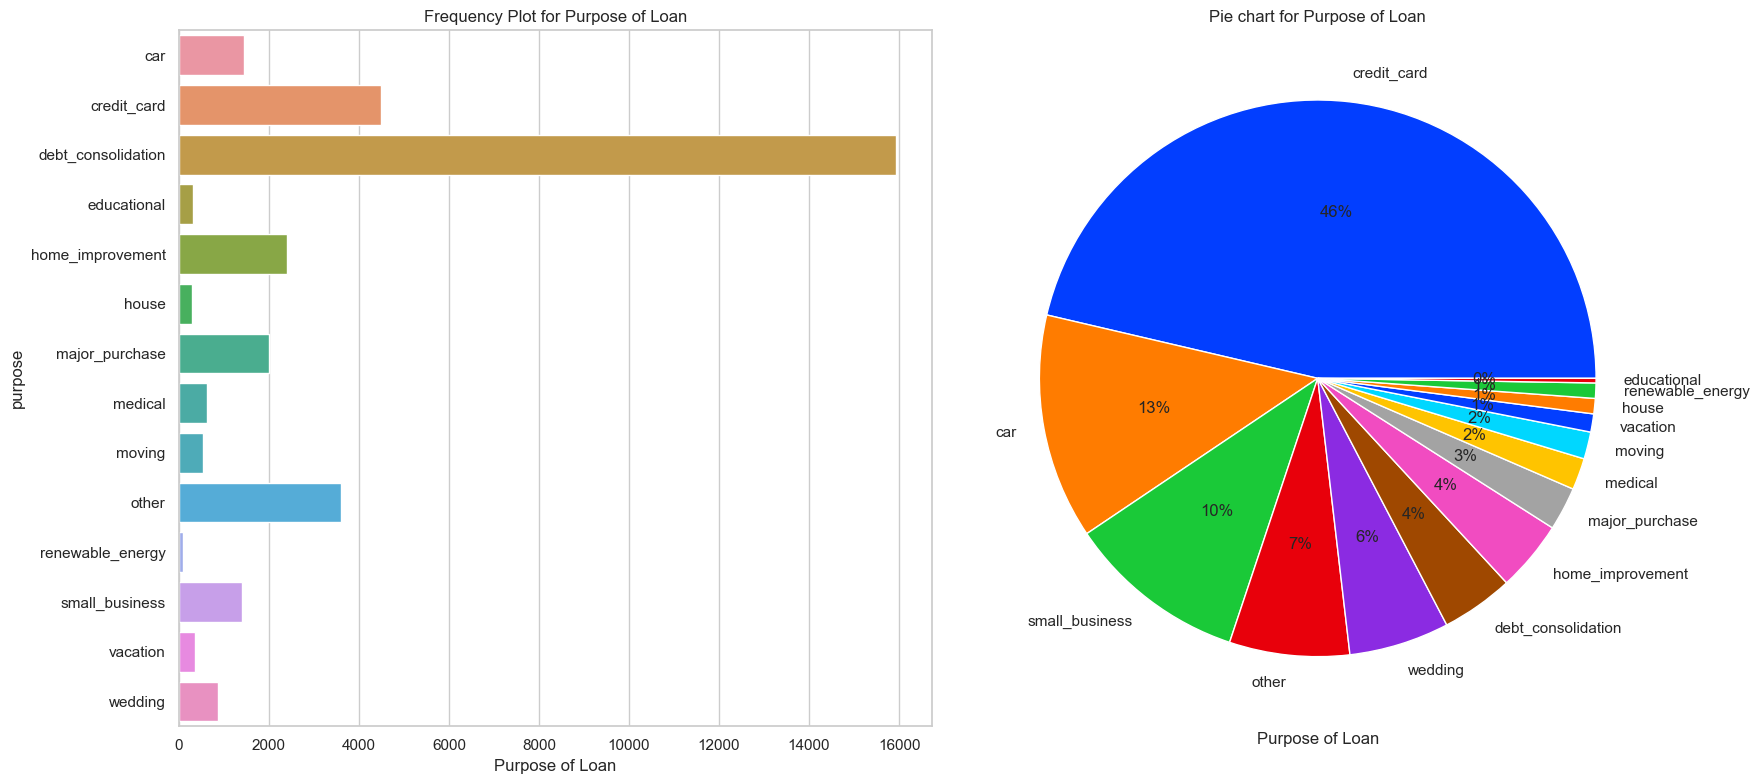

In [49]:
categorical_univariate(data_loan, 'purpose')

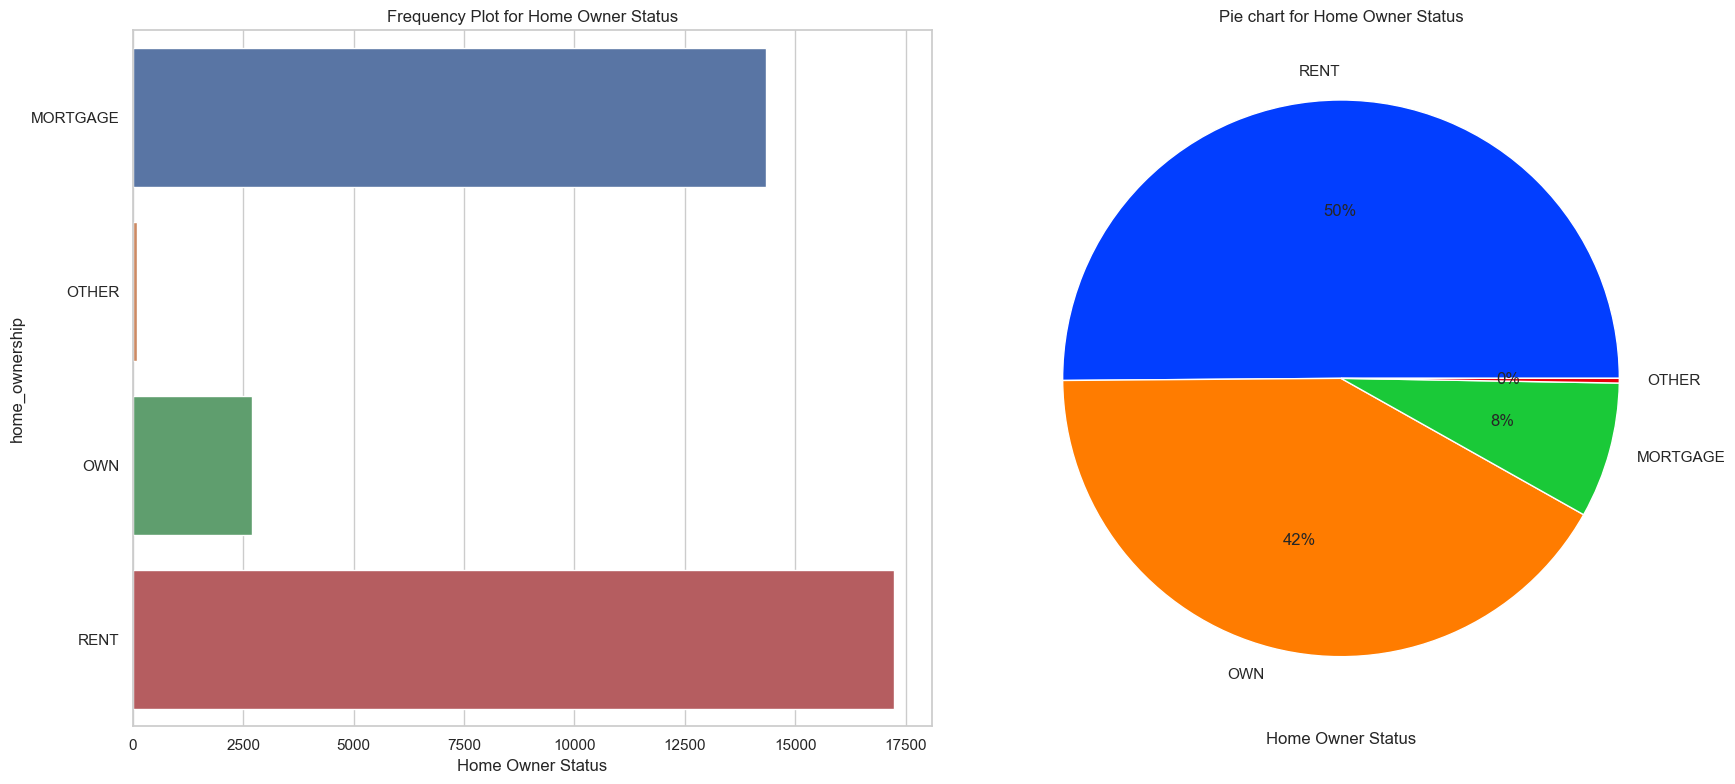

In [50]:
categorical_univariate(data_loan, 'home_ownership')

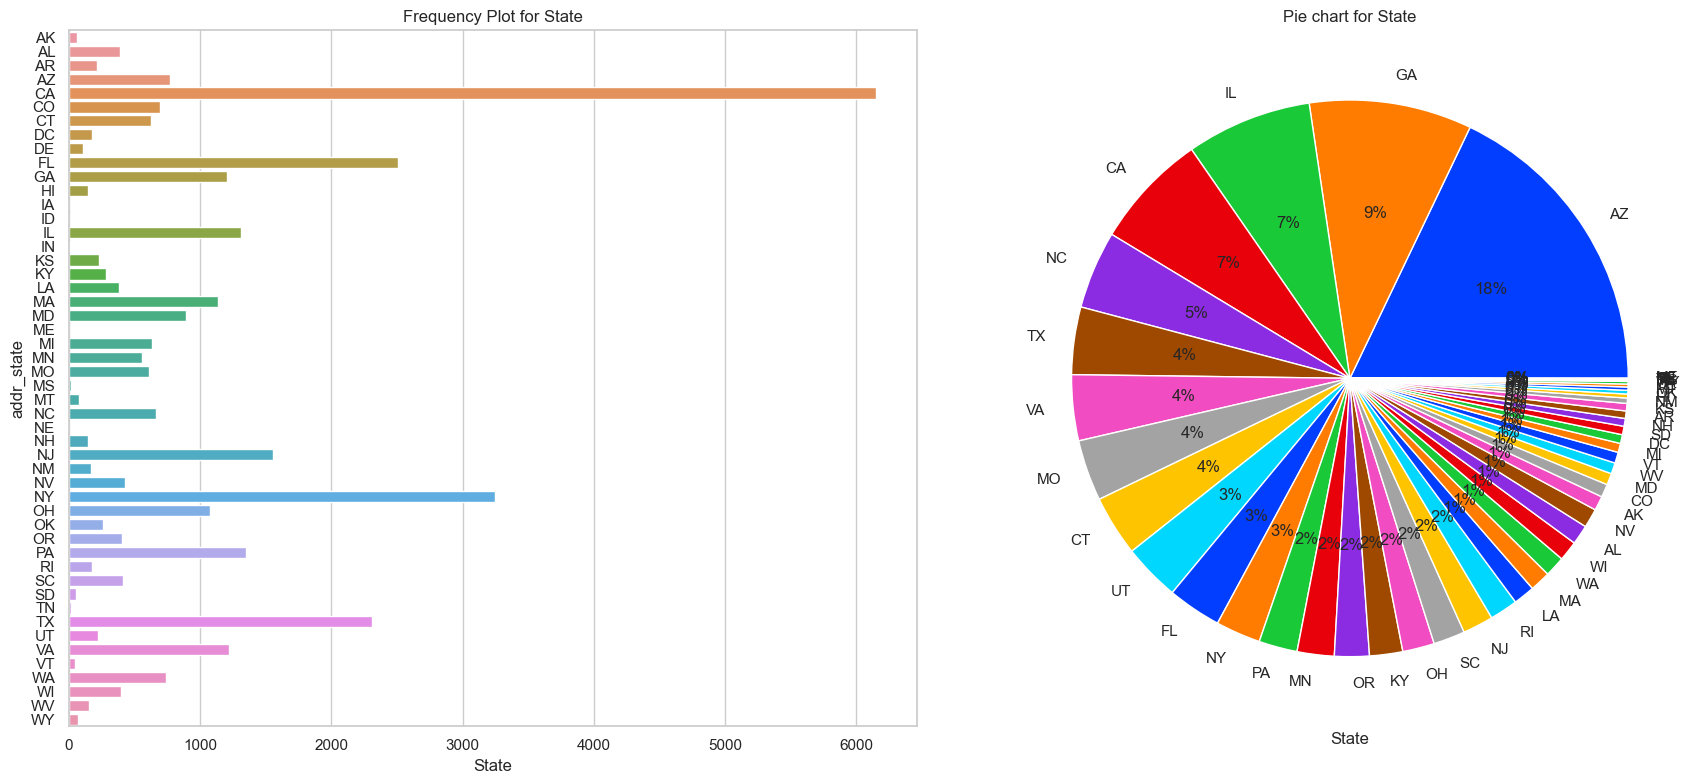

In [51]:
categorical_univariate(data_loan, 'addr_state')

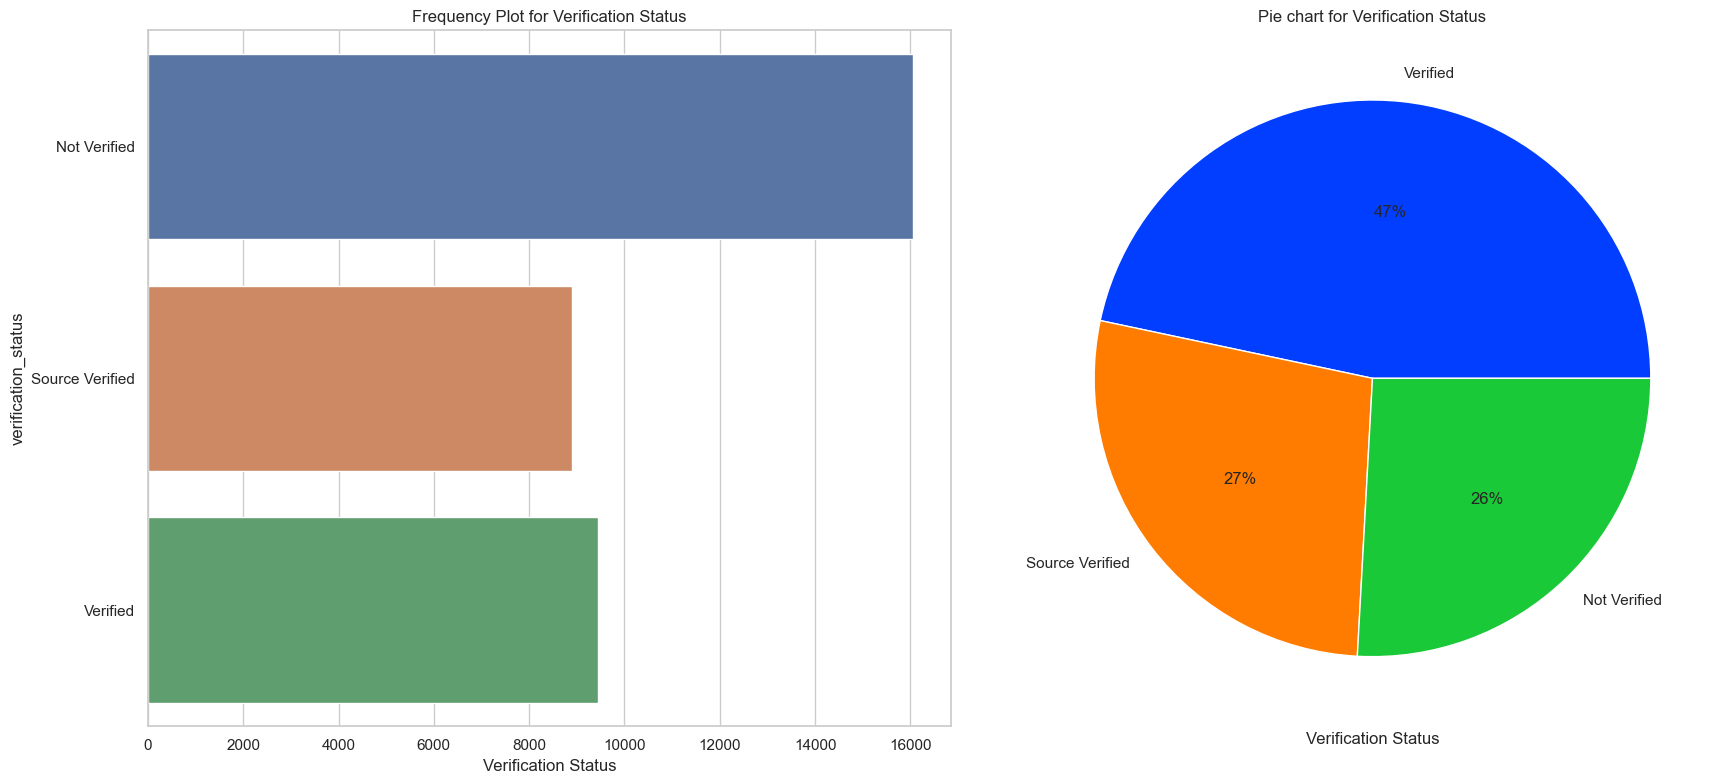

In [52]:
categorical_univariate(data_loan, 'verification_status')

Ordered Categorical Variable

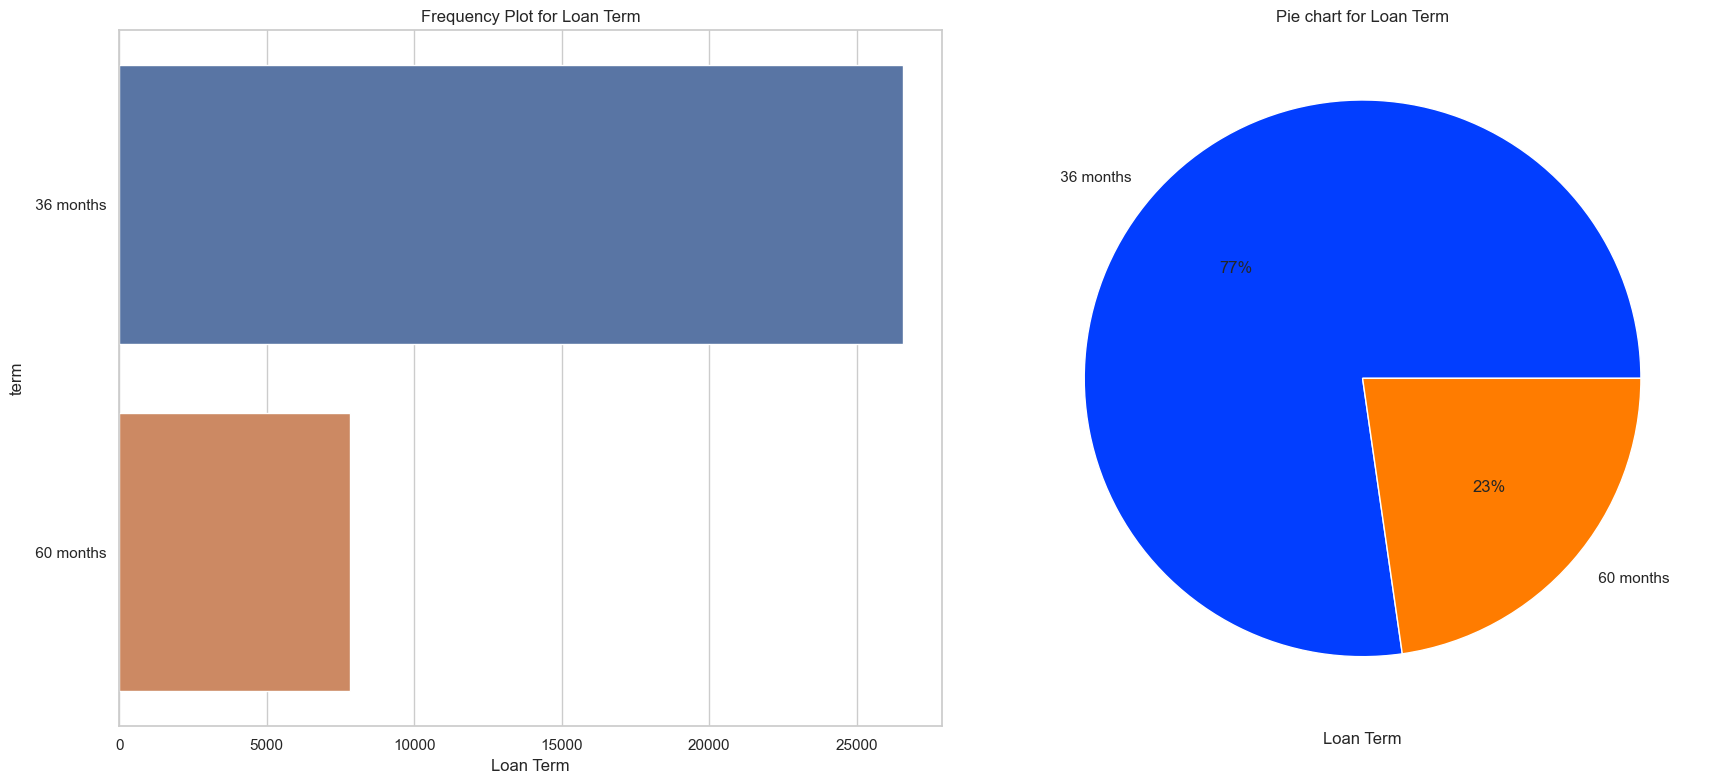

In [53]:
categorical_univariate(data_loan, 'term')

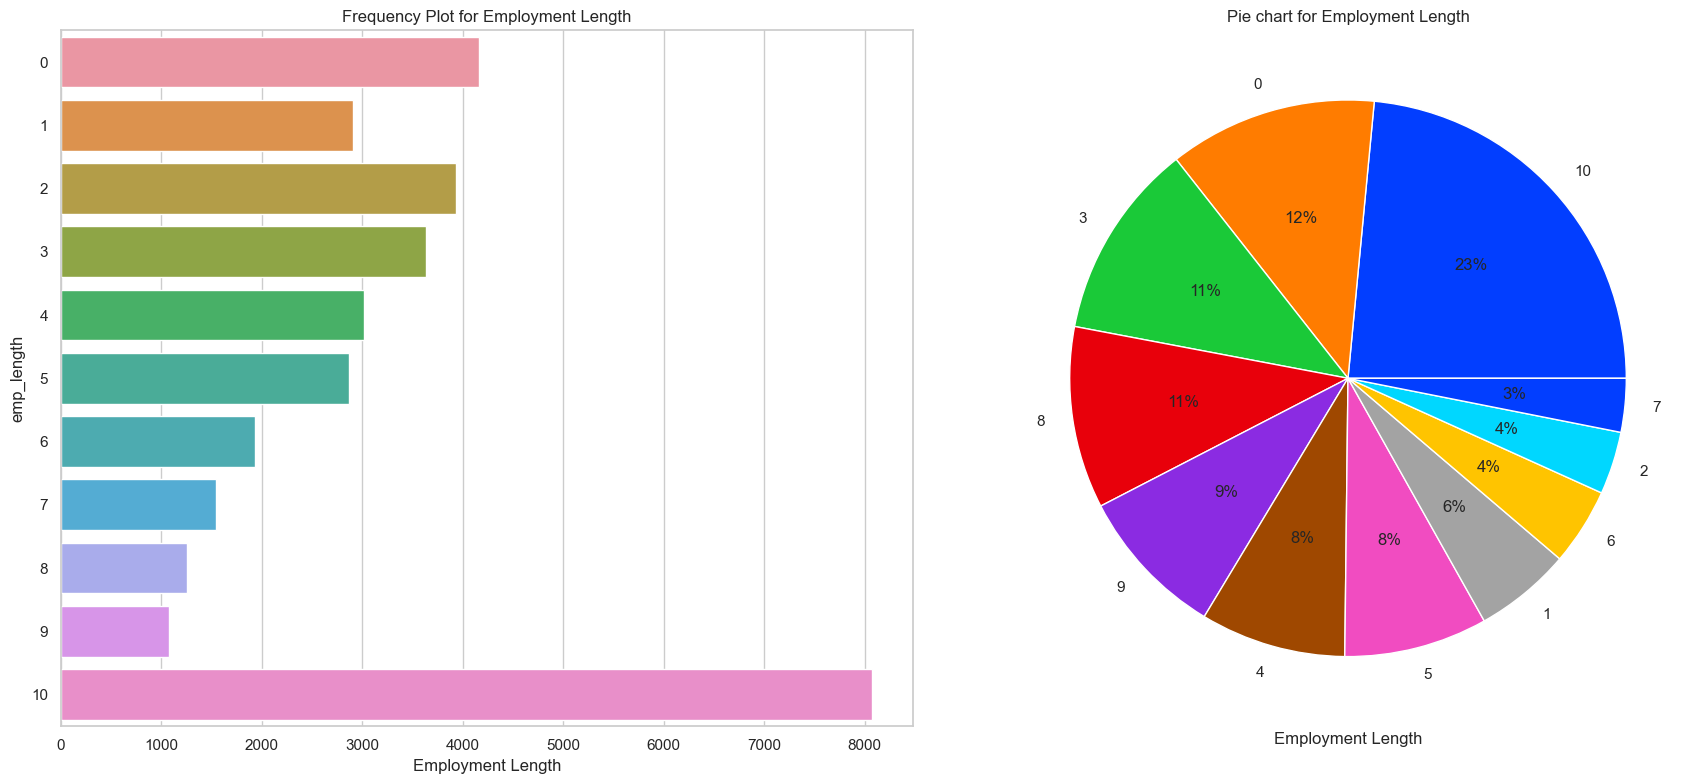

In [54]:
categorical_univariate(data_loan, 'emp_length')

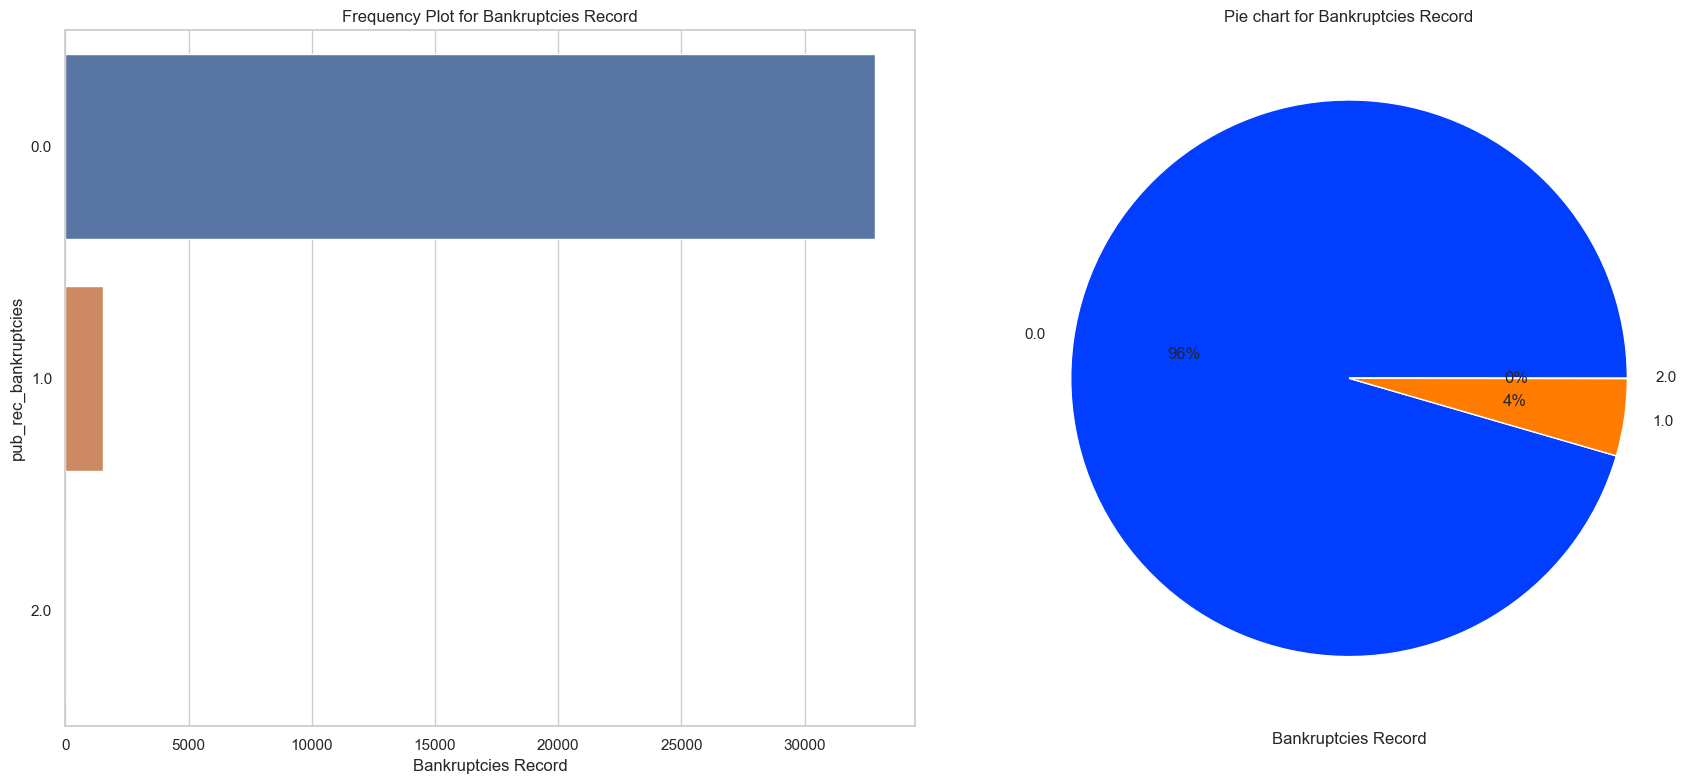

In [55]:
categorical_univariate(data_loan, 'pub_rec_bankruptcies')

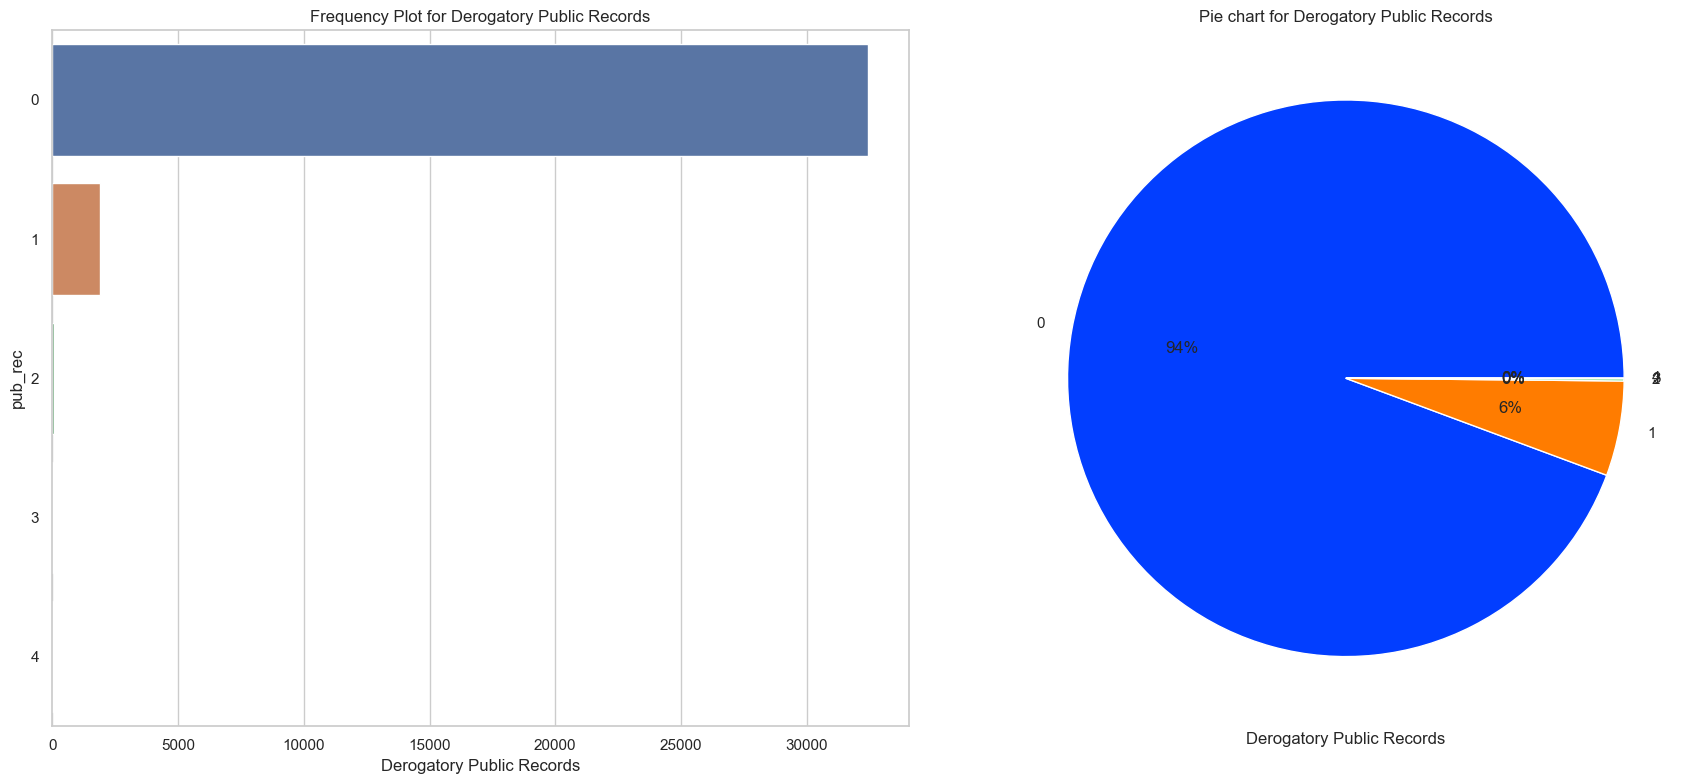

In [56]:
categorical_univariate(data_loan, 'pub_rec')

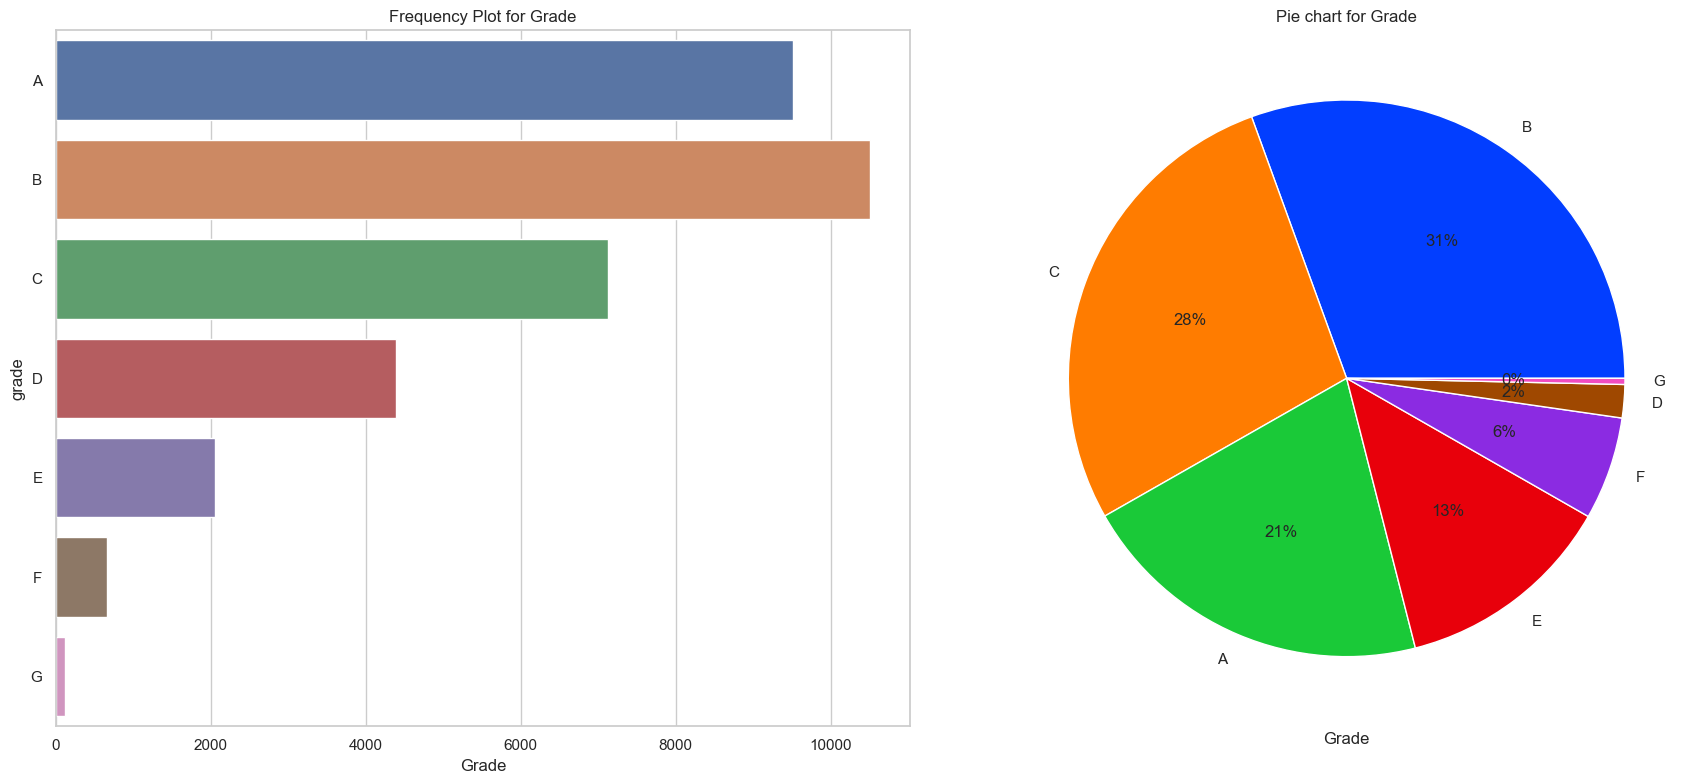

In [57]:
categorical_univariate(data_loan, 'grade')

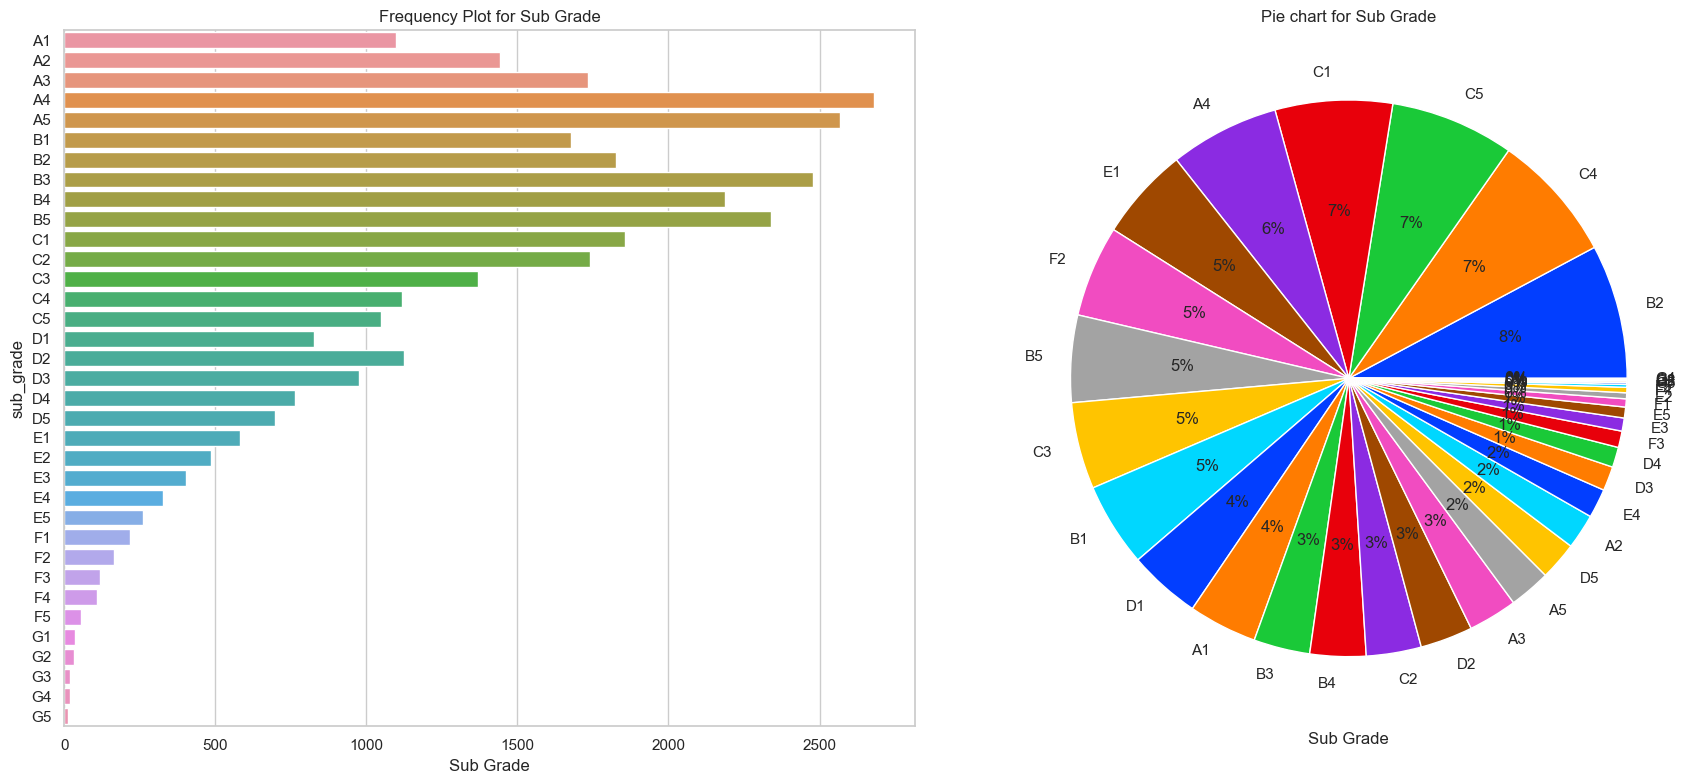

In [58]:
categorical_univariate(data_loan, 'sub_grade')

Derived Varaibles

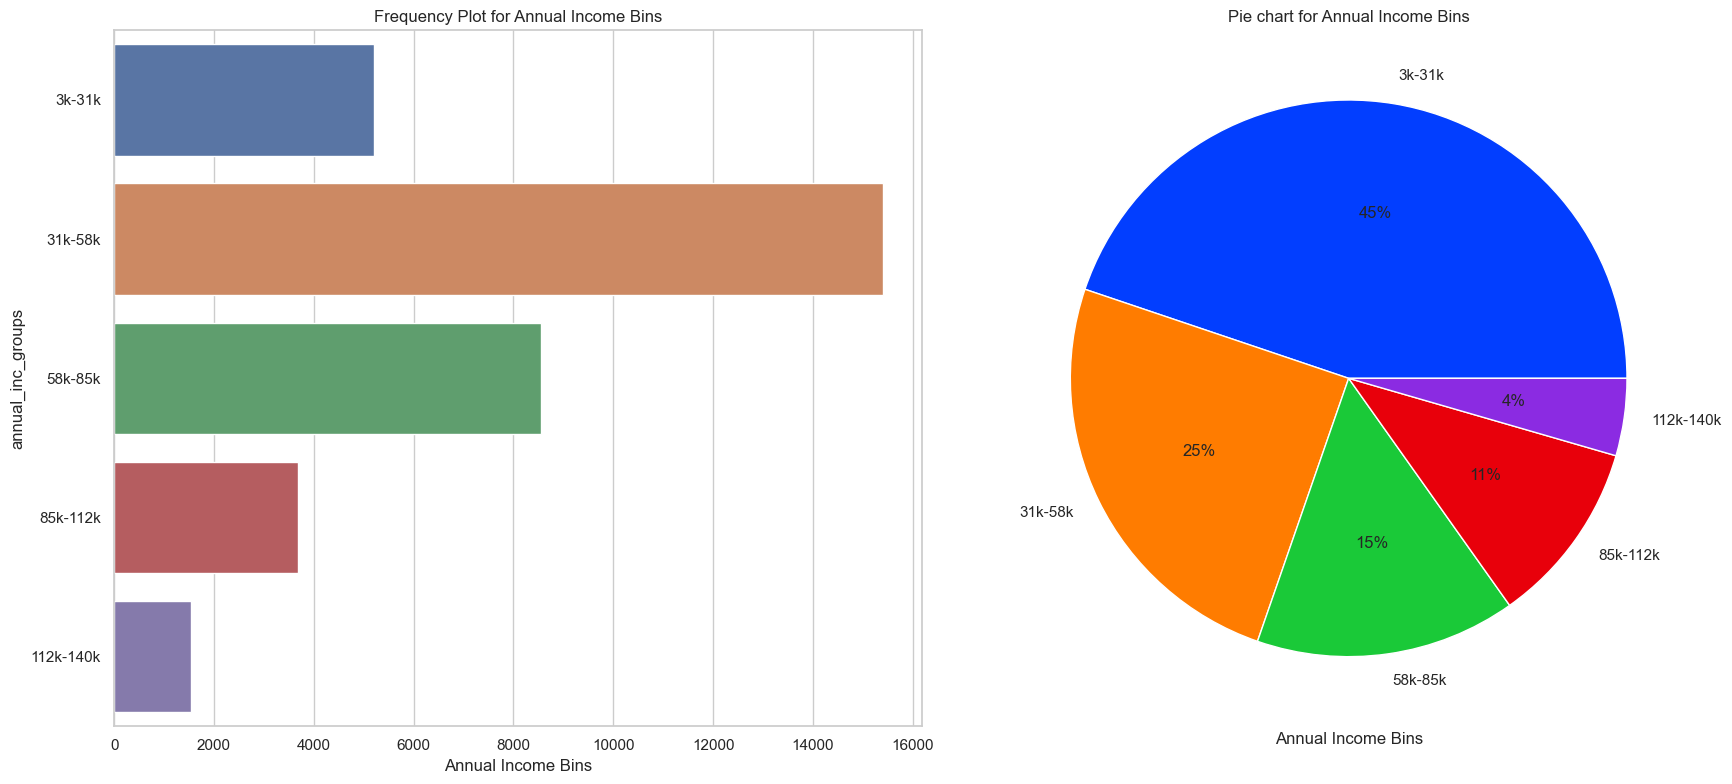

In [59]:
categorical_univariate(data_loan, 'annual_inc_groups')

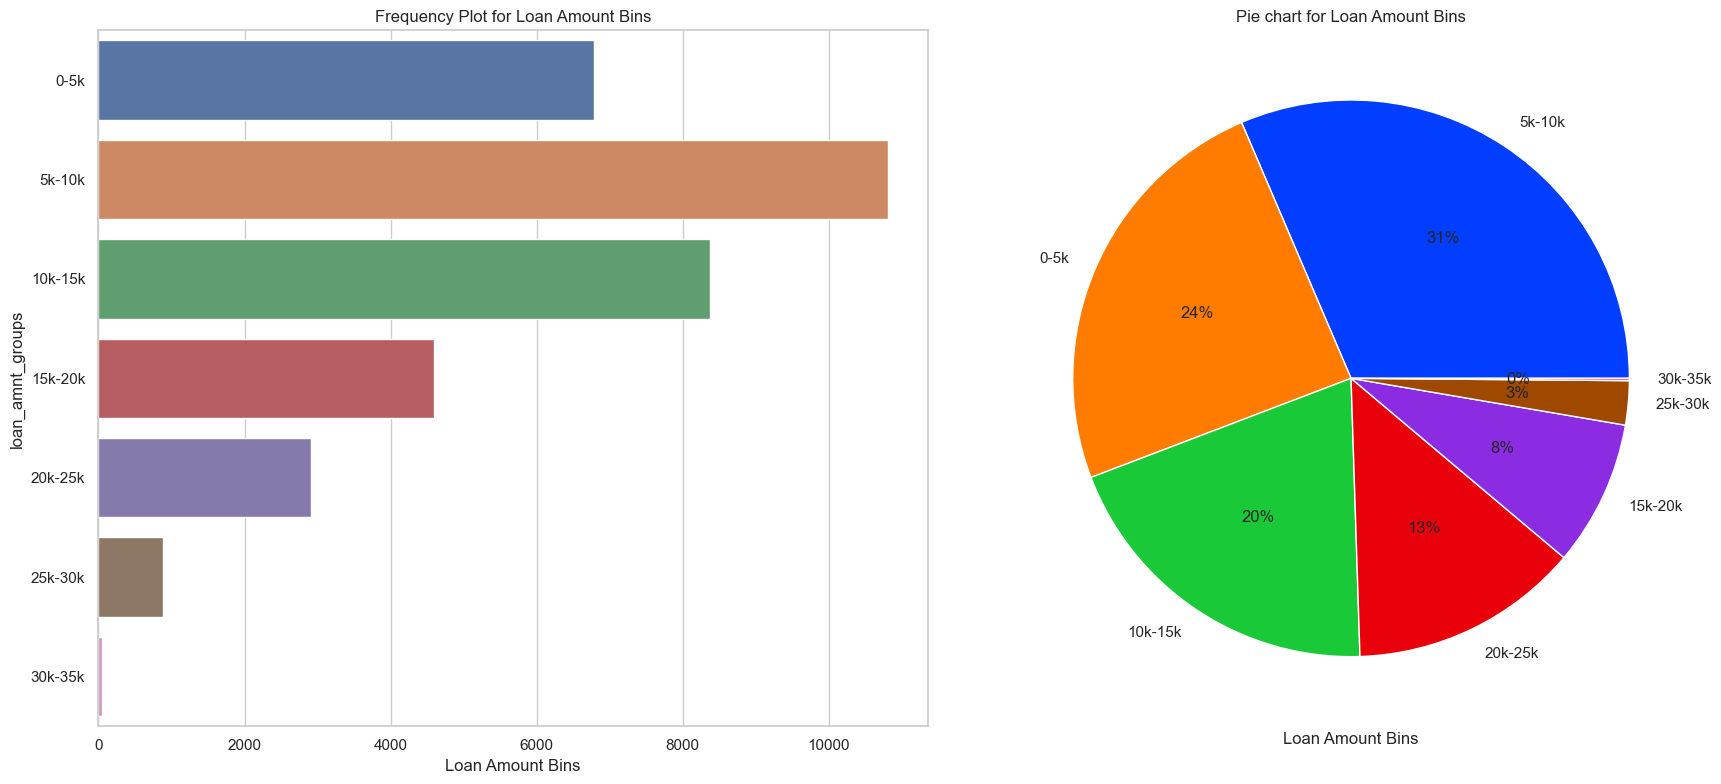

In [60]:
categorical_univariate(data_loan, 'loan_amnt_groups')

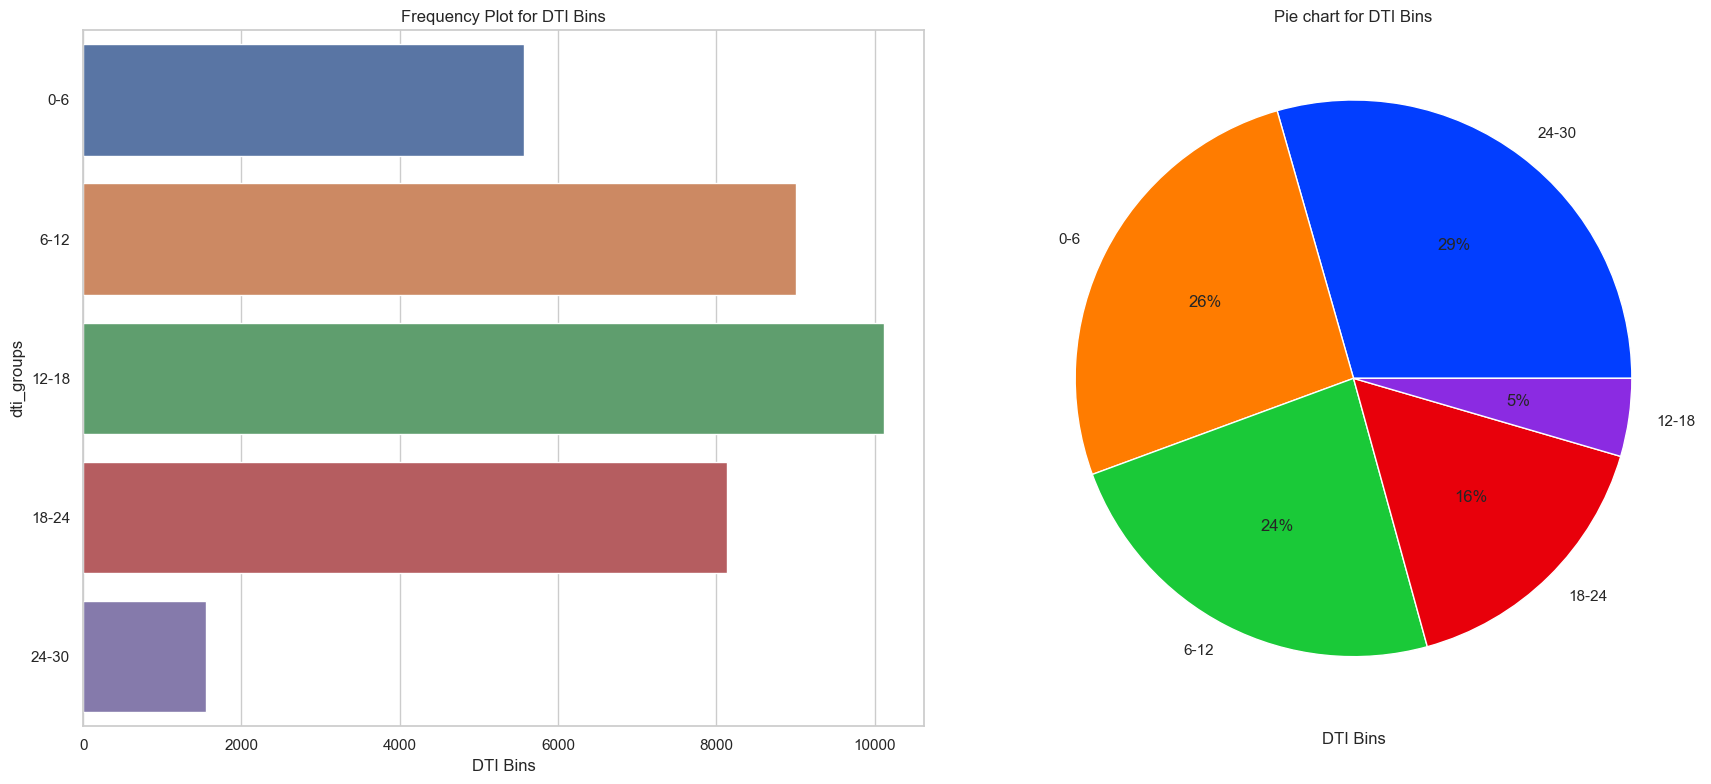

In [61]:
categorical_univariate(data_loan, 'dti_groups')

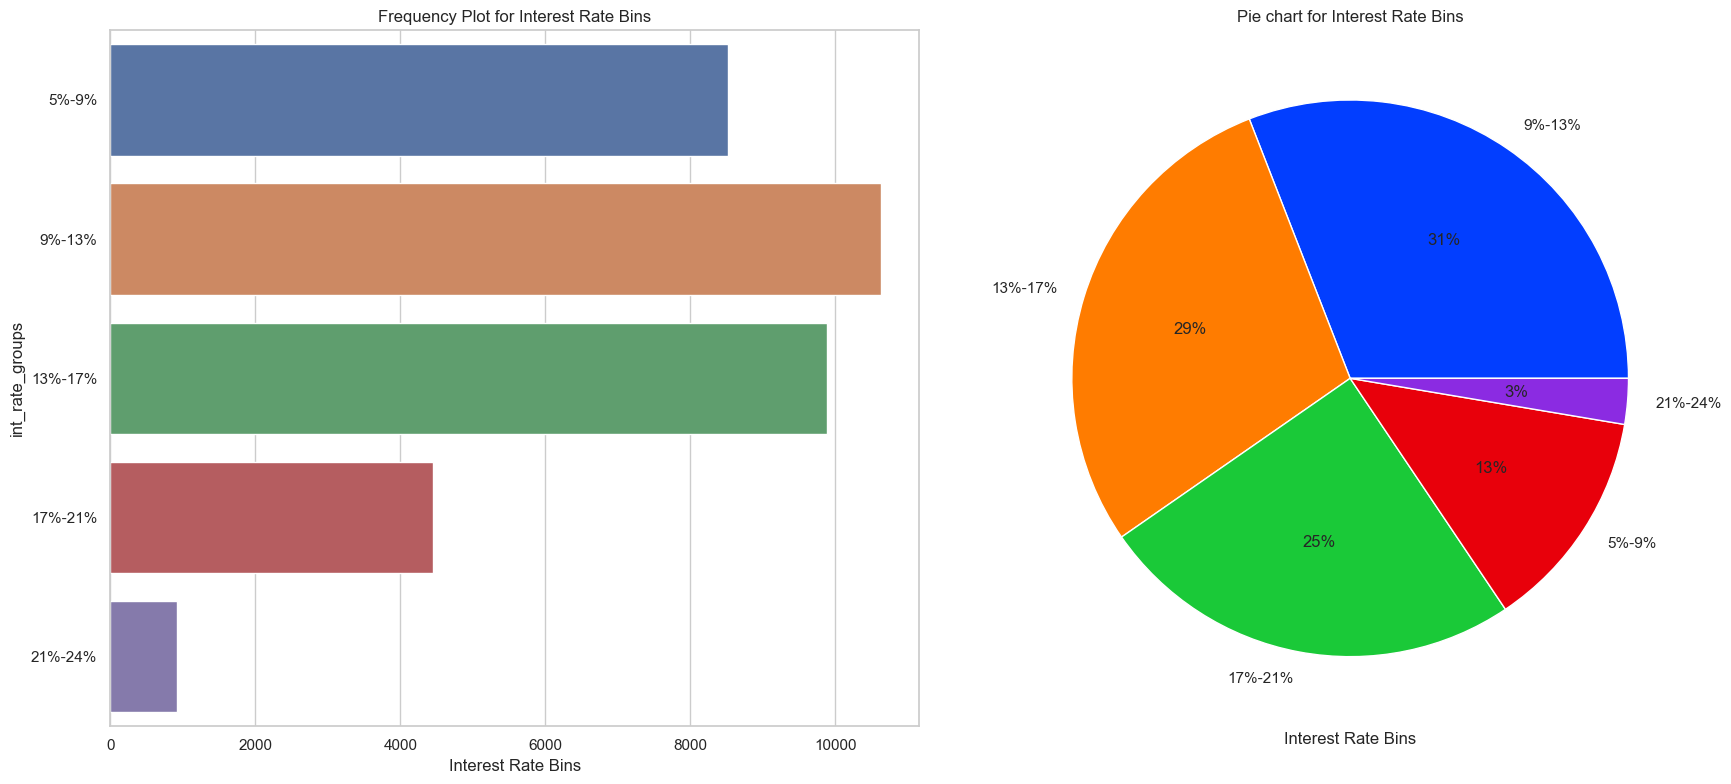

In [62]:
categorical_univariate(data_loan, 'int_rate_groups')

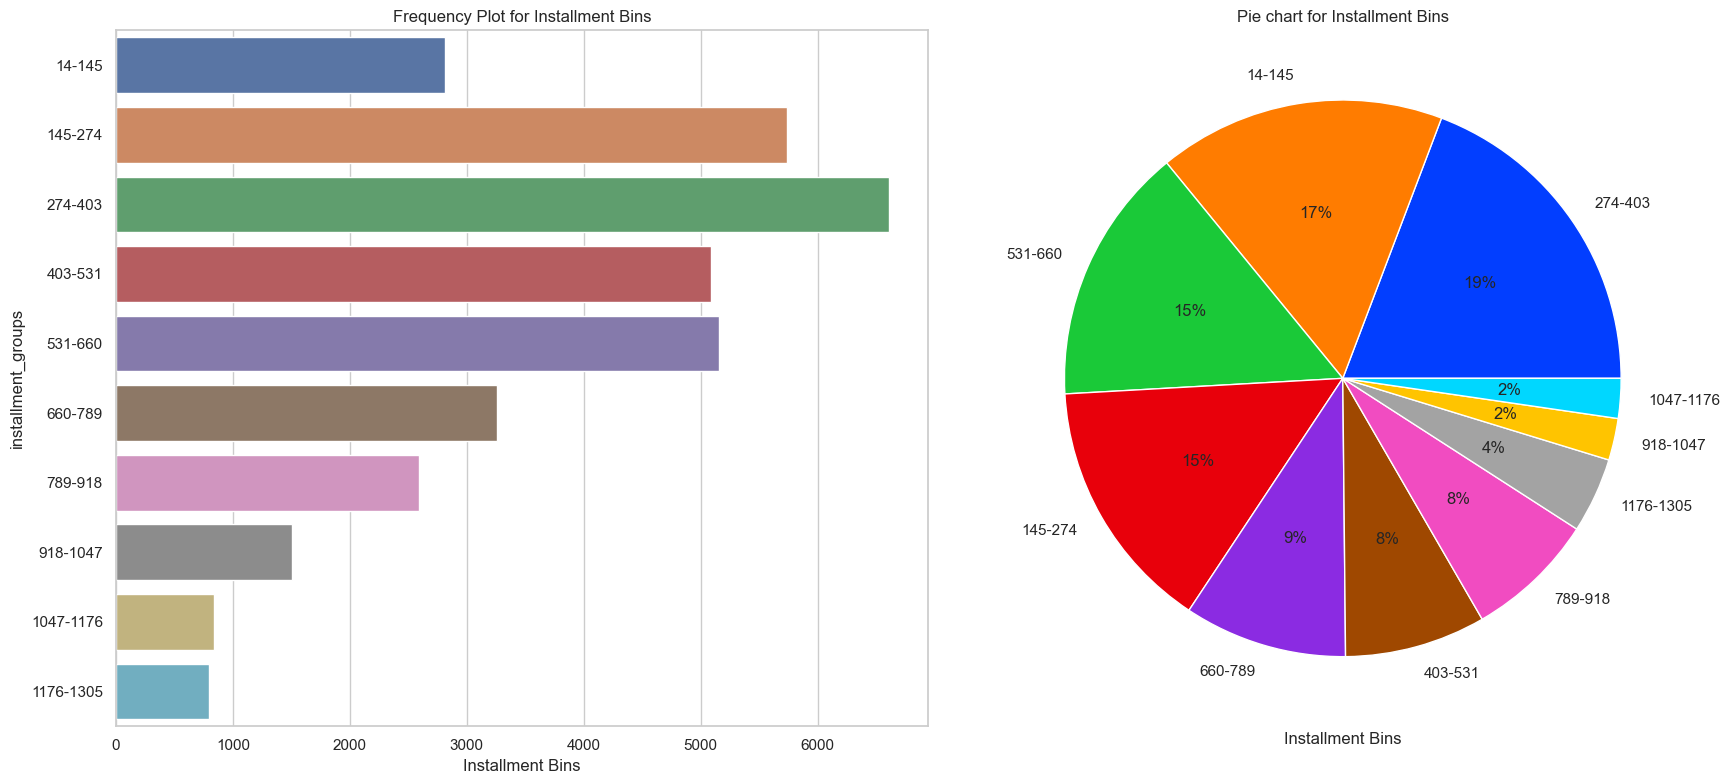

In [63]:
categorical_univariate(data_loan, 'installment_groups')

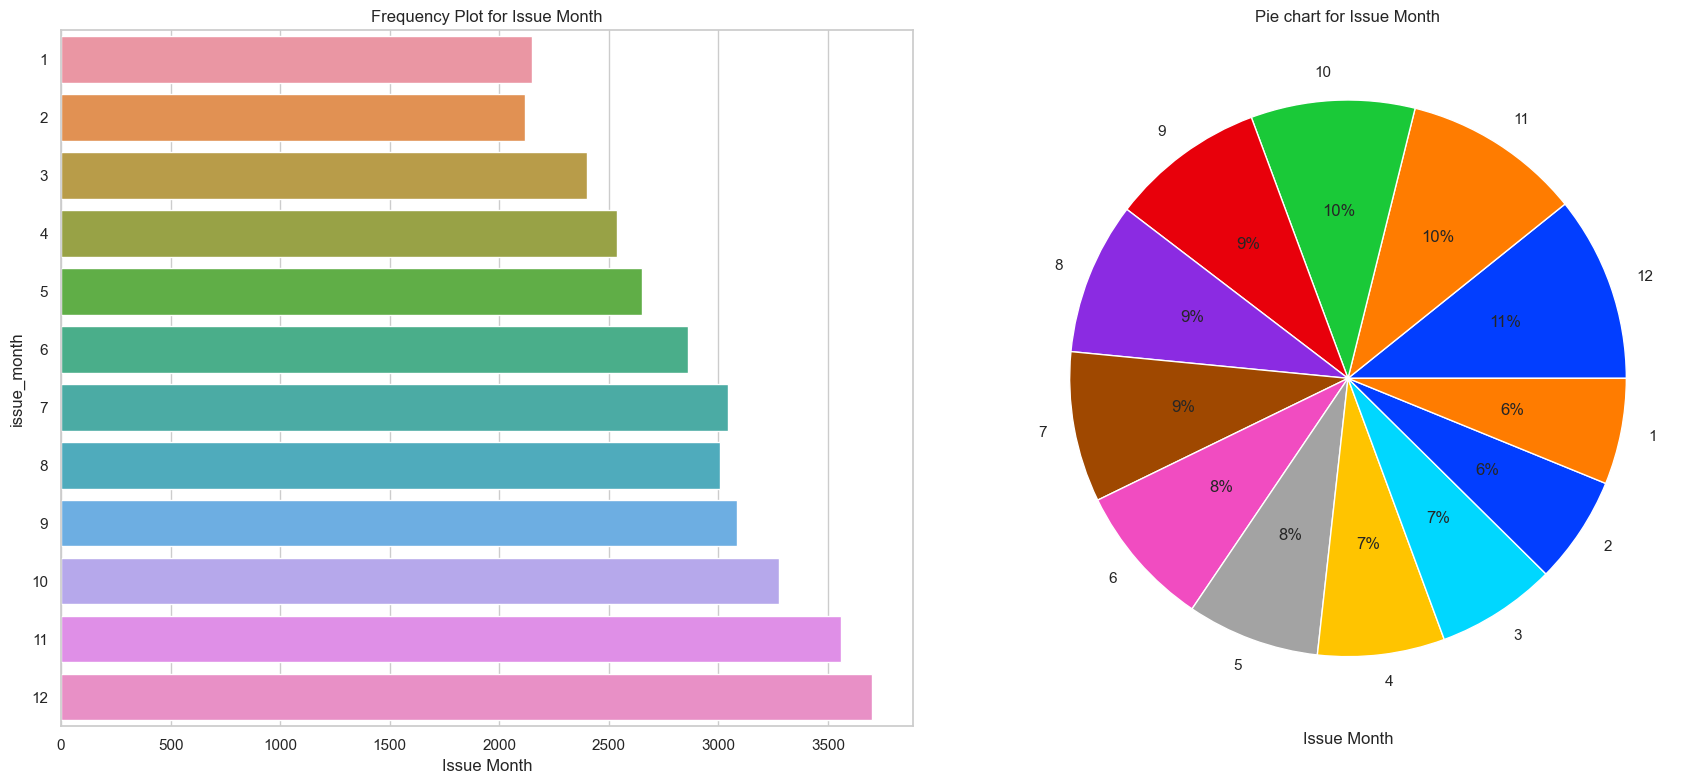

In [64]:
categorical_univariate(data_loan, 'issue_month')

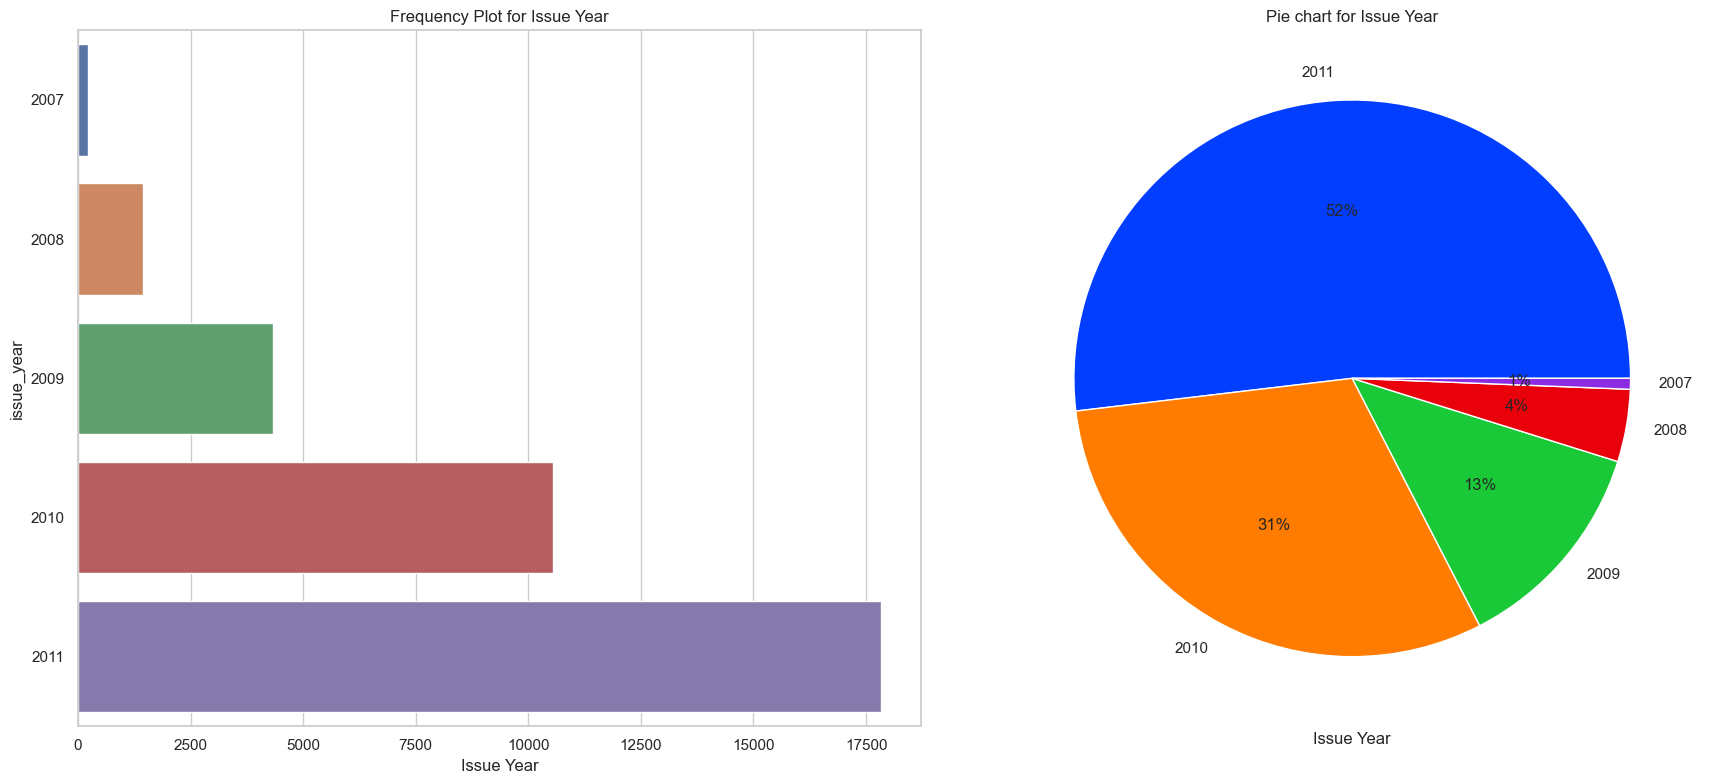

In [65]:
categorical_univariate(data_loan, 'issue_year')

## Univariate Analysis Summary

- The number of defaulted loan is 7 times less than the number of fully paid loan.
- The majority of loan has a term of 36 months compared to 60 months.
- The interest rate is more crowded around 5-10 and 10-15 with a drop near 10.
- A large amoutn of loans are with grade 'A' and 'B' commpared to rest showing most loans are high grade loans.
- Majority of borrowsers have working experience greater than 10 years.
- Majority of borrowsers don't posses property and are on mortage or rent.
- About 50% of the borrowers are verified by the company or have source verified.
- Annual Income shows left skewed normal distribution thus we can say that the majorityof borrowers have very low annual income compared to rest.
- A large percentage of loans are taken for debt consolidation followed by credit card.
- Majority of the borrowers are from the large urban cities like california, new york, texas, florida etc.
- Majority of the borrowers have very large debt compared to the income registerd, concentrated in the 10-15 DTI ratio.
- Majority of the borrowers have no record of Public Recorded Bankruptcy.
- Majority of the loans are given in last quarter of the year.
- The number of loans approved increases with the time at expontential rate, thus we can say that the loan approval rate is increasing with the time.
- No. of loans, fully paid and charged off are increasing every year. They are at maximum in the year 2011. This is a very positive trend for Lending Club as the requirement of loans are increasing by each year.
- The month-wise trend shows that most loans are fully paid as well as charged off as the year comes to an end, maximum in the month of December clearly stating the importance of year-end.
- Around 90% borrower's are having no public derogatory records.
- 99% people have not went bankrupt.
- The lending club(LC) has doubling loan issues every year.
- There are more issues of loan in last 3 months every end of the ear i.e., Oct, Nov and Dec.
- Most of the borrowers are from CA, FL and NY

# Segmented Univariate Analysis

In [66]:
# customized function for analysis of loan status with categorical variables
def loan_status_analysis(df, column_name):
    # creating frequency plot
    splot = sns.countplot(df[column_name], hue=df['loan_status'])
    # rotating xtik labels by 90 degrees
    splot.set_xticklabels(splot.get_xticklabels(), rotation=90)
    # setting title and xlabels
    splot.set_xlabel(column_titles[column_name])
    splot.set_title(''+ column_name + ' - loan_status')
    plt.show()

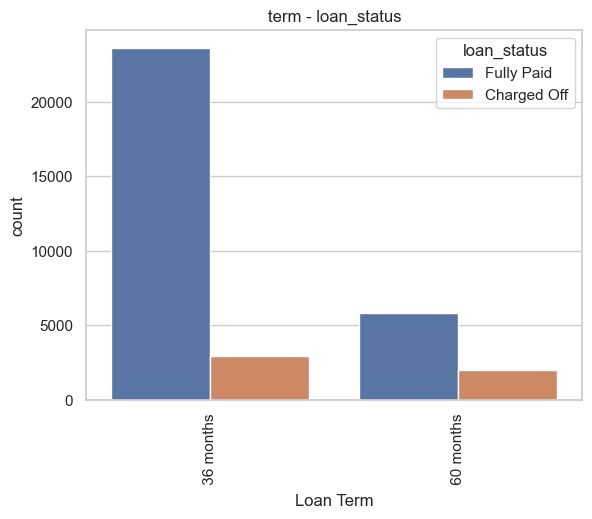

In [67]:
loan_status_analysis(data_loan, 'term')

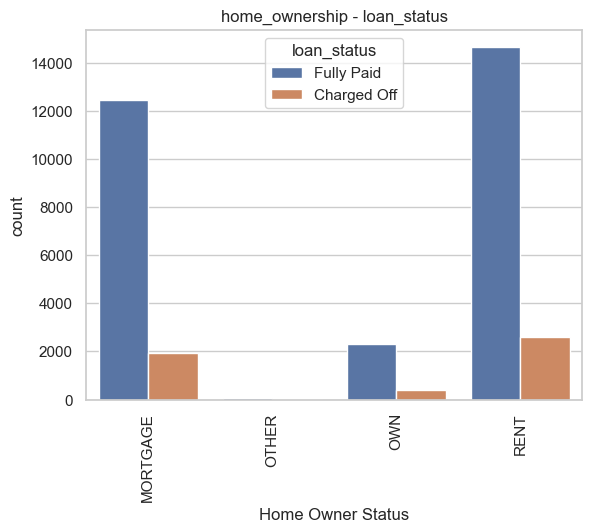

In [68]:
loan_status_analysis(data_loan, 'home_ownership')

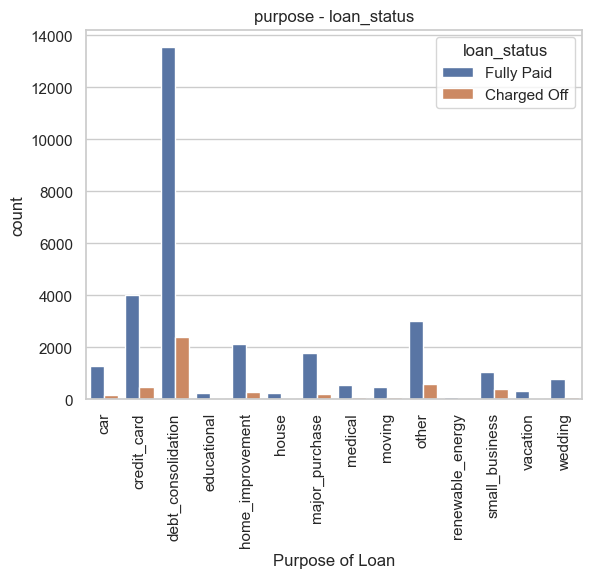

In [69]:
loan_status_analysis(data_loan, 'purpose')

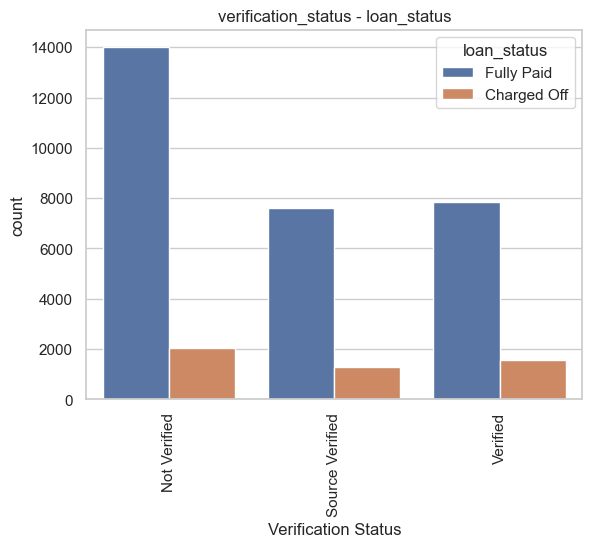

In [70]:
loan_status_analysis(data_loan, 'verification_status')

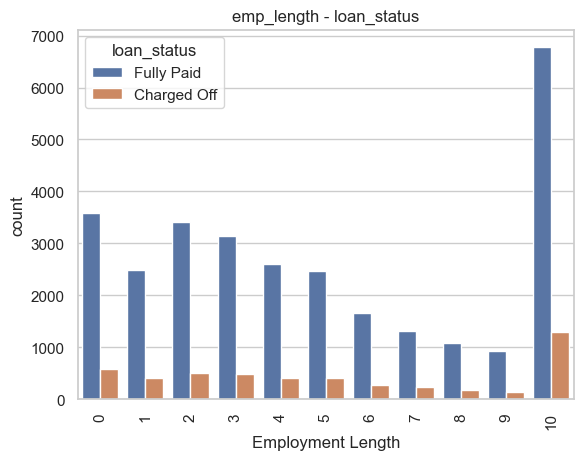

In [71]:
loan_status_analysis(data_loan, 'emp_length')

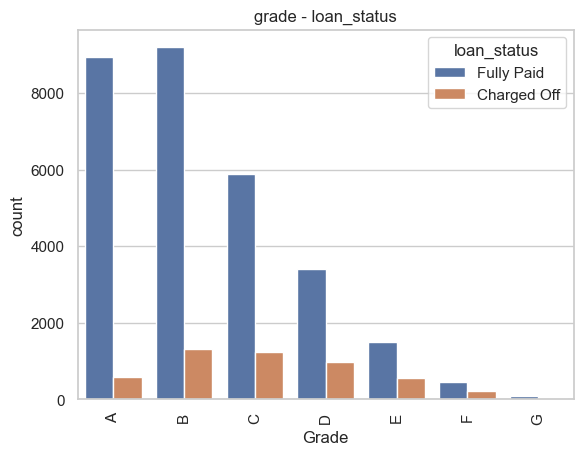

In [72]:
loan_status_analysis(data_loan, 'grade')

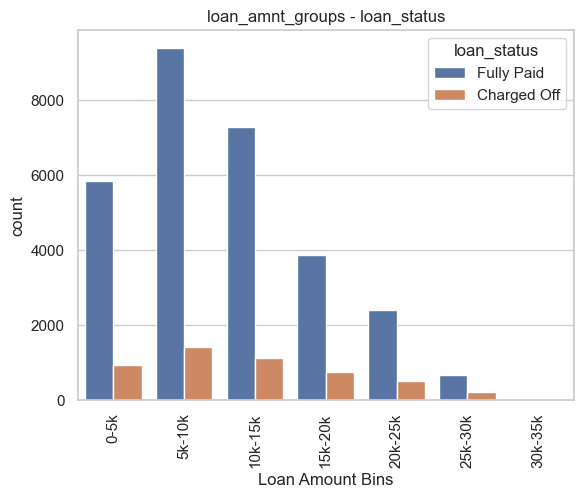

In [73]:
loan_status_analysis(data_loan, 'loan_amnt_groups')

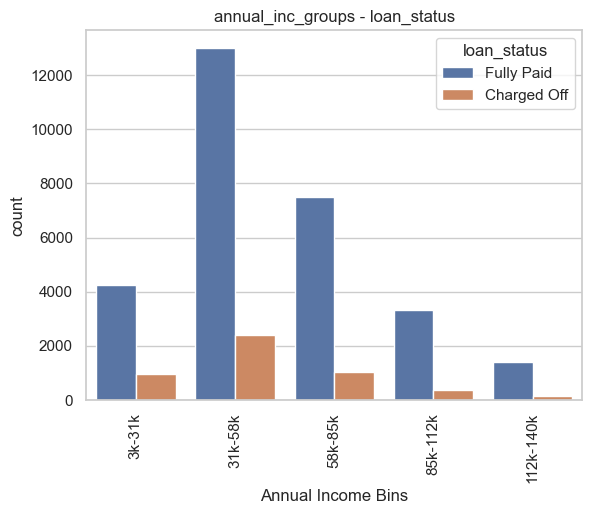

In [74]:
loan_status_analysis(data_loan, 'annual_inc_groups')

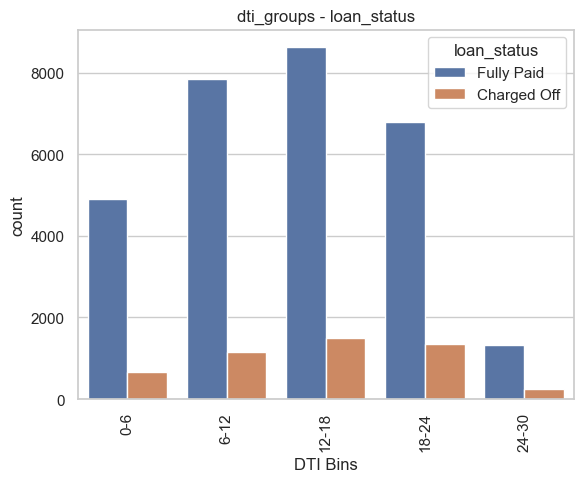

In [75]:
loan_status_analysis(data_loan, 'dti_groups')

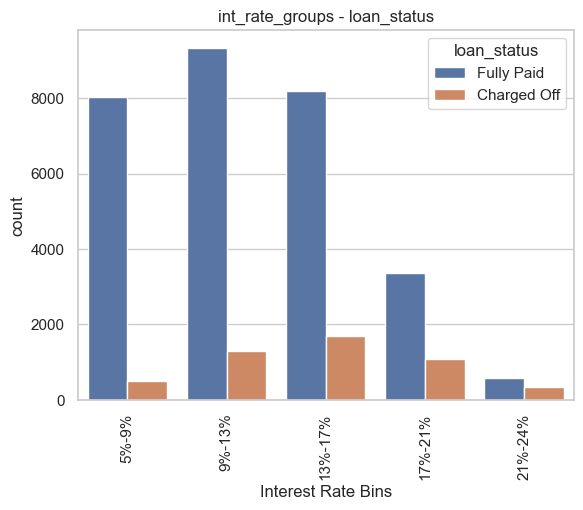

In [76]:
loan_status_analysis(data_loan, 'int_rate_groups')

In [77]:
# customized function for analysis of loan status with numerical variables
def loan_status_analysis_numerical(df, column_name):
    # creating frequency plot
    splot = sns.histplot(x=df[column_name], hue=df['loan_status'])
    # setting title and xlabels
    splot.set_xlabel(column_titles[column_name])
    splot.set_title(''+ column_name + ' - loan_status')
    plt.show()

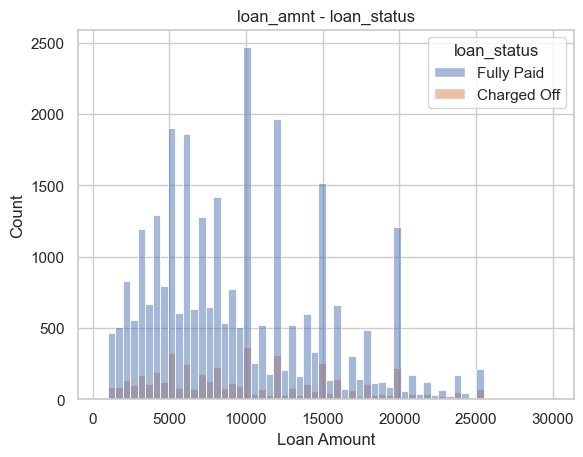

In [78]:
loan_status_analysis_numerical(data_loan, 'loan_amnt')

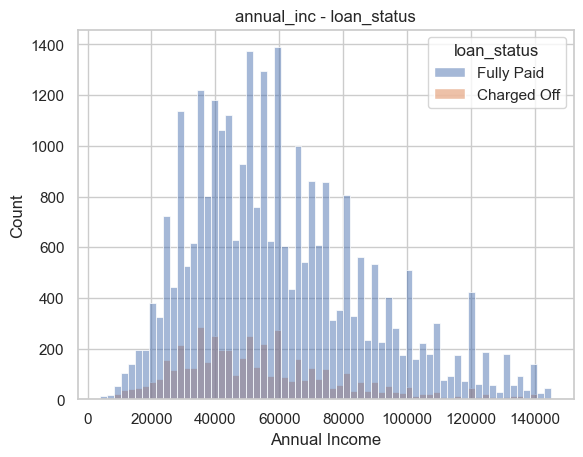

In [79]:
loan_status_analysis_numerical(data_loan, 'annual_inc')

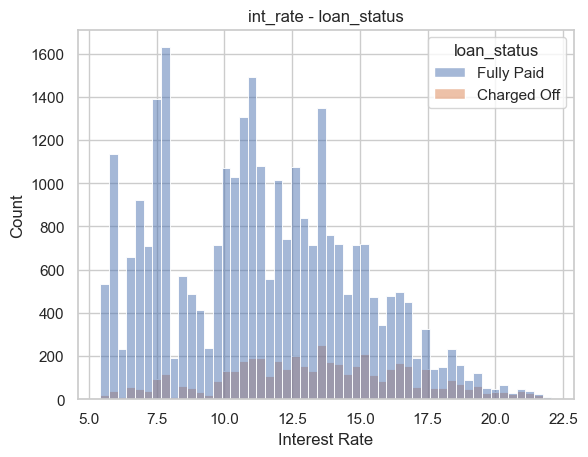

In [80]:
loan_status_analysis_numerical(data_loan, 'int_rate')

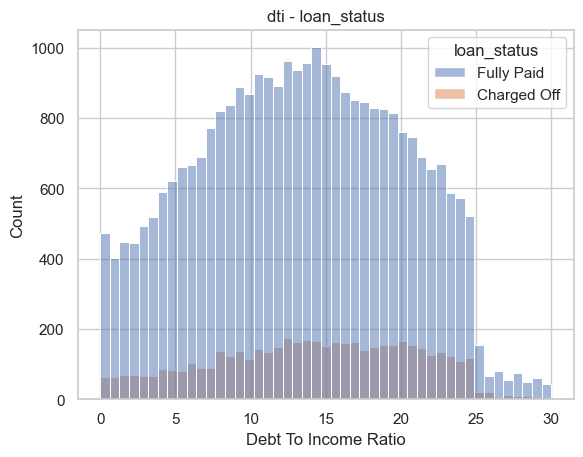

In [81]:
loan_status_analysis_numerical(data_loan, 'dti')

## Segmented Univariate Analysis Summary

- Debt Consolidation is the most popular loan purpose and has highest number of fully paid loan and defaulted loan.
- The mean and 25% are same for both but we see larger 75% in the defaulted loan which indicate large amount of loan has higher chance of defaulting.
- The 60 month term has higher chance of defaulting than 36 month term whereas the 36 month term has higher chance of fully paid loan.
- The loans in 36 month term majorily consist of grade A and B loans whereas the loans in 60 month term mostly consist of grade B, C and D loans.
- The Loan Status varies with DTI ratio, we can see that the loans in DTI ratio 10-15 have higher number of defaulted loan but higher dti has higher chance of defaulting.
- The Defaulted loan are lower for the borrowers which own their property compared to on mortgage or rent.
- Borrowers with less 50000 annual income are more likely to default and higher annual income are less likely to default.
- The Fully paid loan are increasing exponentially with the time compared to defaulted loan.
- The default loan amount increases with interest rate and shows are decline aftre 17.5 % interest rate.
- The Employees with 10+ years of experience are likely to default and have higher chance of fully paying the loan.
- Looks like there are more proportion of borrowers defaulted loan in 60 months term then 36 months. Also the Fully Paid rate is higher in 36 months tenure.

# Bivariate Analysis

In [82]:
def crosstab(df,column_name):
    # creating crosstab/pivot for a particular column with values divided on the basis of loan_status
    crosstab = pd.crosstab(df[column_name], df['loan_status'],margins=True)
    # calculating the percentage charged off wrt to total count
    crosstab['Percentage_Charged Off'] = round(((100*crosstab['Charged Off'])/crosstab['All']),3)
    crosstab = crosstab[0:-1]
    print(crosstab)
    return crosstab

In [83]:
# Probability of charge off
def bivariate_analysis(df,column_name,stacked=False):
    # get dataframe from crosstab function
    plotCrosstab = crosstab(df,column_name)
    # creating line plot for percentage charged off
    linePlot = plotCrosstab[['Percentage_Charged Off']]      
    # creating barplot for count of loans in different categories which will be available during function call
    barPlot =  plotCrosstab.iloc[:,0:2]
    # setting axes, titles and labels
    ax = linePlot.plot(figsize=(20,8), marker='o',color = 'black')
    ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=stacked)
    ax.set_title(df[column_name].name.title()+' vs Percentage Charged Off',fontsize=20,weight="bold")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
    ax.set_xlabel(column_titles[column_name],fontsize=14)
    ax.set_ylabel('Percentage of Charged off',color = 'b',fontsize=14)
    ax2.set_ylabel('Number of Loans',color = 'g',fontsize=14)
    ax2.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
    plt.show()

loan_status  Charged Off  Fully Paid    All  Percentage_Charged Off
term                                                               
 36 months          2950       23624  26574                   11.10
 60 months          1978        5835   7813                   25.32


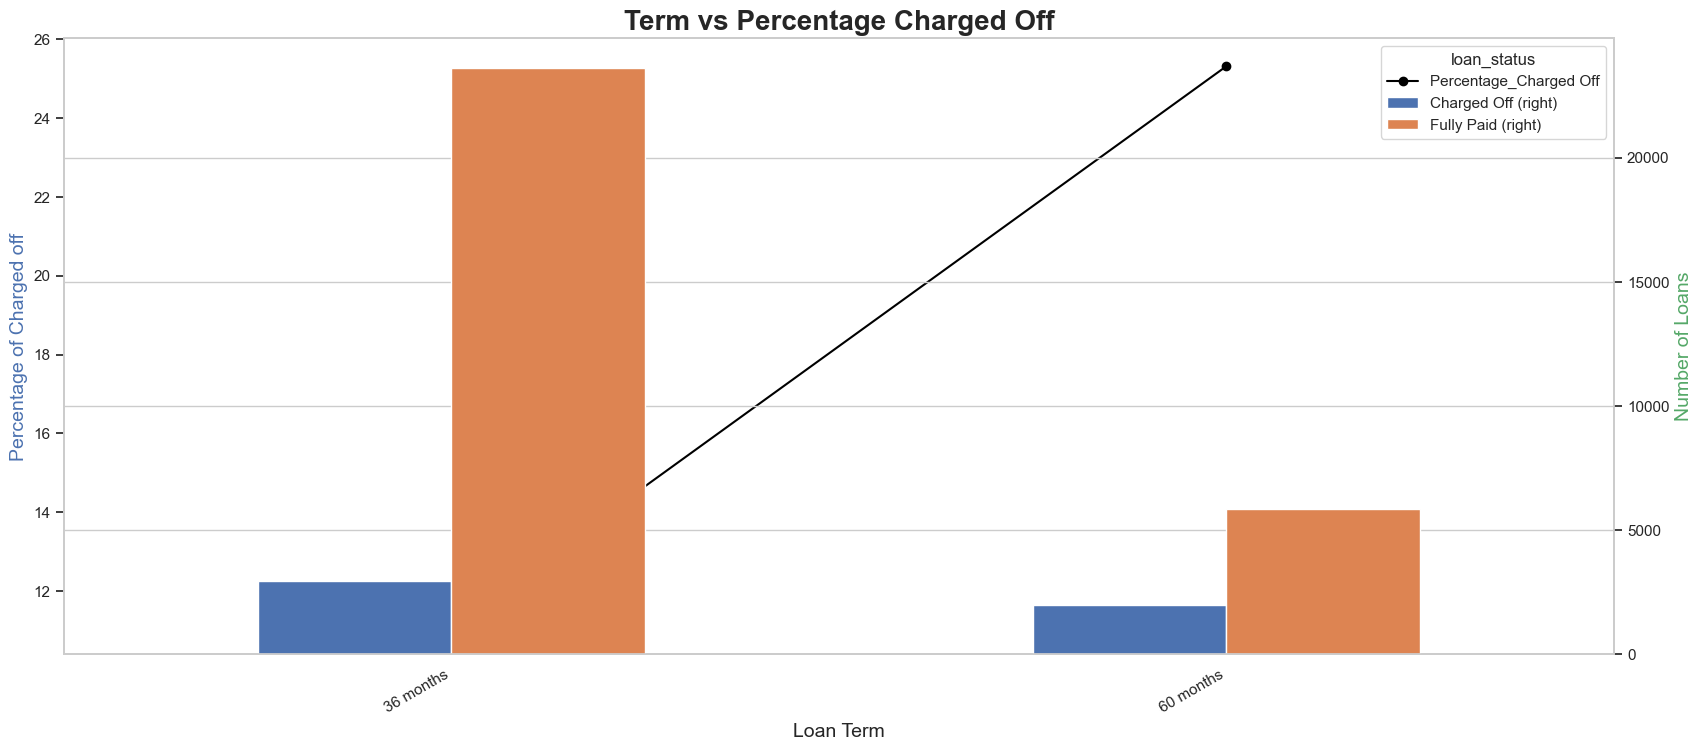

In [84]:
bivariate_analysis(data_loan, 'term')

loan_status     Charged Off  Fully Paid    All  Percentage_Charged Off
home_ownership                                                        
MORTGAGE               1913       12436  14349                   13.33
OTHER                    16          77     93                   17.20
OWN                     399        2310   2709                   14.73
RENT                   2600       14636  17236                   15.09


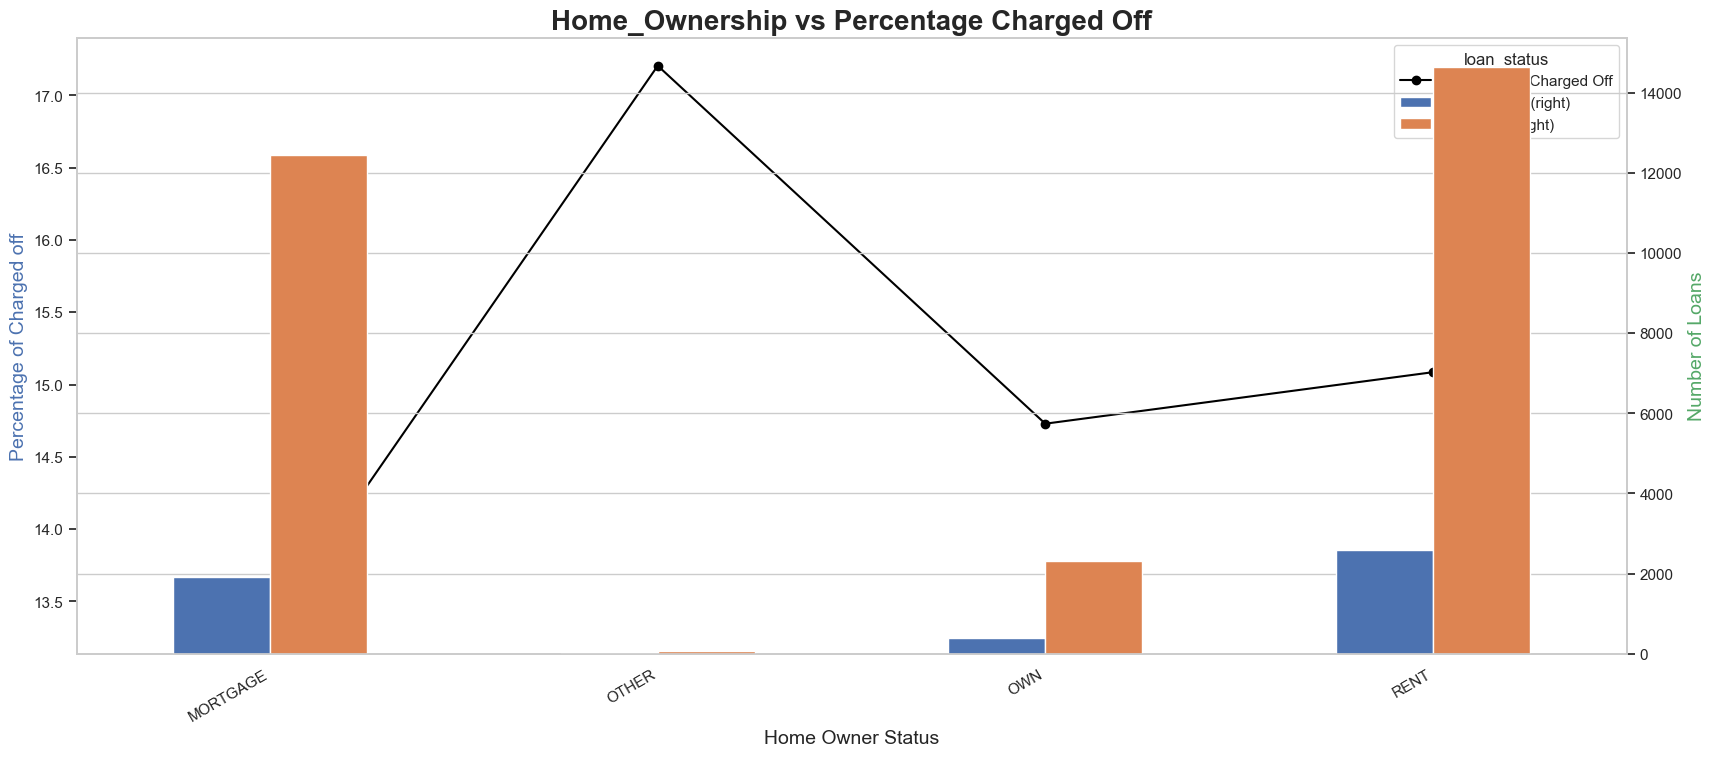

In [85]:
bivariate_analysis(data_loan, 'home_ownership')

loan_status          Charged Off  Fully Paid    All  Percentage_Charged Off
verification_status                                                        
Not Verified                2051       13998  16049                   12.78
Source Verified             1295        7600   8895                   14.56
Verified                    1582        7861   9443                   16.75


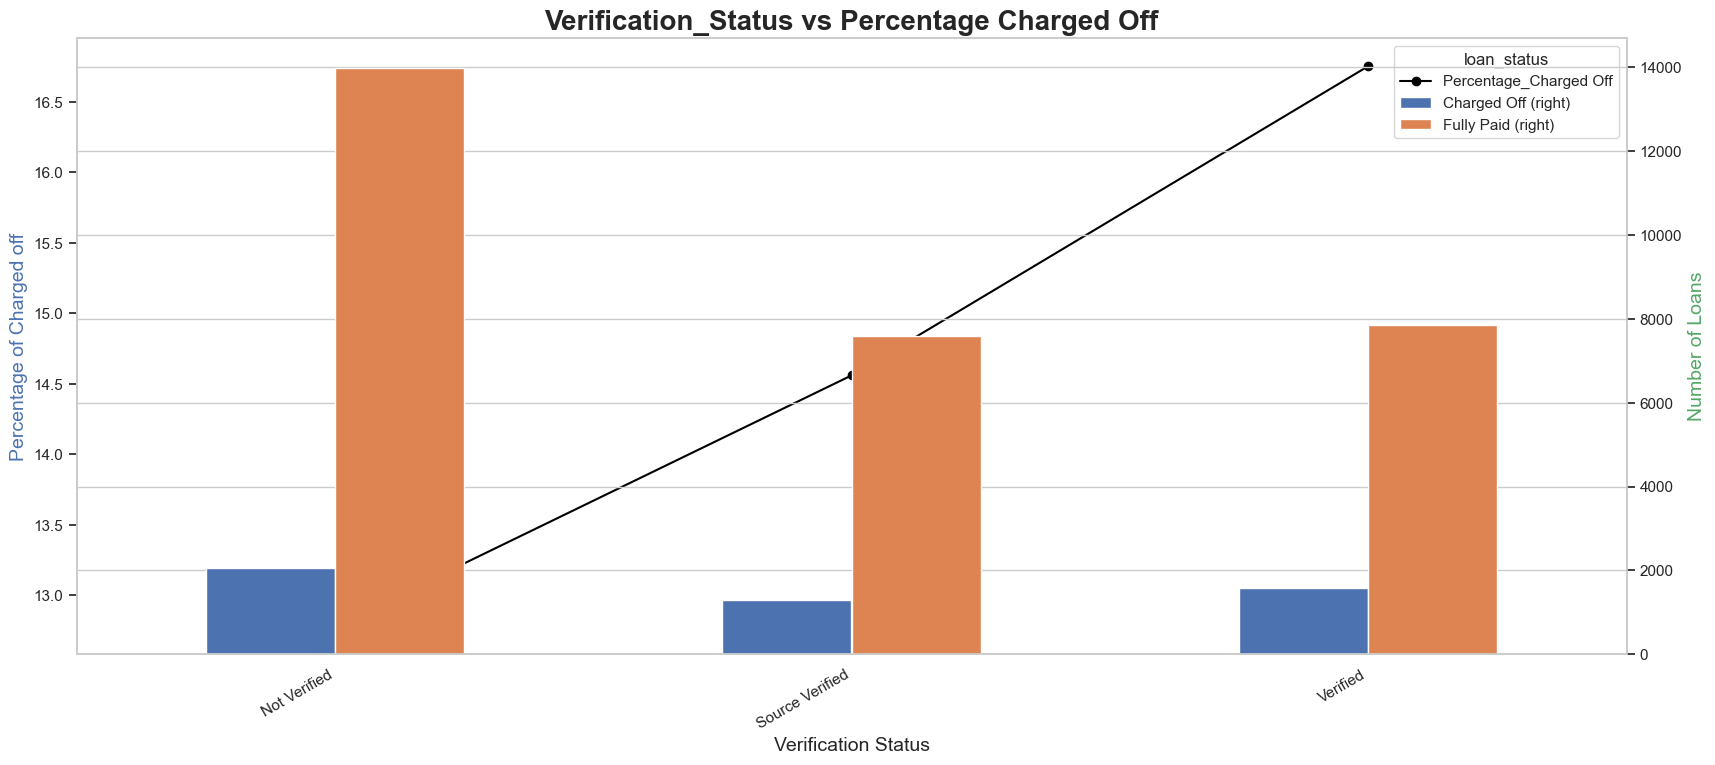

In [86]:
bivariate_analysis(data_loan, 'verification_status')

loan_status         Charged Off  Fully Paid    All  Percentage_Charged Off
purpose                                                                   
car                         156        1287   1443                   10.81
credit_card                 479        4019   4498                   10.65
debt_consolidation         2397       13539  15936                   15.04
educational                  52         254    306                   16.99
home_improvement            290        2109   2399                   12.09
house                        50         255    305                   16.39
major_purchase              209        1794   2003                   10.43
medical                     100         532    632                   15.82
moving                       88         453    541                   16.27
other                       575        3018   3593                   16.00
renewable_energy             17          74     91                   18.68
small_business           

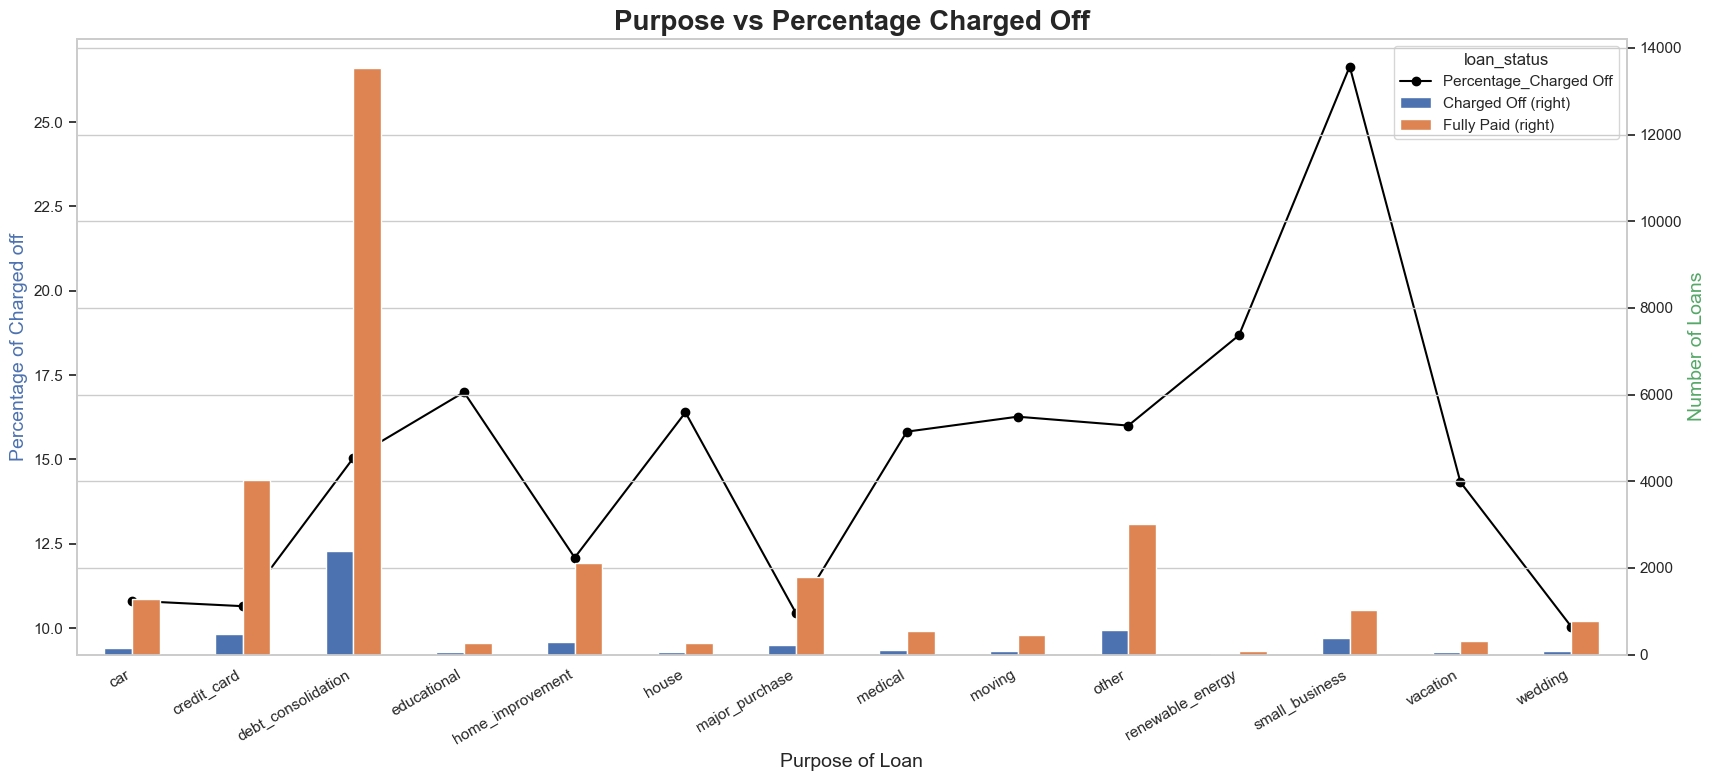

In [87]:
bivariate_analysis(data_loan, 'purpose')

loan_status  Charged Off  Fully Paid   All  Percentage_Charged Off
addr_state                                                        
AK                    11          54    65                   16.92
AL                    47         344   391                   12.02
AR                    25         193   218                   11.47
AZ                   109         660   769                   14.17
CA                   979        5174  6153                   15.91
CO                    87         607   694                   12.54
CT                    87         544   631                   13.79
DC                    11         165   176                    6.25
DE                    11          95   106                   10.38
FL                   442        2066  2508                   17.62
GA                   195        1012  1207                   16.16
HI                    28         121   149                   18.79
IA                     0           5     5                    

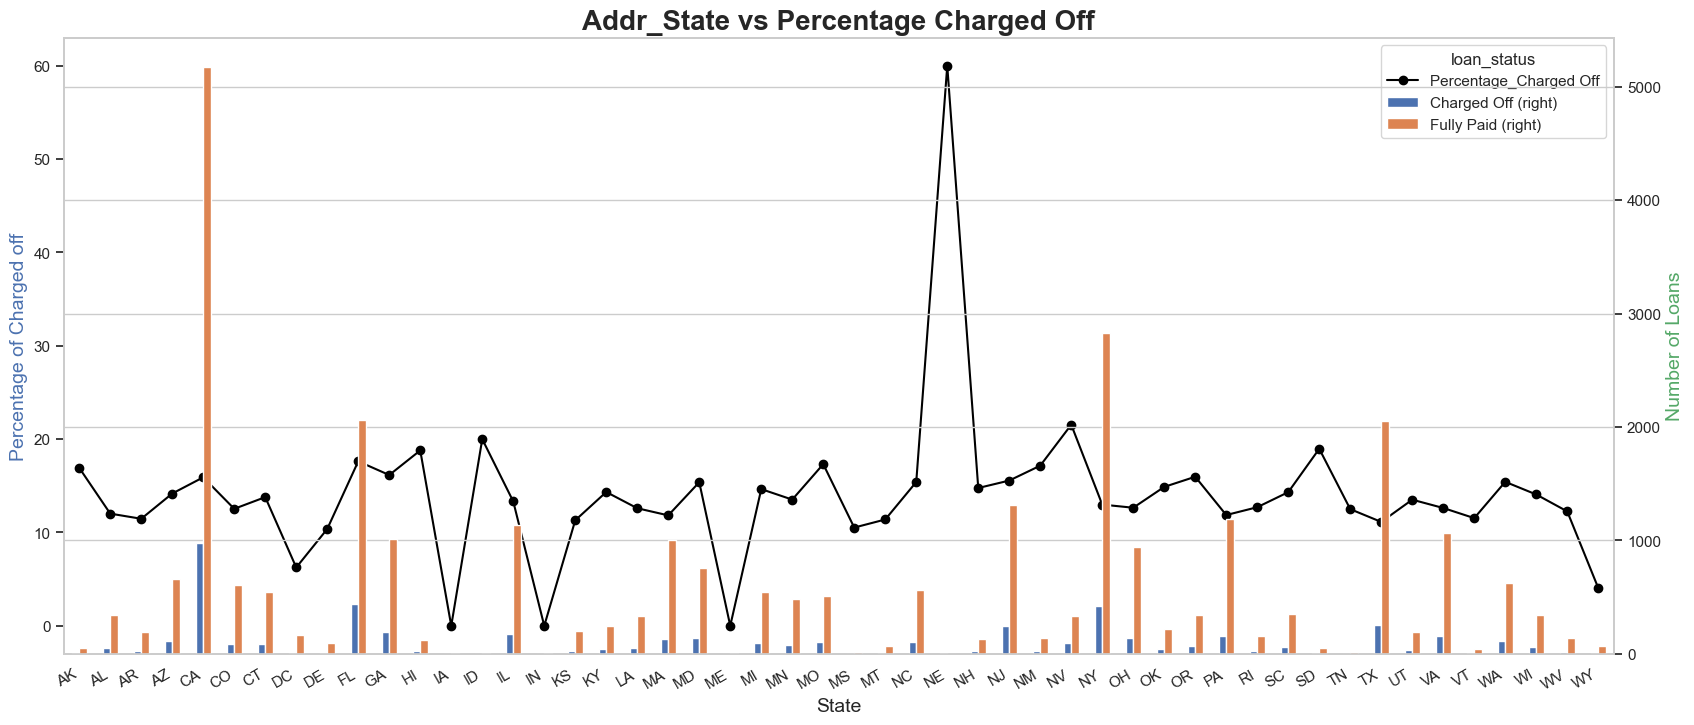

In [88]:
bivariate_analysis(data_loan, 'addr_state')

loan_status  Charged Off  Fully Paid   All  Percentage_Charged Off
emp_length                                                        
0                    579        3582  4161                   13.91
1                    417        2490  2907                   14.35
2                    512        3417  3929                   13.03
3                    491        3144  3635                   13.51
4                    406        2611  3017                   13.46
5                    404        2460  2864                   14.11
6                    271        1661  1932                   14.03
7                    235        1306  1541                   15.25
8                    174        1078  1252                   13.90
9                    138         933  1071                   12.88
10                  1301        6777  8078                   16.11


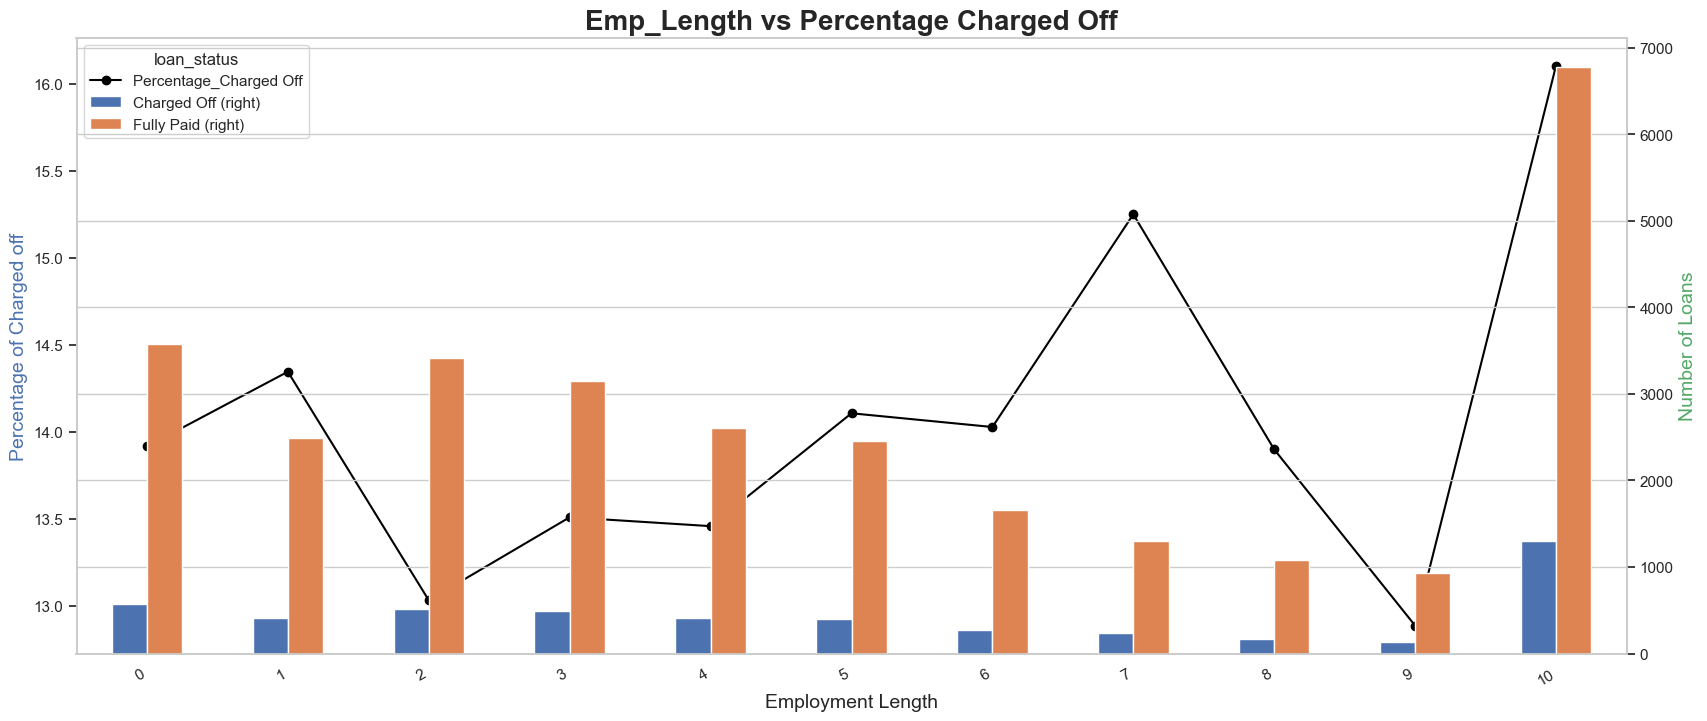

In [89]:
bivariate_analysis(data_loan, 'emp_length')

In [90]:
data_loan.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0       5000         5000         4,975.00   36 months     10.65       162.87   
1       2500         2500         2,500.00   60 months     15.27        59.83   
2       2400         2400         2,400.00   36 months     15.96        84.33   
3      10000        10000        10,000.00   36 months     13.49       339.31   
5       5000         5000         5,000.00   36 months      7.90       156.46   

  grade sub_grade  emp_length home_ownership  annual_inc verification_status  \
0     B        B2          10           RENT   24,000.00            Verified   
1     C        C4           0           RENT   30,000.00     Source Verified   
2     C        C5          10           RENT   12,252.00        Not Verified   
3     C        C1          10           RENT   49,200.00     Source Verified   
5     A        A4           3           RENT   36,000.00     Source Verified   

     issue_d  loan_status         purpose addr_state   dti  pub_rec  \
0 2011-12-01   Fully Paid     credit_card         AZ 27.65        0   
1 2011-12-01  Charged Off             car         GA  1.00        0   
2 2011-12-01   Fully Paid  small_business         IL  8.72        0   
3 2011-12-01   Fully Paid           other         CA 20.00        0   
5 2011-12-01   Fully Paid         wedding         AZ 11.20        0   

   pub_rec_bankruptcies  issue_year  issue_month annual_inc_groups  \
0                  0.00        2011           12            3k-31k   
1                  0.00        2011           12            3k-31k   
2                  0.00        2011           12            3k-31k   
3                  0.00        2011           12           31k-58k   
5                  0.00        2011           12           31k-58k   

  loan_amnt_groups dti_groups int_rate_groups installment_groups  
0           5k-10k      24-30          9%-13%            274-403  
1             0-5k        0-6         13%-17%             14-145  
2             0-5k       6-12         17%-21%             14-145  
3          10k-15k      18-24         13%-17%            531-660  
5           5k-10k       6-12           5%-9%            145-274

loan_status  Charged Off  Fully Paid    All  Percentage_Charged Off
grade                                                              
A                    586        8936   9522                    6.15
B                   1308        9197  10505                   12.45
C                   1248        5882   7130                   17.50
D                    982        3406   4388                   22.38
E                    551        1507   2058                   26.77
F                    210         453    663                   31.67
G                     43          78    121                   35.54


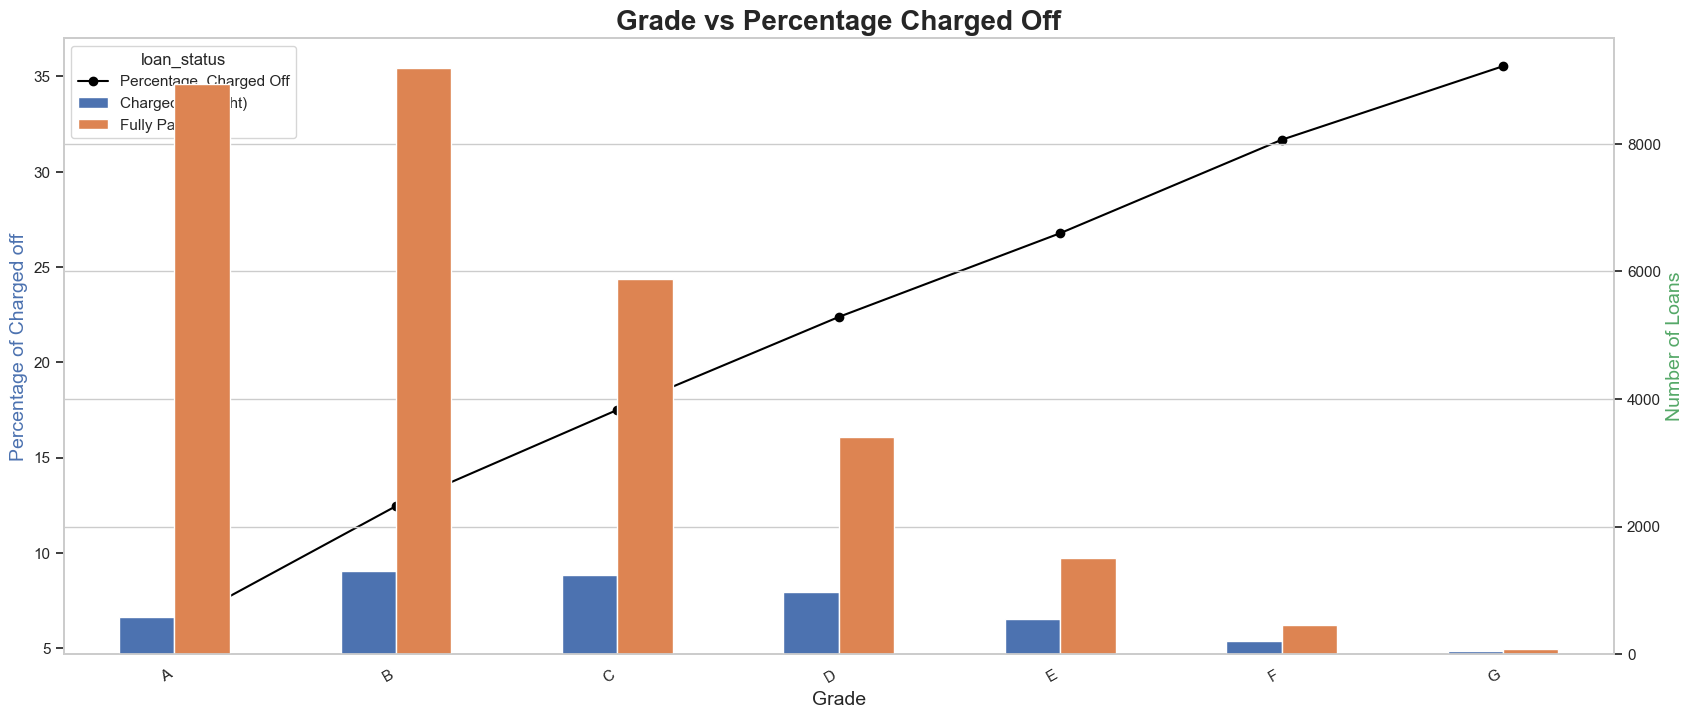

In [91]:
bivariate_analysis(data_loan, 'grade')

loan_status  Charged Off  Fully Paid   All  Percentage_Charged Off
sub_grade                                                         
A1                    30        1069  1099                    2.73
A2                    73        1368  1441                    5.07
A3                   101        1632  1733                    5.83
A4                   171        2510  2681                    6.38
A5                   211        2357  2568                    8.22
B1                   165        1511  1676                    9.85
B2                   212        1613  1825                   11.62
B3                   304        2173  2477                   12.27
B4                   301        1885  2186                   13.77
B5                   326        2015  2341                   13.93
C1                   304        1553  1857                   16.37
C2                   295        1445  1740                   16.95
C3                   253        1115  1368                   1

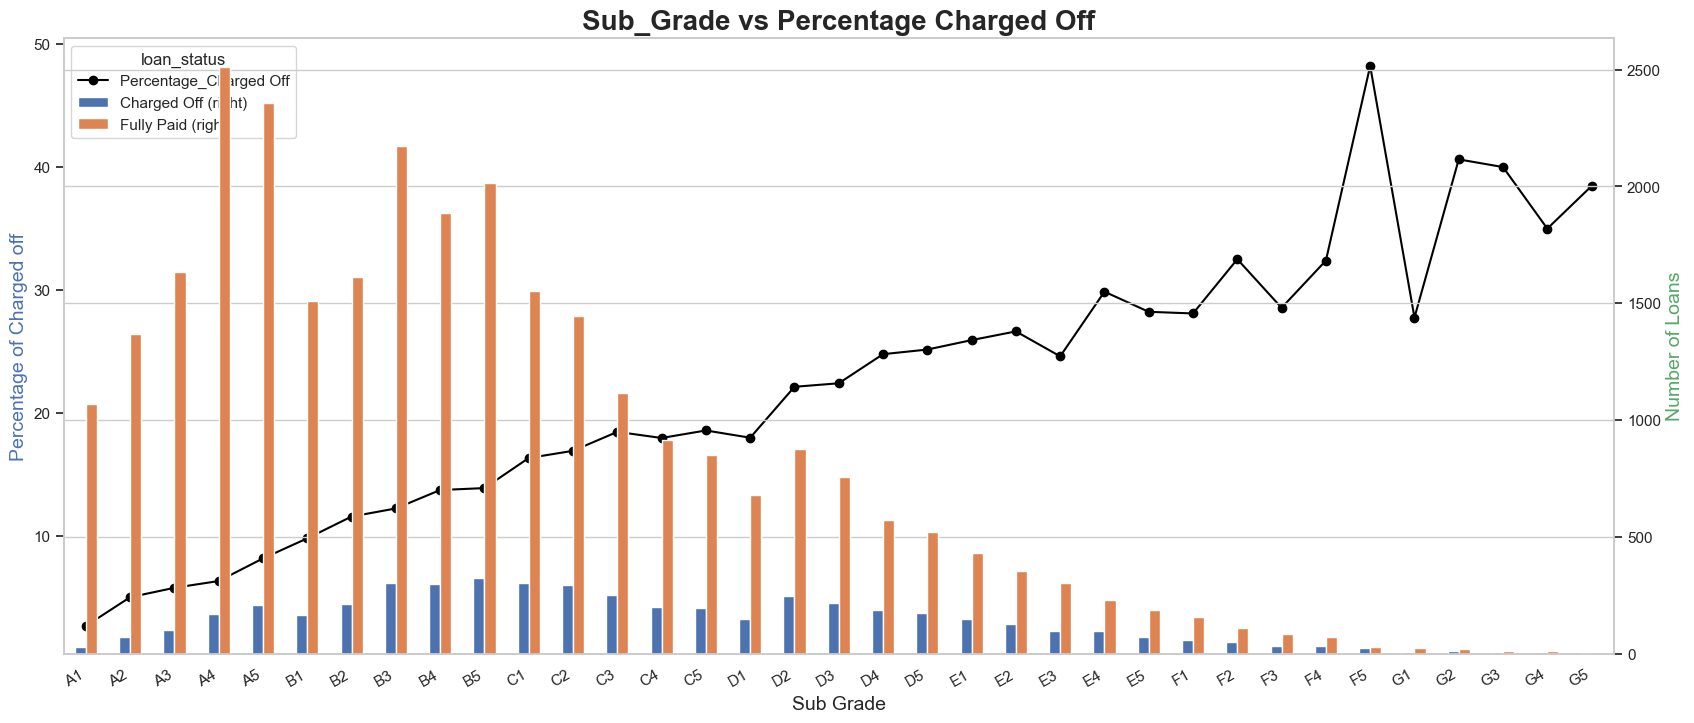

In [92]:
bivariate_analysis(data_loan, 'sub_grade')

loan_status  Charged Off  Fully Paid   All  Percentage_Charged Off
issue_month                                                       
1                    290        1857  2147                   13.51
2                    261        1858  2119                   12.32
3                    299        2099  2398                   12.47
4                    322        2215  2537                   12.69
5                    419        2232  2651                   15.80
6                    427        2436  2863                   14.91
7                    423        2621  3044                   13.90
8                    411        2594  3005                   13.68
9                    490        2595  3085                   15.88
10                   488        2787  3275                   14.90
11                   514        3046  3560                   14.44
12                   584        3119  3703                   15.77


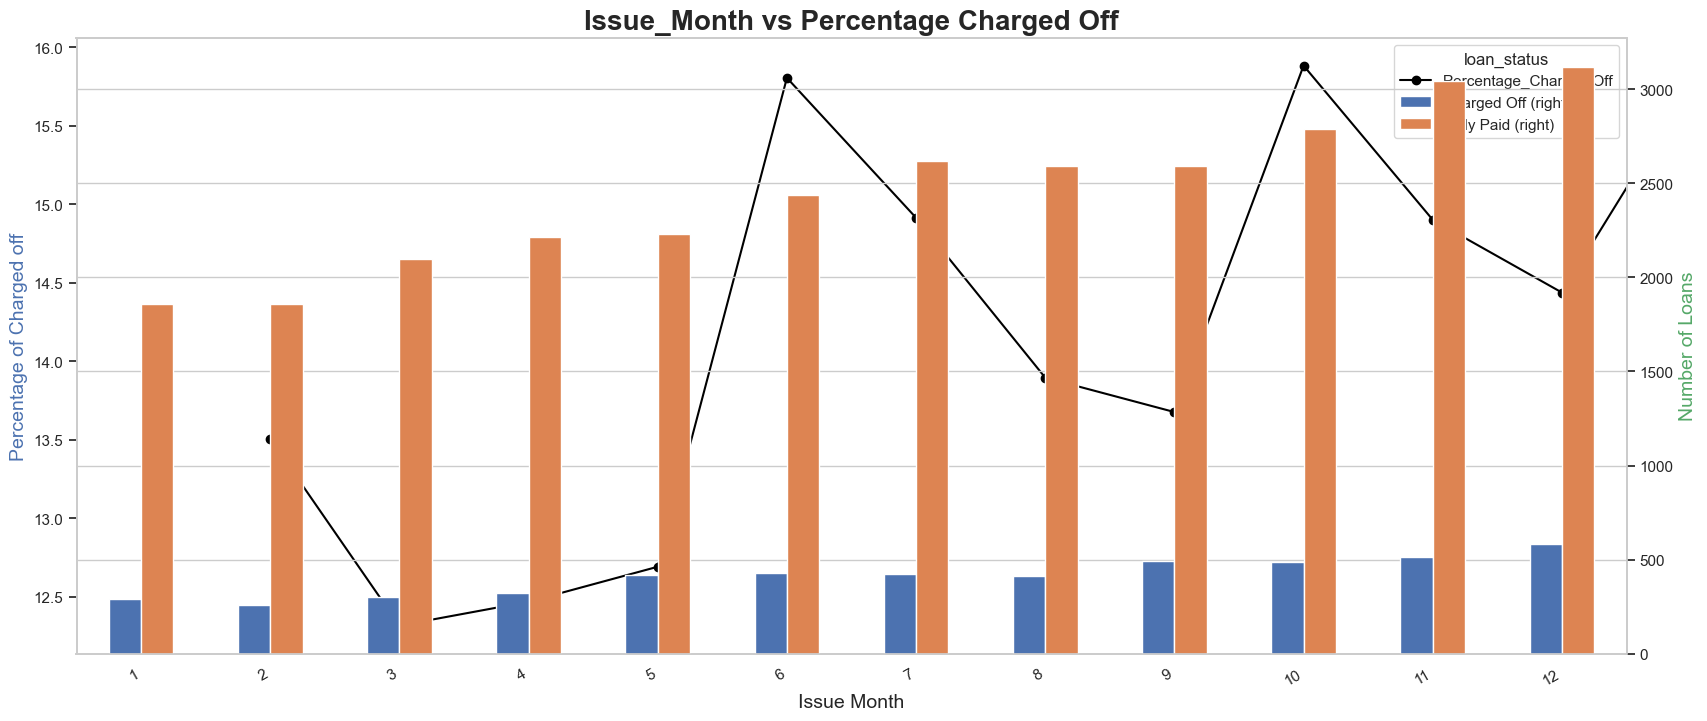

In [93]:
bivariate_analysis(data_loan, 'issue_month')

loan_status  Charged Off  Fully Paid    All  Percentage_Charged Off
issue_year                                                         
2007                  35         181    216                   16.20
2008                 220        1226   1446                   15.21
2009                 535        3794   4329                   12.36
2010                1373        9184  10557                   13.01
2011                2765       15074  17839                   15.50


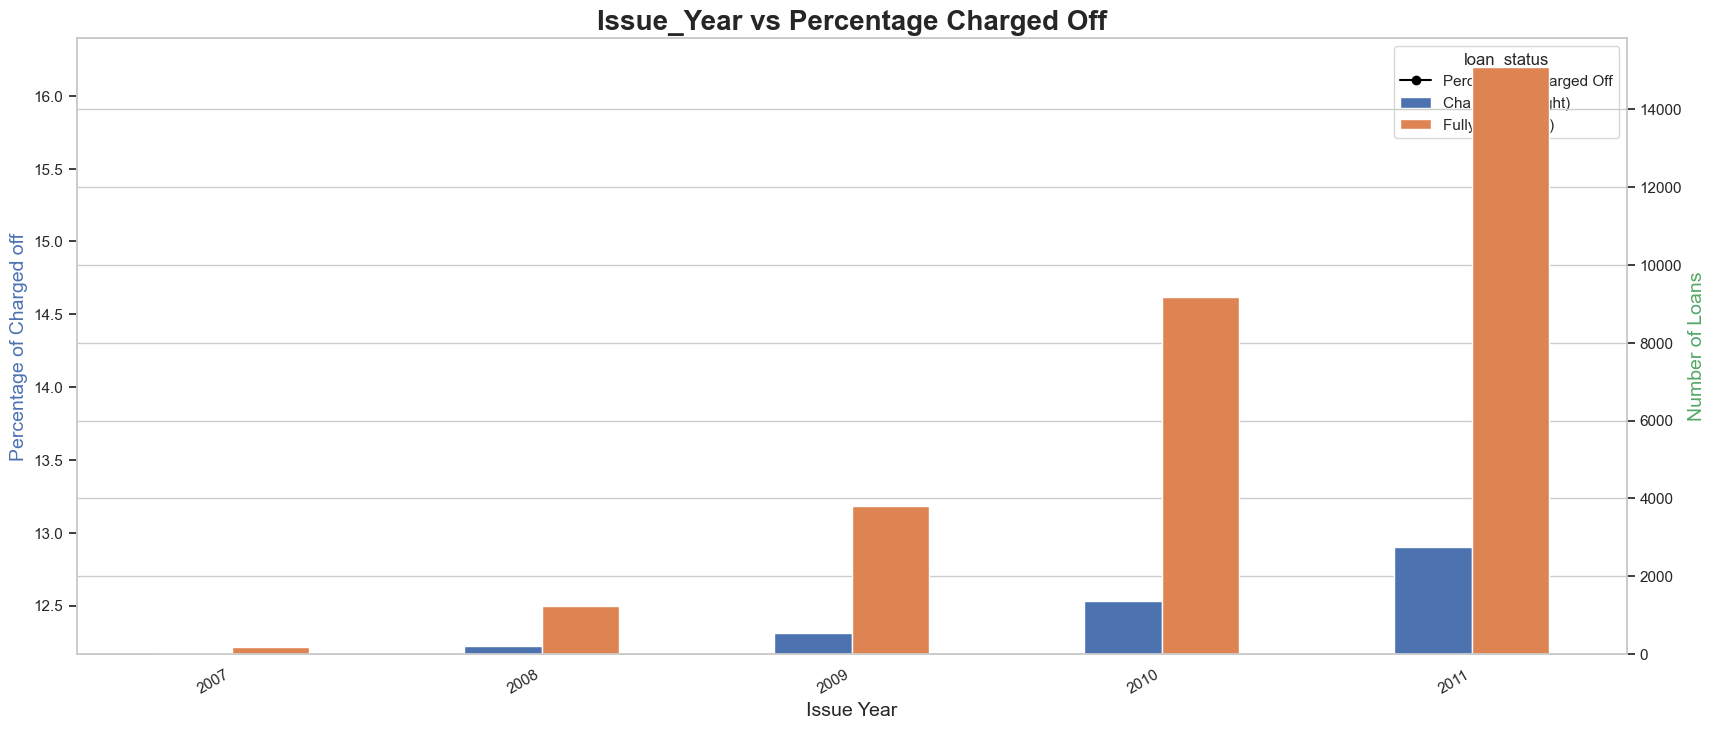

In [94]:
bivariate_analysis(data_loan, 'issue_year')

loan_status       Charged Off  Fully Paid    All  Percentage_Charged Off
loan_amnt_groups                                                        
0-5k                      935        5845   6780                   13.79
5k-10k                   1418        9392  10810                   13.12
10k-15k                  1107        7269   8376                   13.22
15k-20k                   731        3859   4590                   15.93
20k-25k                   502        2403   2905                   17.28
25k-30k                   218         662    880                   24.77
30k-35k                    17          29     46                   36.96


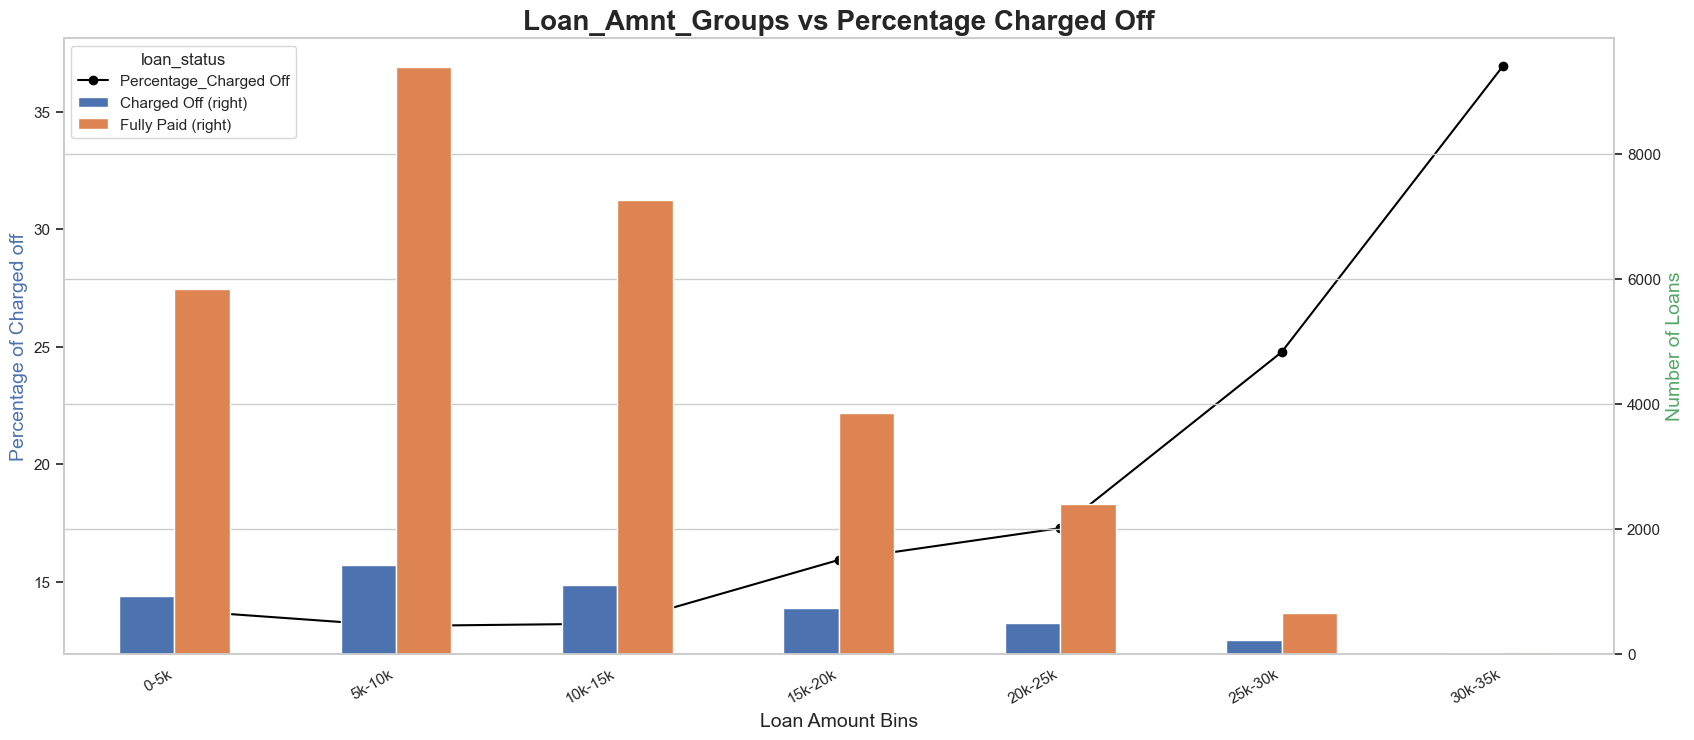

In [95]:
bivariate_analysis(data_loan, 'loan_amnt_groups')

loan_status        Charged Off  Fully Paid    All  Percentage_Charged Off
annual_inc_groups                                                        
3k-31k                     959        4243   5202                   18.43
31k-58k                   2413       12998  15411                   15.66
58k-85k                   1052        7501   8553                   12.30
85k-112k                   352        3326   3678                    9.57
112k-140k                  152        1391   1543                    9.85


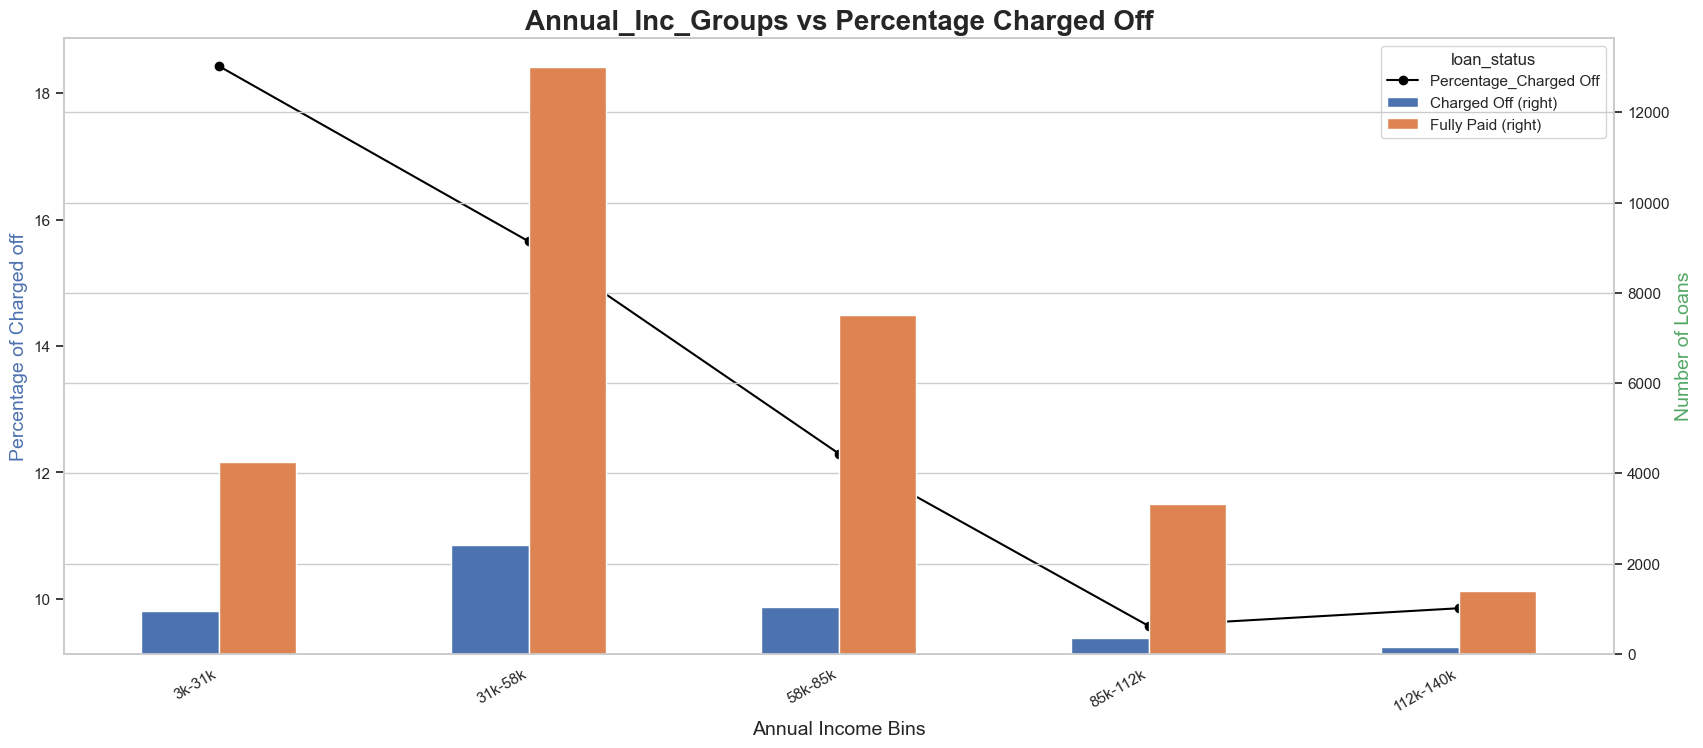

In [96]:
bivariate_analysis(data_loan, 'annual_inc_groups')

loan_status      Charged Off  Fully Paid    All  Percentage_Charged Off
int_rate_groups                                                        
5%-9%                    494        8021   8515                    5.80
9%-13%                  1294        9333  10627                   12.18
13%-17%                 1705        8183   9888                   17.24
17%-21%                 1092        3353   4445                   24.57
21%-24%                  343         569    912                   37.61


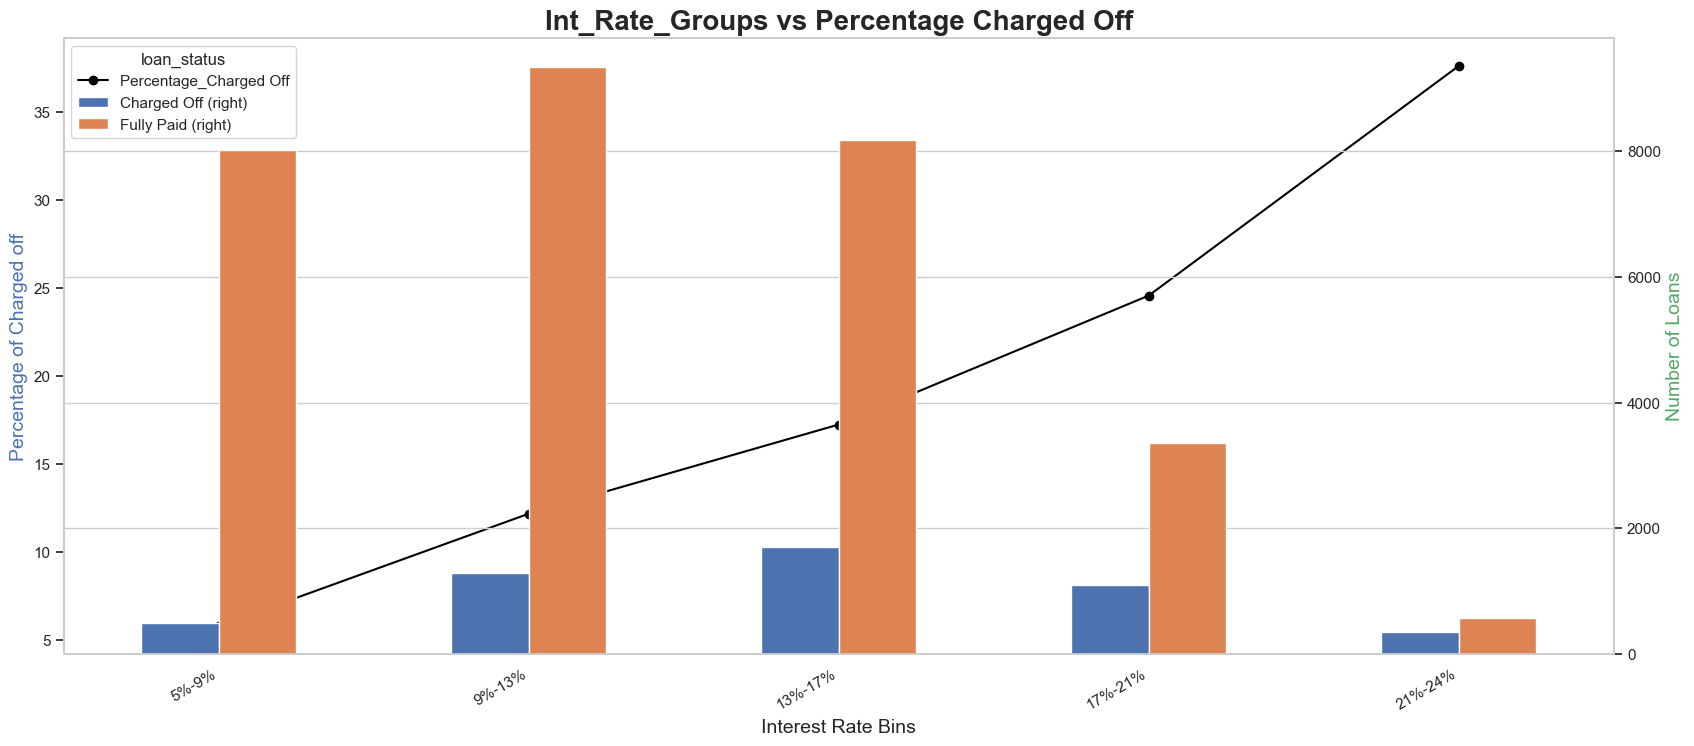

In [97]:
bivariate_analysis(data_loan, 'int_rate_groups')

loan_status  Charged Off  Fully Paid    All  Percentage_Charged Off
dti_groups                                                         
0-6                  673        4899   5572                   12.08
6-12                1161        7843   9004                   12.89
12-18               1497        8622  10119                   14.79
18-24               1358        6778   8136                   16.69
24-30                239        1317   1556                   15.36


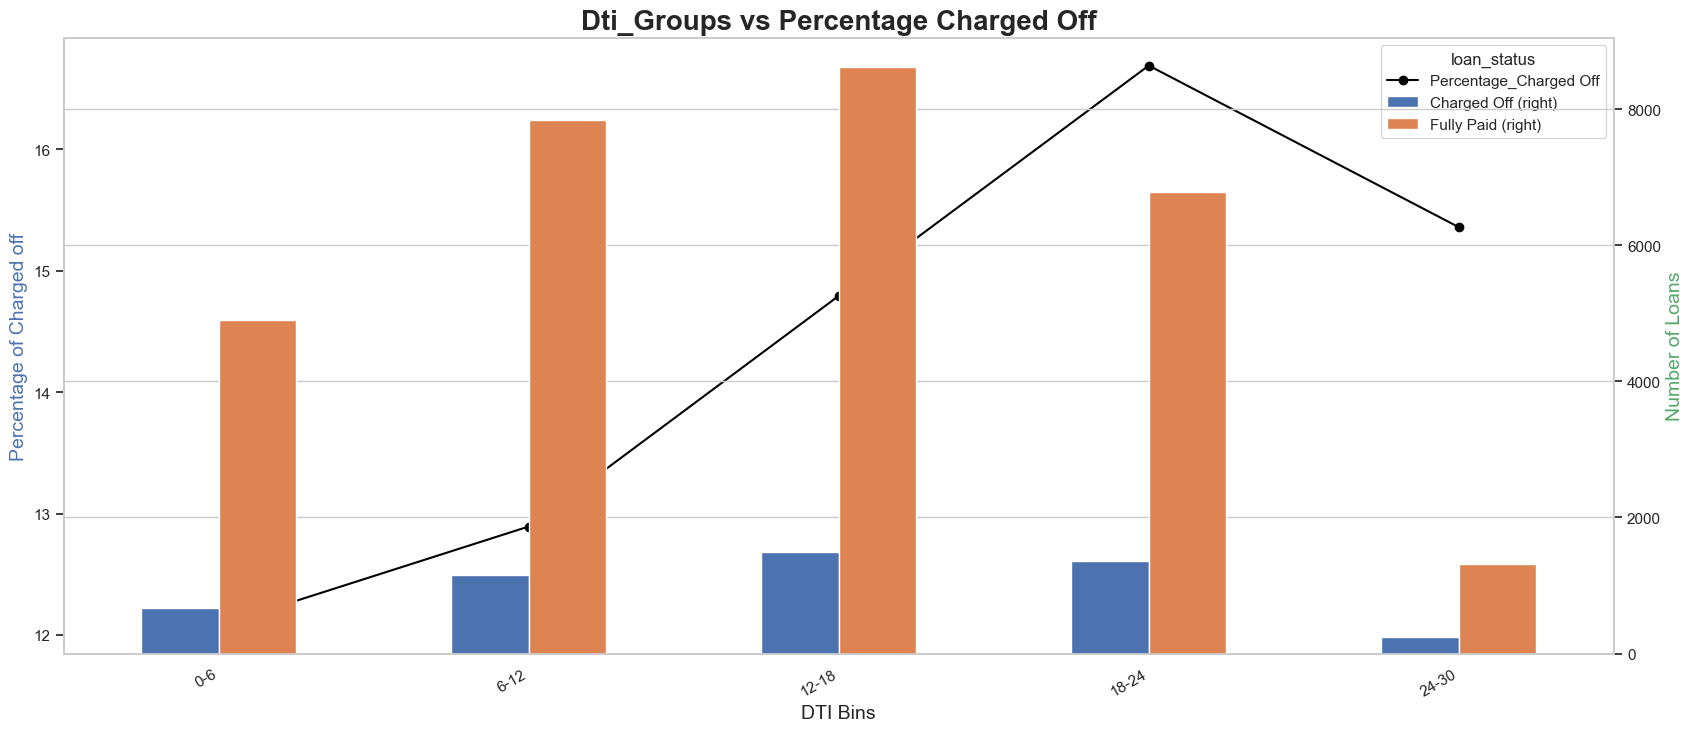

In [98]:
bivariate_analysis(data_loan, 'dti_groups')

Text(0.5, 1.0, 'Term vs Interest Rate')

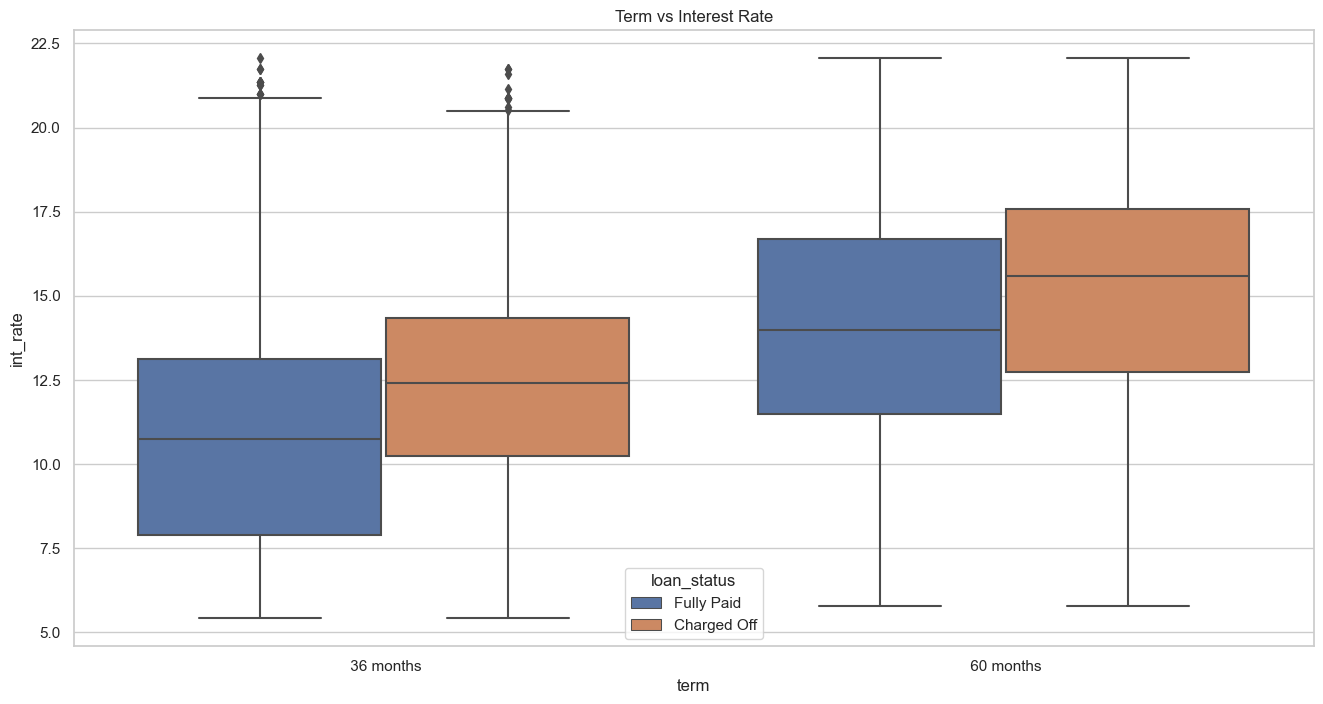

In [99]:
# initializing figure size
plt.figure(figsize=(16,8))
# creating boxplot for multiple variables and spliting them on the basis of loan status
sns.boxplot(x='term', y='int_rate', hue='loan_status', data=data_loan)
# setting title
plt.title('Term vs Interest Rate')

Text(0.5, 1.0, 'Home Ownership vs Annual Income')

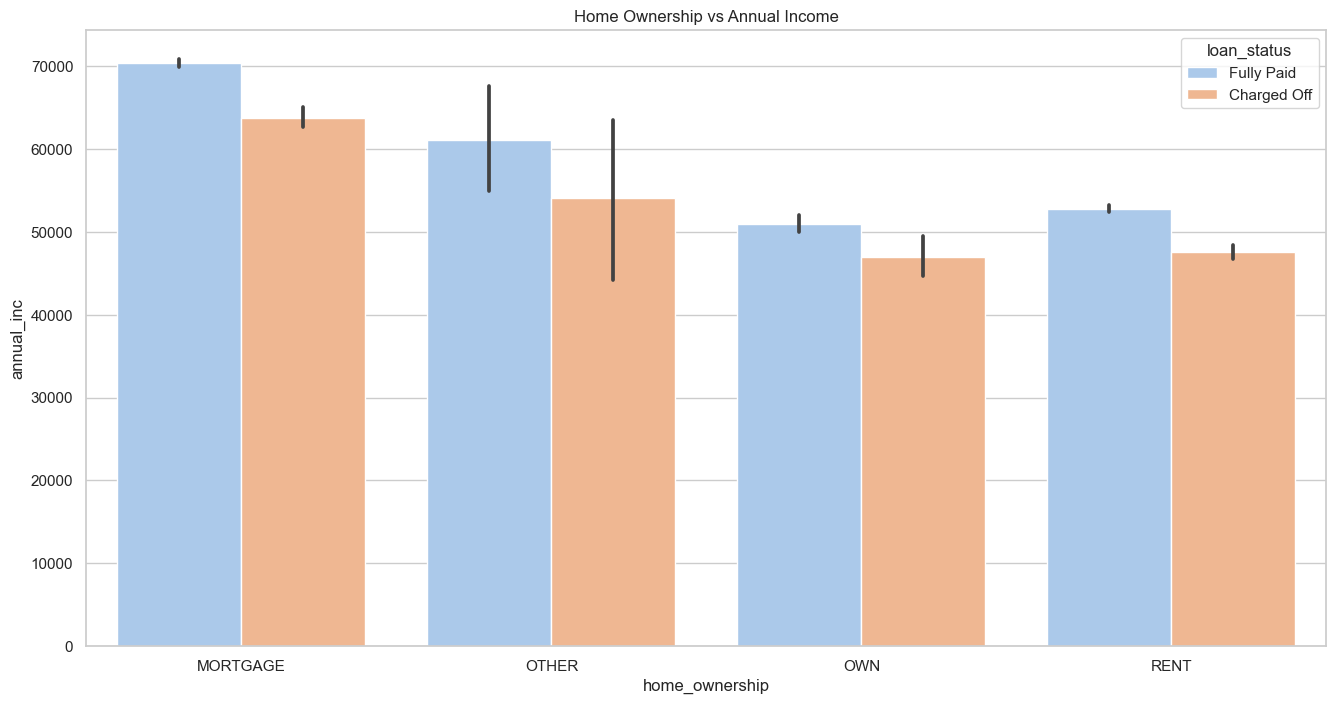

In [100]:
# initializing figure size
plt.figure(figsize=(16,8))
# creating barplot for multiple variables and spliting them on the basis of loan status
sns.barplot(data =data_loan,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
# setting title
plt.title('Home Ownership vs Annual Income')

Text(0.5, 1.0, 'Purpose vs Loan Amount')

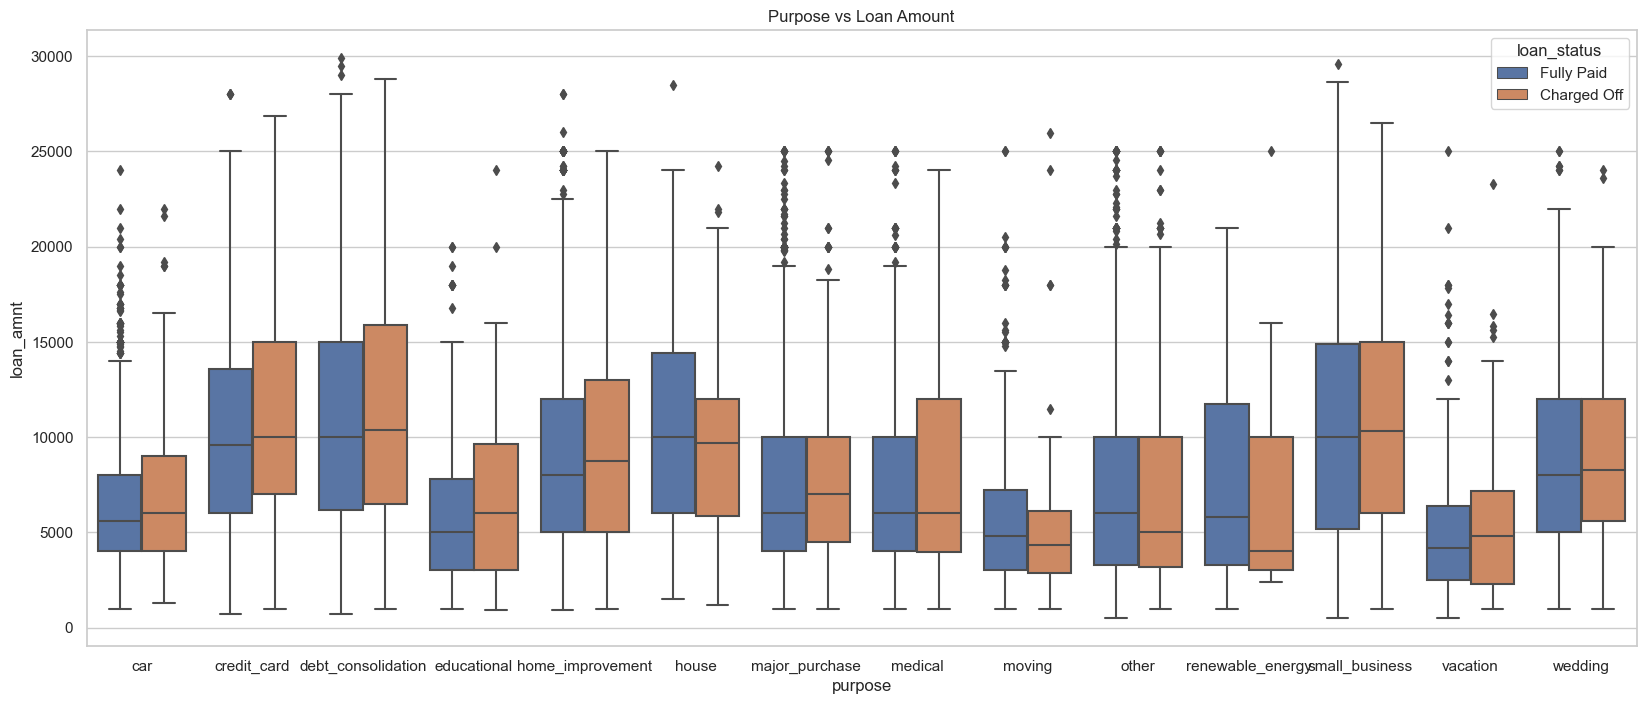

In [101]:
# initializing figure size
plt.figure(figsize=(20,8))
# creating boxplot for multiple variables and spliting them on the basis of loan status
sns.boxplot(x='purpose', y='loan_amnt', hue='loan_status', data=data_loan)
# setting title
plt.title('Purpose vs Loan Amount')

Text(0.5, 1.0, 'Issue Year vs Loan Amount')

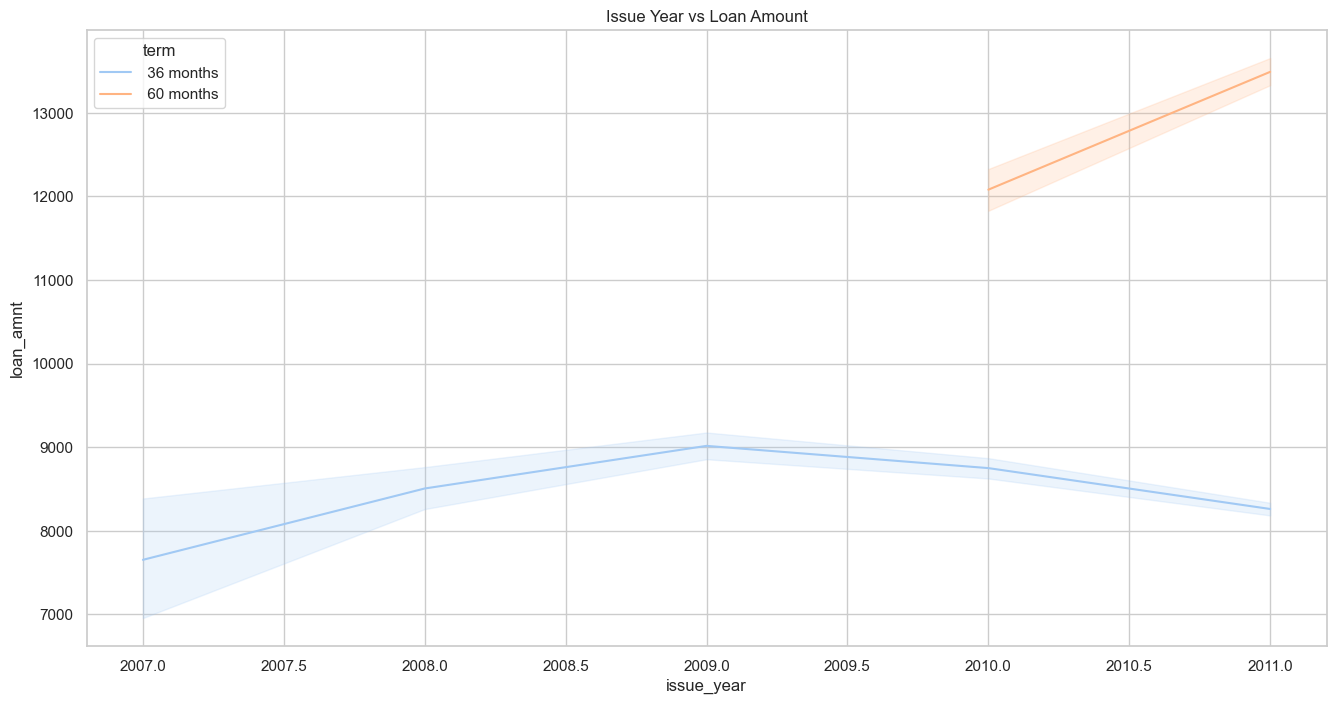

In [102]:
# initializing figure size
plt.figure(figsize=(16,8))
# creating lineplot for multiple variables and spliting them on the basis of term
sns.lineplot(data =data_loan,x='issue_year', y='loan_amnt', hue ='term',palette="pastel")
# setting title
plt.title('Issue Year vs Loan Amount')

- Avg Loan Amount is decreasing every year for charged off loans in 36 month term
- Avg Loan Amount is increasing every year for fully paid loans in 36 month term till 2010. It decreases slightly in 2011
- Avg Loan Amount is increasing for 60 month term for both fully paid and charged off loans.

Text(0.5, 1.0, 'Purpose vs Interest Rate')

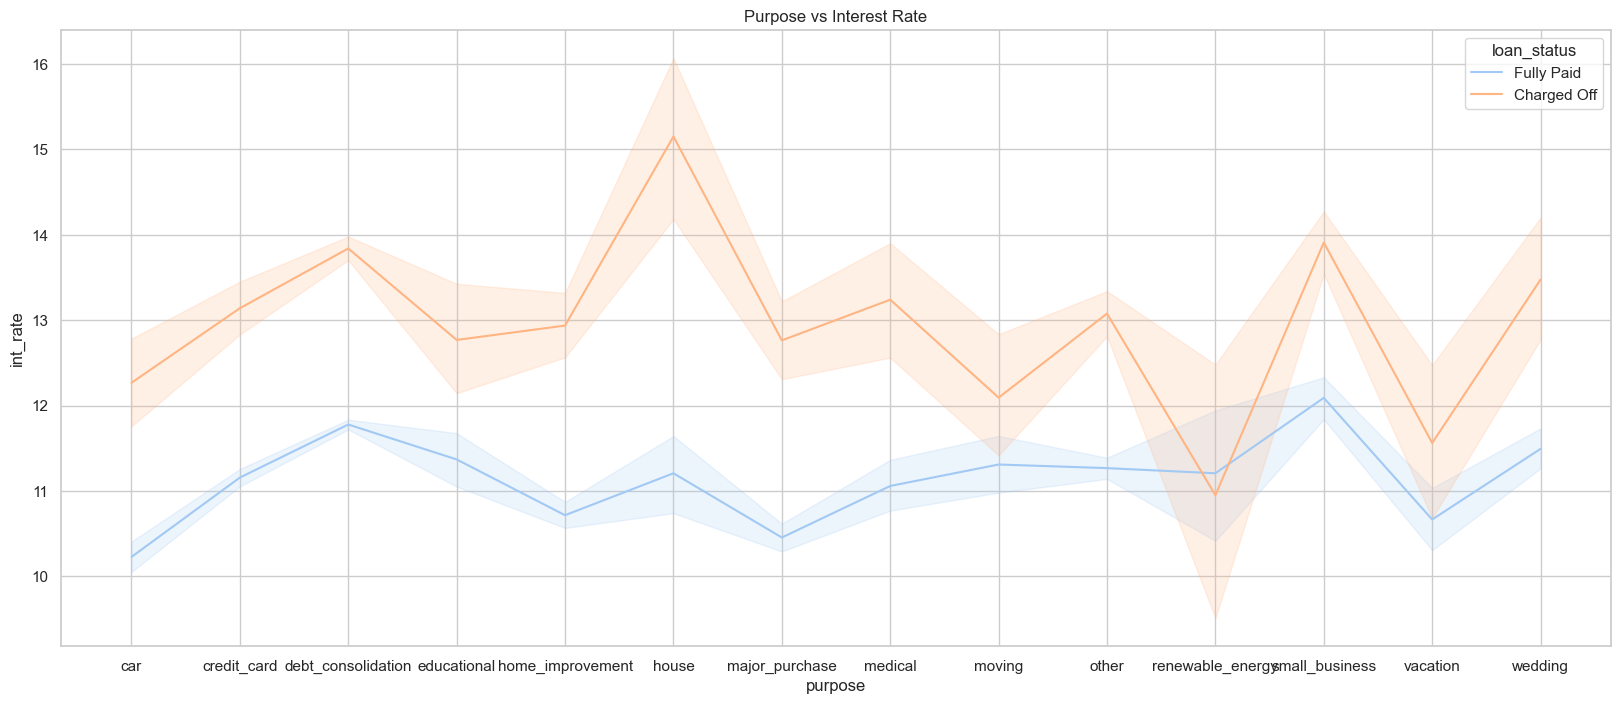

In [103]:
# initializing figure size
plt.figure(figsize=(20,8))
# creating lineplot for multiple variables and spliting them on the basis of loan status
sns.lineplot(data =data_loan,x='purpose', y='int_rate', hue ='loan_status',palette="pastel")
# setting title
plt.title('Purpose vs Interest Rate')

Interest Rate is higher for charged off loans across all purposes.

## Bivariate Analysis Summary

- The Grade represent risk factor thus we can say interst rate increases with the risk.
- The Grade A which is lowest risk also has lowest DTI ratio which we can say that higher grade has lower rate of default.
- The brrowers are mostly having no record of Public Recorded Bankruptcy and are safe choice for loan issue.
- Maximum no. of loans are applied by people from CA.
- Maximum no. of loans are charged off for people of NV.
- % of loans getting charged-off for 60 month term i.i. 25.2% is higher as compared to 36 month term i.e. 10.9%
- Total no. of loan applications are very high for 36 month term as compared to 60 month term.
- Grade A and B loans are safe. Within these the sub-grades A4 and B3 have the highest number of loan applicants.
- Grade E, F, G loans are less safe as compared to others.
- As the Interest Rate is increasing, The % of loan getting charged off is also increasing.It is minimum for interest rate below 7.5.
- Maximum loans are applied by applicants where the interest rate is between 10 and 15%.
- As the Annual Income is increasing, The % of loan getting charged off is decreasing.It is minimum for income more than 100000 and maximum where annual income less than 25000.
- Maximum loans are applied by applicants whose annual income is between 25000 and 75000.
- As the loan amount increases, The probablity of loan being charged off increases. It is maximum, 29.47% for the amount of 30,000+
- The maximum no. of loans, 12410 are applied where the loan amount ranges between 5000 and 10000.
- Maximum no. of loans i.e. 17487 are accepted for the purpose of Debt Consolidation out of which 14827 are fully paid and 2660 are charged off i.e. 15.2%
- Maximum % of a loan being charged off is for the purpose of small business and the % is 27.1.
- Loan amount is not a decider for defaults in both 36 adn 60 months.
- Borrowers have equal distribtion is both default and non default for 36 and 60 months tenures.
- For higher interest rates the default rate is higher in both 36 and 60 months tenure.
- Comparitively charge-off are higher when compared with fully-paid for the Debit to income ratio.
- Home loans with high interest rates are mostly defaulted. Even small business and debt consolidation has similar observation.
- Small Business has more defaults when the loan amount is also high.
- Charged-off are higher for small_business comparitively.
- There is bit high percentage of defaults are recorded in other home ownership category.
- The Charged off % increases as grades decreases.

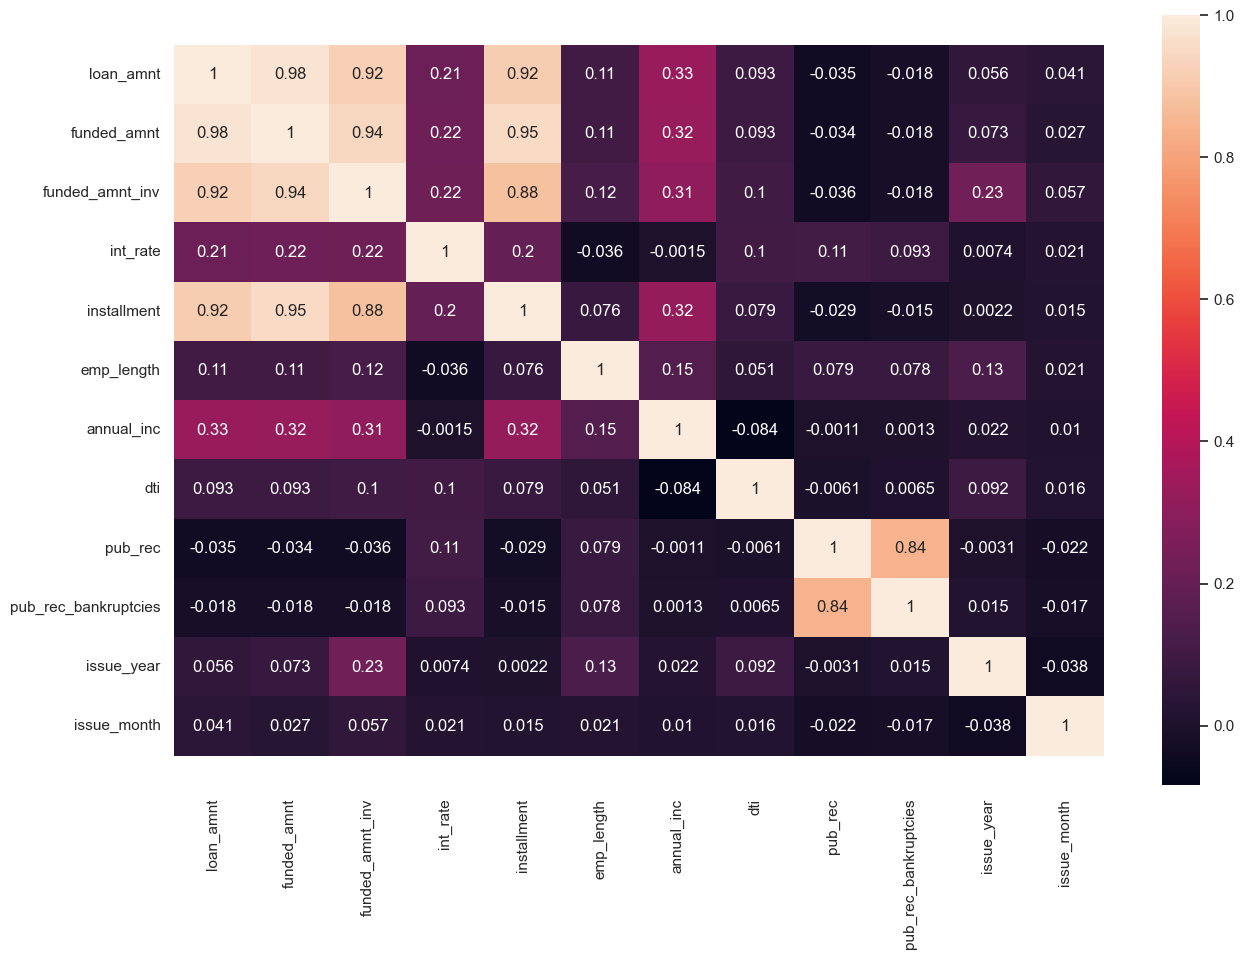

In [104]:
# calculating correlation between variables
data_loan_correlation = data_loan.corr()
# setting figure size and subplots
f, ax = plt.subplots(figsize=(15, 10))
# generating heatmap from the dataframe
sns.heatmap(data_loan_correlation, 
            xticklabels=data_loan_correlation.columns.values,
            yticklabels=data_loan_correlation.columns.values,annot= True)

# fix for mpl bug that cuts off top/bottom of seaborn
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 

1. Loan Amount, Funded Amount, Funded Amount invested and installment are highly correlated with each other.
2. Annual Income is negatively correlated with DTI.
3. The public derogatory records colummn is highly (+ve) correlated with public bankruptcies records.

Text(0.5, 1.0, 'Pair plot for Numerical Variables')

<Figure size 600x1000 with 0 Axes>

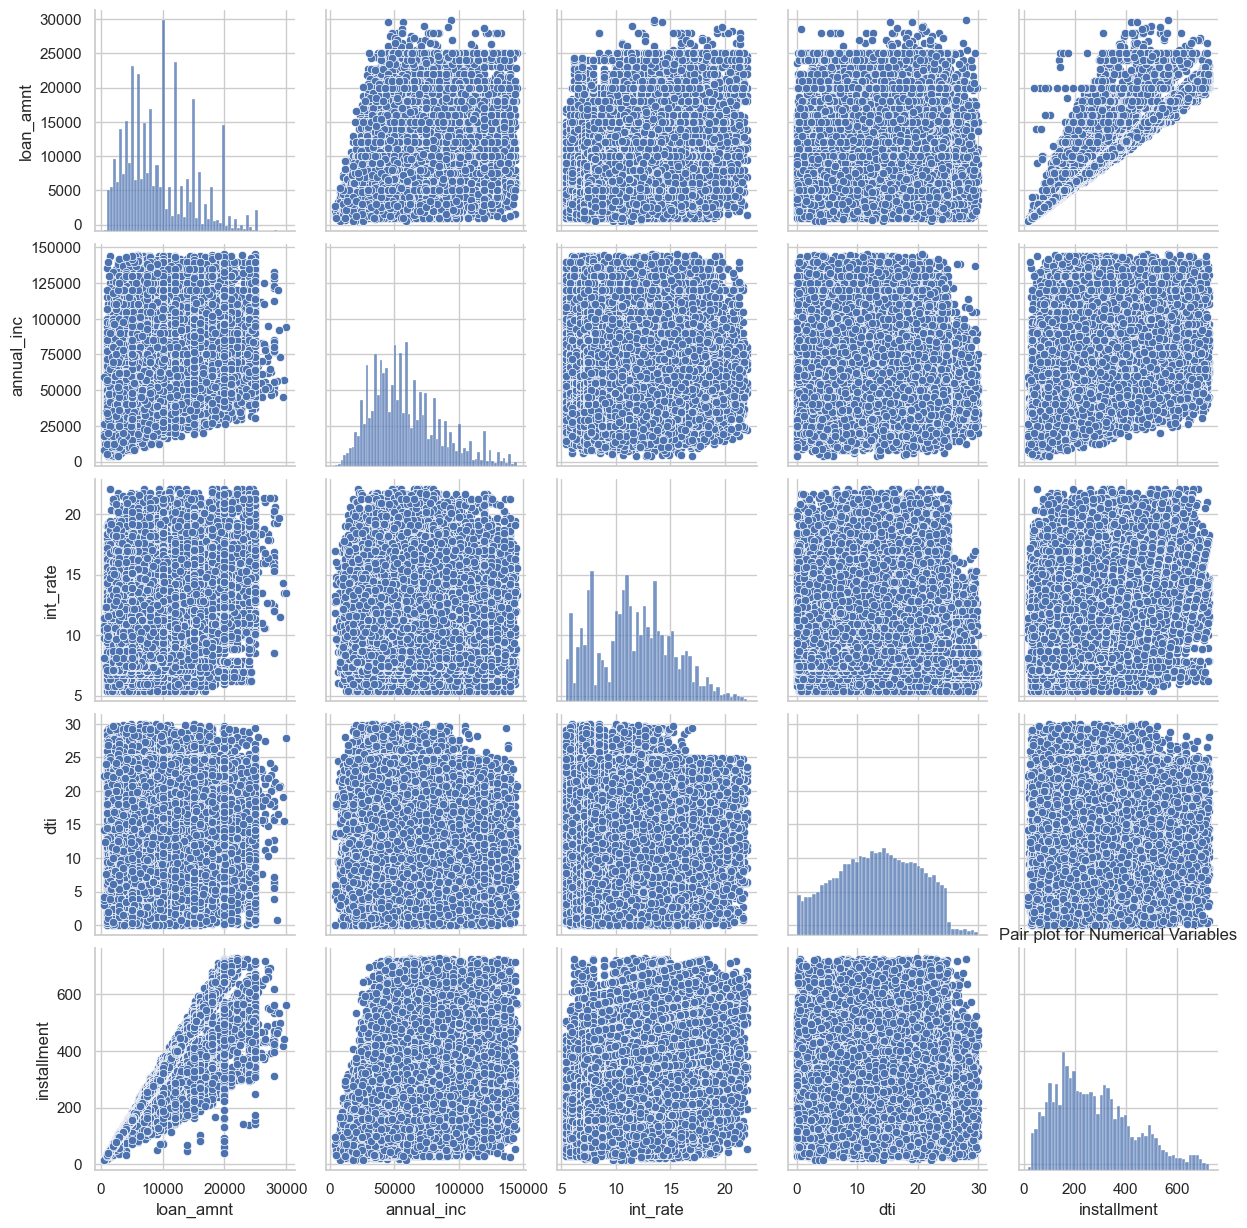

In [105]:
# initializing figure size
plt.figure(figsize=(6,10))
# creating pair plot for the statistical analysis of numerical variables with each other
sns.pairplot(data_loan[['loan_amnt', 'annual_inc', 'int_rate', 'dti','installment']])
# setting title
plt.title('Pair plot for Numerical Variables')

## Recommendations

- Major Driving factor which can be used to predict the chance of defaulting and avoiding Credit Loss:
  1.  DTI
  2. Grades
  3. Verification Status
  4.Annual income
  5.Pub_rec_bankruptcies
  

- Other considerations for 'defaults' :
    1. Borrowers not from large urban cities like california, new york, texas, florida etc.
    2. Borrowers having annual income in the range 50000-100000.
    3. Borrowers having Public Recorded Bankruptcy.
    4. Borrowers with least grades like E,F,G which indicates high risk.
    5. Borrowers with very high Debt to Income value.
    6. Borrowers with working experience 10+ years.


- Lending Club should be wary of the loans where the purpose is Small Business as the percentage of a loan being charged off is maximum 27.1%. Accepting loans for the purpose of Weddings, major purchase, car and credit card is highly recommended.
- Higher the loan amount, the higher the chances of loan being charged off. Therefore, Lending Company should consider accepting loans of lower amount. The maximum no. of loans, 12410 are applied where the loan amount ranges between 5000 and 10000. For this range the probability of the loan getting charged off is very less. Hence the risk factor is low for lending club.
- Lending Club should consider accepting more loans from applicants whose annual income is greater than 100000 as their probability of charge off is minimum.
- Lending Club should consider accepting more loans where interest rate is less than 7.5% as their probability of charge off is minimum.
- Lending Club should consider accepting more loans of grade A and B. It should be cautious of loans falling in grades E,F and G
- Lending Club should consider accepting more loans from people who owns a house.
- The number of loan applicants are increasing with each passing year bringing more business to Lending Club which is leading to more loans getting accepted as well as more loans getting charged off. Moreover, the last few months of the year are quite critical as most of the loans are either fully paid or charged off at that time.
- Lending Club should accept more loans for the term of 36 months as the % of charged off loans is less, and the no. of loan applicants are more. Also, the avg fully paid loan amount is increasing over the years and avg charged off loan amount is decreasing over the years.